In [1]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import os
import dlib
import cv2
import time
import math
import datetime
import matplotlib.pyplot as plt
import pickle
import numpy as np
import scipy.io
import bz2
from random import randint
import scipy.io
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

import keras
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential

from sklearn.model_selection import train_test_split

from keras import metrics

from keras.models import model_from_json
import matplotlib.pyplot as plt

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input

In [2]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import os
import dlib
import cv2
import time
import math
import datetime
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import scipy.io
import bz2
from random import randint

In [3]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
# !wget --no-check-certificate \
#     https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/gender.caffemodel \
#     -O /tmp/gender.caffemodel
# # !wget --no-check-certificate \
# #     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
# #     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
# # from tensorflow.keras.applications.inception_v3 import InceptionV3

# local_weights_file = '/tmp/gender.caffemodel'

In [5]:
if not os.path.exists(os.path.abspath('.') + 'mmod_human_face_detector.dat.bz2'):
    annotation_zip = tf.keras.utils.get_file('mmod_human_face_detector.dat.bz2',
                            cache_subdir=os.path.abspath('.'),
                            origin = "\Computer Vision/mmod_human_face_detector.dat.bz2")
Using pythons bz2 package to read the bz2 file in binary format and write it into a .dat file
with bz2.open("/mmod_human_face_detector.dat", "rb") as f:
    content = f.read()

    with open("mmod_human_face_detector.dat", "wb") as weights_file:
        weights_file.write(content)

os.remove(annotation_zip)

SyntaxError: invalid syntax (<ipython-input-5-64f536aa5cd8>, line 5)

In [10]:
dataset_url = 'https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar'
annotation_folder = "wiki_crop"
if not os.path.exists(os.path.abspath('.') + annotation_folder):
    annotation_zip = tf.keras.utils.get_file('wiki.tar',
                                            cache_subdir=os.path.abspath('.'),
                                            origin = dataset_url,
                                            extract = True)
    os.remove(annotation_zip)
data_key = 'wiki'
mat_file = 'wiki.mat'

811319296/811315200 [==============================] - 28s 0us/step


In [6]:
annotation_folder = "wiki_crop"
data_key = 'wiki'
mat_file = 'wiki.mat'
mat = scipy.io.loadmat(annotation_folder+'/'+mat_file)
data = mat[data_key]
route = data[0][0][2][0]
name = []
age = []
gender = []
images = []
total = 0
project_path = "drive/My Drive/Colab Notebooks/Pradeep/Gender Classifier"
print(len(route))
print(len(mat))
print(name)

62328
4
[]


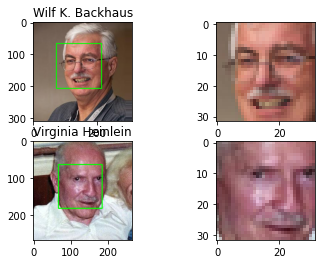

In [8]:
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
plt.figure()
i = 1

while(i <= 4):
    index = randint(0, len(route))
    if((math.isnan(data[0][0][6][0][index]) == False and data[0][0][6][0][index] > 0)):
        img = cv2.imread('wiki_crop/'+data[0][0][2][0][index][0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces_cnn = cnn_face_detector(img, 1)

        for face in faces_cnn:
            offset_x , offset_y  = max(faces_cnn[0].rect.left(),0),max(faces_cnn[0].rect.top(),0)
            target_width, target_height = faces_cnn[0].rect.right() - offset_x, faces_cnn[0].rect.bottom() - offset_y
            target_width = min(target_width, img.shape[1]-offset_x)
            target_height = min(target_height, img.shape[0]-offset_y)
            # draw box over face
            face_img = tf.image.crop_to_bounding_box(img, 
                                                    offset_y, offset_x, 
                                                    target_height,target_width)
            cv2.rectangle(img, (offset_x,offset_y), (offset_x+target_width,offset_y+target_height), (0,255,0), 2)
            face_img = tf.image.resize(face_img, (32, 32), method=tf.image.ResizeMethod.BICUBIC, antialias=True)
            face_img = tf.dtypes.cast(face_img, tf.int32)
            # Plotting images
            plt.subplot(2, 2, i)
            plt.imshow(img)
            plt.title(data[0][0][4][0][index][0])
            plt.subplot(2,2, i+1)
            plt.imshow(face_img)
            i += 2

In [9]:
print(len(route))
print(len(mat))
print(name)

62328
4
[]


In [10]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

wiki_mat = 'wiki_crop/wiki.mat'

wiki_data = loadmat(wiki_mat)

del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []


for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

# for file in imdb_path:
#     temp = file.split('_')[3]
#     temp = temp.split('-')
#     if len(temp[1]) == 1:
#         temp[1] = '0' + temp[1]
#     if len(temp[2]) == 1:
#         temp[2] = '0' + temp[2]

#     if temp[1] == '00':
#         temp[1] = '01'
#     if temp[2] == '00':
#         temp[2] = '01'
    
#     imdb_dob.append('-'.join(temp))

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])


wiki_age = []


for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

meta = meta.sample(frac=1)

meta.to_csv('meta.csv', index=False)


time data '829-09-08' does not match format '%Y-%m-%d'
time data '1823-12-00' does not match format '%Y-%m-%d'
time data '1953-10-00' does not match format '%Y-%m-%d'
time data '1984-15-03' does not match format '%Y-%m-%d'
time data '1963-02-00' does not match format '%Y-%m-%d'
time data '1977-04-00' does not match format '%Y-%m-%d'
time data '1946-05-00' does not match format '%Y-%m-%d'
time data '647-05-15' does not match format '%Y-%m-%d'
time data '11-03-00' does not match format '%Y-%m-%d'
time data '1980-05-00' does not match format '%Y-%m-%d'
time data '1960-02-00' does not match format '%Y-%m-%d'
time data '1975-03-00' does not match format '%Y-%m-%d'
time data '1952-11-00' does not match format '%Y-%m-%d'
time data '1974-04-00' does not match format '%Y-%m-%d'
time data '1996-25-05' does not match format '%Y-%m-%d'
time data '1914-02-00' does not match format '%Y-%m-%d'


In [11]:
# Importing dependencies
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Loading dataset
meta = pd.read_csv('meta.csv')

# Dropping gender column
meta = meta.drop(['gender'], axis=1)

# Filtaring dataset
meta = meta[meta['age'] >= 0]
meta = meta[meta['age'] <= 101]

# Converting into numpy array
meta = meta.values

# Spliting dataset into training and testing set
D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42)

# Making the directory structure
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)

# Finally making the training and testing set
counter = 0

for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1




--(0)Processing--
--(1)Processing--
--(2)Processing--
--(3)Processing--
--(4)Processing--
--(5)Processing--
--(6)Processing--
--(7)Processing--
--(8)Processing--
--(9)Processing--
--(10)Processing--
--(11)Processing--
--(12)Processing--
--(13)Processing--
--(14)Processing--
--(15)Processing--
--(16)Processing--
--(17)Processing--
--(18)Processing--
--(19)Processing--
--(20)Processing--
--(21)Processing--
--(22)Processing--
--(23)Processing--
--(24)Processing--
--(25)Processing--
--(26)Processing--
--(27)Processing--
--(28)Processing--
--(29)Processing--
--(30)Processing--
--(31)Processing--
--(32)Processing--
--(33)Processing--
--(34)Processing--
--(35)Processing--
--(36)Processing--
--(37)Processing--
--(38)Processing--
--(39)Processing--
--(40)Processing--
--(41)Processing--
--(42)Processing--
--(43)Processing--
--(44)Processing--
--(45)Processing--
--(46)Processing--
--(47)Processing--
--(48)Processing--
--(49)Processing--
--(50)Processing--
--(51)Processing--
--(52)Processing--
--(

--(466)Processing--
--(467)Processing--
--(468)Processing--
--(469)Processing--
--(470)Processing--
--(471)Processing--
--(472)Processing--
--(473)Processing--
--(474)Processing--
--(475)Processing--
--(476)Processing--
--(477)Processing--
--(478)Processing--
--(479)Processing--
--(480)Processing--
--(481)Processing--
--(482)Processing--
--(483)Processing--
--(484)Processing--
--(485)Processing--
--(486)Processing--
--(487)Processing--
--(488)Processing--
--(489)Processing--
--(490)Processing--
--(491)Processing--
--(492)Processing--
--(493)Processing--
--(494)Processing--
--(495)Processing--
--(496)Processing--
--(497)Processing--
--(498)Processing--
--(499)Processing--
--(500)Processing--
--(501)Processing--
--(502)Processing--
--(503)Processing--
--(504)Processing--
--(505)Processing--
--(506)Processing--
--(507)Processing--
--(508)Processing--
--(509)Processing--
--(510)Processing--
--(511)Processing--
--(512)Processing--
--(513)Processing--
--(514)Processing--
--(515)Processing--


--(939)Processing--
--(940)Processing--
--(941)Processing--
--(942)Processing--
--(943)Processing--
--(944)Processing--
--(945)Processing--
--(946)Processing--
--(947)Processing--
--(948)Processing--
--(949)Processing--
--(950)Processing--
--(951)Processing--
--(952)Processing--
--(953)Processing--
--(954)Processing--
--(955)Processing--
--(956)Processing--
--(957)Processing--
--(958)Processing--
--(959)Processing--
--(960)Processing--
--(961)Processing--
--(962)Processing--
--(963)Processing--
--(964)Processing--
--(965)Processing--
--(966)Processing--
--(967)Processing--
--(968)Processing--
--(969)Processing--
--(970)Processing--
--(971)Processing--
--(972)Processing--
--(973)Processing--
--(974)Processing--
--(975)Processing--
--(976)Processing--
--(977)Processing--
--(978)Processing--
--(979)Processing--
--(980)Processing--
--(981)Processing--
--(982)Processing--
--(983)Processing--
--(984)Processing--
--(985)Processing--
--(986)Processing--
--(987)Processing--
--(988)Processing--


--(1376)Processing--
--(1377)Processing--
--(1378)Processing--
--(1379)Processing--
--(1380)Processing--
--(1381)Processing--
--(1382)Processing--
--(1383)Processing--
--(1384)Processing--
--(1385)Processing--
--(1386)Processing--
--(1387)Processing--
--(1388)Processing--
--(1389)Processing--
--(1390)Processing--
--(1391)Processing--
--(1392)Processing--
--(1393)Processing--
--(1394)Processing--
--(1395)Processing--
--(1396)Processing--
--(1397)Processing--
--(1398)Processing--
--(1399)Processing--
--(1400)Processing--
--(1401)Processing--
--(1402)Processing--
--(1403)Processing--
--(1404)Processing--
--(1405)Processing--
--(1406)Processing--
--(1407)Processing--
--(1408)Processing--
--(1409)Processing--
--(1410)Processing--
--(1411)Processing--
--(1412)Processing--
--(1413)Processing--
--(1414)Processing--
--(1415)Processing--
--(1416)Processing--
--(1417)Processing--
--(1418)Processing--
--(1419)Processing--
--(1420)Processing--
--(1421)Processing--
--(1422)Processing--
--(1423)Proce

--(1813)Processing--
--(1814)Processing--
--(1815)Processing--
--(1816)Processing--
--(1817)Processing--
--(1818)Processing--
--(1819)Processing--
--(1820)Processing--
--(1821)Processing--
--(1822)Processing--
--(1823)Processing--
--(1824)Processing--
--(1825)Processing--
--(1826)Processing--
--(1827)Processing--
--(1828)Processing--
--(1829)Processing--
--(1830)Processing--
--(1831)Processing--
--(1832)Processing--
--(1833)Processing--
--(1834)Processing--
--(1835)Processing--
--(1836)Processing--
--(1837)Processing--
--(1838)Processing--
--(1839)Processing--
--(1840)Processing--
--(1841)Processing--
--(1842)Processing--
--(1843)Processing--
--(1844)Processing--
--(1845)Processing--
--(1846)Processing--
--(1847)Processing--
--(1848)Processing--
--(1849)Processing--
--(1850)Processing--
--(1851)Processing--
--(1852)Processing--
--(1853)Processing--
--(1854)Processing--
--(1855)Processing--
--(1856)Processing--
--(1857)Processing--
--(1858)Processing--
--(1859)Processing--
--(1860)Proce

--(2265)Processing--
--(2266)Processing--
--(2267)Processing--
--(2268)Processing--
--(2269)Processing--
--(2270)Processing--
--(2271)Processing--
--(2272)Processing--
--(2273)Processing--
--(2274)Processing--
--(2275)Processing--
--(2276)Processing--
--(2277)Processing--
--(2278)Processing--
--(2279)Processing--
--(2280)Processing--
--(2281)Processing--
--(2282)Processing--
--(2283)Processing--
--(2284)Processing--
--(2285)Processing--
--(2286)Processing--
--(2287)Processing--
--(2288)Processing--
--(2289)Processing--
--(2290)Processing--
--(2291)Processing--
--(2292)Processing--
--(2293)Processing--
--(2294)Processing--
--(2295)Processing--
--(2296)Processing--
--(2297)Processing--
--(2298)Processing--
--(2299)Processing--
--(2300)Processing--
--(2301)Processing--
--(2302)Processing--
--(2303)Processing--
--(2304)Processing--
--(2305)Processing--
--(2306)Processing--
--(2307)Processing--
--(2308)Processing--
--(2309)Processing--
--(2310)Processing--
--(2311)Processing--
--(2312)Proce

--(2702)Processing--
--(2703)Processing--
--(2704)Processing--
--(2705)Processing--
--(2706)Processing--
--(2707)Processing--
--(2708)Processing--
--(2709)Processing--
--(2710)Processing--
--(2711)Processing--
--(2712)Processing--
--(2713)Processing--
--(2714)Processing--
--(2715)Processing--
--(2716)Processing--
--(2717)Processing--
--(2718)Processing--
--(2719)Processing--
--(2720)Processing--
--(2721)Processing--
--(2722)Processing--
--(2723)Processing--
--(2724)Processing--
--(2725)Processing--
--(2726)Processing--
--(2727)Processing--
--(2728)Processing--
--(2729)Processing--
--(2730)Processing--
--(2731)Processing--
--(2732)Processing--
--(2733)Processing--
--(2734)Processing--
--(2735)Processing--
--(2736)Processing--
--(2737)Processing--
--(2738)Processing--
--(2739)Processing--
--(2740)Processing--
--(2741)Processing--
--(2742)Processing--
--(2743)Processing--
--(2744)Processing--
--(2745)Processing--
--(2746)Processing--
--(2747)Processing--
--(2748)Processing--
--(2749)Proce

--(3115)Processing--
--(3116)Processing--
--(3117)Processing--
--(3118)Processing--
--(3119)Processing--
--(3120)Processing--
--(3121)Processing--
--(3122)Processing--
--(3123)Processing--
--(3124)Processing--
--(3125)Processing--
--(3126)Processing--
--(3127)Processing--
--(3128)Processing--
--(3129)Processing--
--(3130)Processing--
--(3131)Processing--
--(3132)Processing--
--(3133)Processing--
--(3134)Processing--
--(3135)Processing--
--(3136)Processing--
--(3137)Processing--
--(3138)Processing--
--(3139)Processing--
--(3140)Processing--
--(3141)Processing--
--(3142)Processing--
--(3143)Processing--
--(3144)Processing--
--(3145)Processing--
--(3146)Processing--
--(3147)Processing--
--(3148)Processing--
--(3149)Processing--
--(3150)Processing--
--(3151)Processing--
--(3152)Processing--
--(3153)Processing--
--(3154)Processing--
--(3155)Processing--
--(3156)Processing--
--(3157)Processing--
--(3158)Processing--
--(3159)Processing--
--(3160)Processing--
--(3161)Processing--
--(3162)Proce

--(3568)Processing--
--(3569)Processing--
--(3570)Processing--
--(3571)Processing--
--(3572)Processing--
--(3573)Processing--
--(3574)Processing--
--(3575)Processing--
--(3576)Processing--
--(3577)Processing--
--(3578)Processing--
--(3579)Processing--
--(3580)Processing--
--(3581)Processing--
--(3582)Processing--
--(3583)Processing--
--(3584)Processing--
--(3585)Processing--
--(3586)Processing--
--(3587)Processing--
--(3588)Processing--
--(3589)Processing--
--(3590)Processing--
--(3591)Processing--
--(3592)Processing--
--(3593)Processing--
--(3594)Processing--
--(3595)Processing--
--(3596)Processing--
--(3597)Processing--
--(3598)Processing--
--(3599)Processing--
--(3600)Processing--
--(3601)Processing--
--(3602)Processing--
--(3603)Processing--
--(3604)Processing--
--(3605)Processing--
--(3606)Processing--
--(3607)Processing--
--(3608)Processing--
--(3609)Processing--
--(3610)Processing--
--(3611)Processing--
--(3612)Processing--
--(3613)Processing--
--(3614)Processing--
--(3615)Proce

--(4022)Processing--
--(4023)Processing--
--(4024)Processing--
--(4025)Processing--
--(4026)Processing--
--(4027)Processing--
--(4028)Processing--
--(4029)Processing--
--(4030)Processing--
--(4031)Processing--
--(4032)Processing--
--(4033)Processing--
--(4034)Processing--
--(4035)Processing--
--(4036)Processing--
--(4037)Processing--
--(4038)Processing--
--(4039)Processing--
--(4040)Processing--
--(4041)Processing--
--(4042)Processing--
--(4043)Processing--
--(4044)Processing--
--(4045)Processing--
--(4046)Processing--
--(4047)Processing--
--(4048)Processing--
--(4049)Processing--
--(4050)Processing--
--(4051)Processing--
--(4052)Processing--
--(4053)Processing--
--(4054)Processing--
--(4055)Processing--
--(4056)Processing--
--(4057)Processing--
--(4058)Processing--
--(4059)Processing--
--(4060)Processing--
--(4061)Processing--
--(4062)Processing--
--(4063)Processing--
--(4064)Processing--
--(4065)Processing--
--(4066)Processing--
--(4067)Processing--
--(4068)Processing--
--(4069)Proce

--(4468)Processing--
--(4469)Processing--
--(4470)Processing--
--(4471)Processing--
--(4472)Processing--
--(4473)Processing--
--(4474)Processing--
--(4475)Processing--
--(4476)Processing--
--(4477)Processing--
--(4478)Processing--
--(4479)Processing--
--(4480)Processing--
--(4481)Processing--
--(4482)Processing--
--(4483)Processing--
--(4484)Processing--
--(4485)Processing--
--(4486)Processing--
--(4487)Processing--
--(4488)Processing--
--(4489)Processing--
--(4490)Processing--
--(4491)Processing--
--(4492)Processing--
--(4493)Processing--
--(4494)Processing--
--(4495)Processing--
--(4496)Processing--
--(4497)Processing--
--(4498)Processing--
--(4499)Processing--
--(4500)Processing--
--(4501)Processing--
--(4502)Processing--
--(4503)Processing--
--(4504)Processing--
--(4505)Processing--
--(4506)Processing--
--(4507)Processing--
--(4508)Processing--
--(4509)Processing--
--(4510)Processing--
--(4511)Processing--
--(4512)Processing--
--(4513)Processing--
--(4514)Processing--
--(4515)Proce

--(4865)Processing--
--(4866)Processing--
--(4867)Processing--
--(4868)Processing--
--(4869)Processing--
--(4870)Processing--
--(4871)Processing--
--(4872)Processing--
--(4873)Processing--
--(4874)Processing--
--(4875)Processing--
--(4876)Processing--
--(4877)Processing--
--(4878)Processing--
--(4879)Processing--
--(4880)Processing--
--(4881)Processing--
--(4882)Processing--
--(4883)Processing--
--(4884)Processing--
--(4885)Processing--
--(4886)Processing--
--(4887)Processing--
--(4888)Processing--
--(4889)Processing--
--(4890)Processing--
--(4891)Processing--
--(4892)Processing--
--(4893)Processing--
--(4894)Processing--
--(4895)Processing--
--(4896)Processing--
--(4897)Processing--
--(4898)Processing--
--(4899)Processing--
--(4900)Processing--
--(4901)Processing--
--(4902)Processing--
--(4903)Processing--
--(4904)Processing--
--(4905)Processing--
--(4906)Processing--
--(4907)Processing--
--(4908)Processing--
--(4909)Processing--
--(4910)Processing--
--(4911)Processing--
--(4912)Proce

--(5276)Processing--
--(5277)Processing--
--(5278)Processing--
--(5279)Processing--
--(5280)Processing--
--(5281)Processing--
--(5282)Processing--
--(5283)Processing--
--(5284)Processing--
--(5285)Processing--
--(5286)Processing--
--(5287)Processing--
--(5288)Processing--
--(5289)Processing--
--(5290)Processing--
--(5291)Processing--
--(5292)Processing--
--(5293)Processing--
--(5294)Processing--
--(5295)Processing--
--(5296)Processing--
--(5297)Processing--
--(5298)Processing--
--(5299)Processing--
--(5300)Processing--
--(5301)Processing--
--(5302)Processing--
--(5303)Processing--
--(5304)Processing--
--(5305)Processing--
--(5306)Processing--
--(5307)Processing--
--(5308)Processing--
--(5309)Processing--
--(5310)Processing--
--(5311)Processing--
--(5312)Processing--
--(5313)Processing--
--(5314)Processing--
--(5315)Processing--
--(5316)Processing--
--(5317)Processing--
--(5318)Processing--
--(5319)Processing--
--(5320)Processing--
--(5321)Processing--
--(5322)Processing--
--(5323)Proce

--(5681)Processing--
--(5682)Processing--
--(5683)Processing--
--(5684)Processing--
--(5685)Processing--
--(5686)Processing--
--(5687)Processing--
--(5688)Processing--
--(5689)Processing--
--(5690)Processing--
--(5691)Processing--
--(5692)Processing--
--(5693)Processing--
--(5694)Processing--
--(5695)Processing--
--(5696)Processing--
--(5697)Processing--
--(5698)Processing--
--(5699)Processing--
--(5700)Processing--
--(5701)Processing--
--(5702)Processing--
--(5703)Processing--
--(5704)Processing--
--(5705)Processing--
--(5706)Processing--
--(5707)Processing--
--(5708)Processing--
--(5709)Processing--
--(5710)Processing--
--(5711)Processing--
--(5712)Processing--
--(5713)Processing--
--(5714)Processing--
--(5715)Processing--
--(5716)Processing--
--(5717)Processing--
--(5718)Processing--
--(5719)Processing--
--(5720)Processing--
--(5721)Processing--
--(5722)Processing--
--(5723)Processing--
--(5724)Processing--
--(5725)Processing--
--(5726)Processing--
--(5727)Processing--
--(5728)Proce

--(6082)Processing--
--(6083)Processing--
--(6084)Processing--
--(6085)Processing--
--(6086)Processing--
--(6087)Processing--
--(6088)Processing--
--(6089)Processing--
--(6090)Processing--
--(6091)Processing--
--(6092)Processing--
--(6093)Processing--
--(6094)Processing--
--(6095)Processing--
--(6096)Processing--
--(6097)Processing--
--(6098)Processing--
--(6099)Processing--
--(6100)Processing--
--(6101)Processing--
--(6102)Processing--
--(6103)Processing--
--(6104)Processing--
--(6105)Processing--
--(6106)Processing--
--(6107)Processing--
--(6108)Processing--
--(6109)Processing--
--(6110)Processing--
--(6111)Processing--
--(6112)Processing--
--(6113)Processing--
--(6114)Processing--
--(6115)Processing--
--(6116)Processing--
--(6117)Processing--
--(6118)Processing--
--(6119)Processing--
--(6120)Processing--
--(6121)Processing--
--(6122)Processing--
--(6123)Processing--
--(6124)Processing--
--(6125)Processing--
--(6126)Processing--
--(6127)Processing--
--(6128)Processing--
--(6129)Proce

--(6488)Processing--
--(6489)Processing--
--(6490)Processing--
--(6491)Processing--
--(6492)Processing--
--(6493)Processing--
--(6494)Processing--
--(6495)Processing--
--(6496)Processing--
--(6497)Processing--
--(6498)Processing--
--(6499)Processing--
--(6500)Processing--
--(6501)Processing--
--(6502)Processing--
--(6503)Processing--
--(6504)Processing--
--(6505)Processing--
--(6506)Processing--
--(6507)Processing--
--(6508)Processing--
--(6509)Processing--
--(6510)Processing--
--(6511)Processing--
--(6512)Processing--
--(6513)Processing--
--(6514)Processing--
--(6515)Processing--
--(6516)Processing--
--(6517)Processing--
--(6518)Processing--
--(6519)Processing--
--(6520)Processing--
--(6521)Processing--
--(6522)Processing--
--(6523)Processing--
--(6524)Processing--
--(6525)Processing--
--(6526)Processing--
--(6527)Processing--
--(6528)Processing--
--(6529)Processing--
--(6530)Processing--
--(6531)Processing--
--(6532)Processing--
--(6533)Processing--
--(6534)Processing--
--(6535)Proce

--(6898)Processing--
--(6899)Processing--
--(6900)Processing--
--(6901)Processing--
--(6902)Processing--
--(6903)Processing--
--(6904)Processing--
--(6905)Processing--
--(6906)Processing--
--(6907)Processing--
--(6908)Processing--
--(6909)Processing--
--(6910)Processing--
--(6911)Processing--
--(6912)Processing--
--(6913)Processing--
--(6914)Processing--
--(6915)Processing--
--(6916)Processing--
--(6917)Processing--
--(6918)Processing--
--(6919)Processing--
--(6920)Processing--
--(6921)Processing--
--(6922)Processing--
--(6923)Processing--
--(6924)Processing--
--(6925)Processing--
--(6926)Processing--
--(6927)Processing--
--(6928)Processing--
--(6929)Processing--
--(6930)Processing--
--(6931)Processing--
--(6932)Processing--
--(6933)Processing--
--(6934)Processing--
--(6935)Processing--
--(6936)Processing--
--(6937)Processing--
--(6938)Processing--
--(6939)Processing--
--(6940)Processing--
--(6941)Processing--
--(6942)Processing--
--(6943)Processing--
--(6944)Processing--
--(6945)Proce

--(7294)Processing--
--(7295)Processing--
--(7296)Processing--
--(7297)Processing--
--(7298)Processing--
--(7299)Processing--
--(7300)Processing--
--(7301)Processing--
--(7302)Processing--
--(7303)Processing--
--(7304)Processing--
--(7305)Processing--
--(7306)Processing--
--(7307)Processing--
--(7308)Processing--
--(7309)Processing--
--(7310)Processing--
--(7311)Processing--
--(7312)Processing--
--(7313)Processing--
--(7314)Processing--
--(7315)Processing--
--(7316)Processing--
--(7317)Processing--
--(7318)Processing--
--(7319)Processing--
--(7320)Processing--
--(7321)Processing--
--(7322)Processing--
--(7323)Processing--
--(7324)Processing--
--(7325)Processing--
--(7326)Processing--
--(7327)Processing--
--(7328)Processing--
--(7329)Processing--
--(7330)Processing--
--(7331)Processing--
--(7332)Processing--
--(7333)Processing--
--(7334)Processing--
--(7335)Processing--
--(7336)Processing--
--(7337)Processing--
--(7338)Processing--
--(7339)Processing--
--(7340)Processing--
--(7341)Proce

--(7702)Processing--
--(7703)Processing--
--(7704)Processing--
--(7705)Processing--
--(7706)Processing--
--(7707)Processing--
--(7708)Processing--
--(7709)Processing--
--(7710)Processing--
--(7711)Processing--
--(7712)Processing--
--(7713)Processing--
--(7714)Processing--
--(7715)Processing--
--(7716)Processing--
--(7717)Processing--
--(7718)Processing--
--(7719)Processing--
--(7720)Processing--
--(7721)Processing--
--(7722)Processing--
--(7723)Processing--
--(7724)Processing--
--(7725)Processing--
--(7726)Processing--
--(7727)Processing--
--(7728)Processing--
--(7729)Processing--
--(7730)Processing--
--(7731)Processing--
--(7732)Processing--
--(7733)Processing--
--(7734)Processing--
--(7735)Processing--
--(7736)Processing--
--(7737)Processing--
--(7738)Processing--
--(7739)Processing--
--(7740)Processing--
--(7741)Processing--
--(7742)Processing--
--(7743)Processing--
--(7744)Processing--
--(7745)Processing--
--(7746)Processing--
--(7747)Processing--
--(7748)Processing--
--(7749)Proce

--(8100)Processing--
--(8101)Processing--
--(8102)Processing--
--(8103)Processing--
--(8104)Processing--
--(8105)Processing--
--(8106)Processing--
--(8107)Processing--
--(8108)Processing--
--(8109)Processing--
--(8110)Processing--
--(8111)Processing--
--(8112)Processing--
--(8113)Processing--
--(8114)Processing--
--(8115)Processing--
--(8116)Processing--
--(8117)Processing--
--(8118)Processing--
--(8119)Processing--
--(8120)Processing--
--(8121)Processing--
--(8122)Processing--
--(8123)Processing--
--(8124)Processing--
--(8125)Processing--
--(8126)Processing--
--(8127)Processing--
--(8128)Processing--
--(8129)Processing--
--(8130)Processing--
--(8131)Processing--
--(8132)Processing--
--(8133)Processing--
--(8134)Processing--
--(8135)Processing--
--(8136)Processing--
--(8137)Processing--
--(8138)Processing--
--(8139)Processing--
--(8140)Processing--
--(8141)Processing--
--(8142)Processing--
--(8143)Processing--
--(8144)Processing--
--(8145)Processing--
--(8146)Processing--
--(8147)Proce

--(8542)Processing--
--(8543)Processing--
--(8544)Processing--
--(8545)Processing--
--(8546)Processing--
--(8547)Processing--
--(8548)Processing--
--(8549)Processing--
--(8550)Processing--
--(8551)Processing--
--(8552)Processing--
--(8553)Processing--
--(8554)Processing--
--(8555)Processing--
--(8556)Processing--
--(8557)Processing--
--(8558)Processing--
--(8559)Processing--
--(8560)Processing--
--(8561)Processing--
--(8562)Processing--
--(8563)Processing--
--(8564)Processing--
--(8565)Processing--
--(8566)Processing--
--(8567)Processing--
--(8568)Processing--
--(8569)Processing--
--(8570)Processing--
--(8571)Processing--
--(8572)Processing--
--(8573)Processing--
--(8574)Processing--
--(8575)Processing--
--(8576)Processing--
--(8577)Processing--
--(8578)Processing--
--(8579)Processing--
--(8580)Processing--
--(8581)Processing--
--(8582)Processing--
--(8583)Processing--
--(8584)Processing--
--(8585)Processing--
--(8586)Processing--
--(8587)Processing--
--(8588)Processing--
--(8589)Proce

--(8981)Processing--
--(8982)Processing--
--(8983)Processing--
--(8984)Processing--
--(8985)Processing--
--(8986)Processing--
--(8987)Processing--
--(8988)Processing--
--(8989)Processing--
--(8990)Processing--
--(8991)Processing--
--(8992)Processing--
--(8993)Processing--
--(8994)Processing--
--(8995)Processing--
--(8996)Processing--
--(8997)Processing--
--(8998)Processing--
--(8999)Processing--
--(9000)Processing--
--(9001)Processing--
--(9002)Processing--
--(9003)Processing--
--(9004)Processing--
--(9005)Processing--
--(9006)Processing--
--(9007)Processing--
--(9008)Processing--
--(9009)Processing--
--(9010)Processing--
--(9011)Processing--
--(9012)Processing--
--(9013)Processing--
--(9014)Processing--
--(9015)Processing--
--(9016)Processing--
--(9017)Processing--
--(9018)Processing--
--(9019)Processing--
--(9020)Processing--
--(9021)Processing--
--(9022)Processing--
--(9023)Processing--
--(9024)Processing--
--(9025)Processing--
--(9026)Processing--
--(9027)Processing--
--(9028)Proce

--(9404)Processing--
--(9405)Processing--
--(9406)Processing--
--(9407)Processing--
--(9408)Processing--
--(9409)Processing--
--(9410)Processing--
--(9411)Processing--
--(9412)Processing--
--(9413)Processing--
--(9414)Processing--
--(9415)Processing--
--(9416)Processing--
--(9417)Processing--
--(9418)Processing--
--(9419)Processing--
--(9420)Processing--
--(9421)Processing--
--(9422)Processing--
--(9423)Processing--
--(9424)Processing--
--(9425)Processing--
--(9426)Processing--
--(9427)Processing--
--(9428)Processing--
--(9429)Processing--
--(9430)Processing--
--(9431)Processing--
--(9432)Processing--
--(9433)Processing--
--(9434)Processing--
--(9435)Processing--
--(9436)Processing--
--(9437)Processing--
--(9438)Processing--
--(9439)Processing--
--(9440)Processing--
--(9441)Processing--
--(9442)Processing--
--(9443)Processing--
--(9444)Processing--
--(9445)Processing--
--(9446)Processing--
--(9447)Processing--
--(9448)Processing--
--(9449)Processing--
--(9450)Processing--
--(9451)Proce

--(9834)Processing--
--(9835)Processing--
--(9836)Processing--
--(9837)Processing--
--(9838)Processing--
--(9839)Processing--
--(9840)Processing--
--(9841)Processing--
--(9842)Processing--
--(9843)Processing--
--(9844)Processing--
--(9845)Processing--
--(9846)Processing--
--(9847)Processing--
--(9848)Processing--
--(9849)Processing--
--(9850)Processing--
--(9851)Processing--
--(9852)Processing--
--(9853)Processing--
--(9854)Processing--
--(9855)Processing--
--(9856)Processing--
--(9857)Processing--
--(9858)Processing--
--(9859)Processing--
--(9860)Processing--
--(9861)Processing--
--(9862)Processing--
--(9863)Processing--
--(9864)Processing--
--(9865)Processing--
--(9866)Processing--
--(9867)Processing--
--(9868)Processing--
--(9869)Processing--
--(9870)Processing--
--(9871)Processing--
--(9872)Processing--
--(9873)Processing--
--(9874)Processing--
--(9875)Processing--
--(9876)Processing--
--(9877)Processing--
--(9878)Processing--
--(9879)Processing--
--(9880)Processing--
--(9881)Proce

--(10264)Processing--
--(10265)Processing--
--(10266)Processing--
--(10267)Processing--
--(10268)Processing--
--(10269)Processing--
--(10270)Processing--
--(10271)Processing--
--(10272)Processing--
--(10273)Processing--
--(10274)Processing--
--(10275)Processing--
--(10276)Processing--
--(10277)Processing--
--(10278)Processing--
--(10279)Processing--
--(10280)Processing--
--(10281)Processing--
--(10282)Processing--
--(10283)Processing--
--(10284)Processing--
--(10285)Processing--
--(10286)Processing--
--(10287)Processing--
--(10288)Processing--
--(10289)Processing--
--(10290)Processing--
--(10291)Processing--
--(10292)Processing--
--(10293)Processing--
--(10294)Processing--
--(10295)Processing--
--(10296)Processing--
--(10297)Processing--
--(10298)Processing--
--(10299)Processing--
--(10300)Processing--
--(10301)Processing--
--(10302)Processing--
--(10303)Processing--
--(10304)Processing--
--(10305)Processing--
--(10306)Processing--
--(10307)Processing--
--(10308)Processing--
--(10309)P

--(10671)Processing--
--(10672)Processing--
--(10673)Processing--
--(10674)Processing--
--(10675)Processing--
--(10676)Processing--
--(10677)Processing--
--(10678)Processing--
--(10679)Processing--
--(10680)Processing--
--(10681)Processing--
--(10682)Processing--
--(10683)Processing--
--(10684)Processing--
--(10685)Processing--
--(10686)Processing--
--(10687)Processing--
--(10688)Processing--
--(10689)Processing--
--(10690)Processing--
--(10691)Processing--
--(10692)Processing--
--(10693)Processing--
--(10694)Processing--
--(10695)Processing--
--(10696)Processing--
--(10697)Processing--
--(10698)Processing--
--(10699)Processing--
--(10700)Processing--
--(10701)Processing--
--(10702)Processing--
--(10703)Processing--
--(10704)Processing--
--(10705)Processing--
--(10706)Processing--
--(10707)Processing--
--(10708)Processing--
--(10709)Processing--
--(10710)Processing--
--(10711)Processing--
--(10712)Processing--
--(10713)Processing--
--(10714)Processing--
--(10715)Processing--
--(10716)P

--(11106)Processing--
--(11107)Processing--
--(11108)Processing--
--(11109)Processing--
--(11110)Processing--
--(11111)Processing--
--(11112)Processing--
--(11113)Processing--
--(11114)Processing--
--(11115)Processing--
--(11116)Processing--
--(11117)Processing--
--(11118)Processing--
--(11119)Processing--
--(11120)Processing--
--(11121)Processing--
--(11122)Processing--
--(11123)Processing--
--(11124)Processing--
--(11125)Processing--
--(11126)Processing--
--(11127)Processing--
--(11128)Processing--
--(11129)Processing--
--(11130)Processing--
--(11131)Processing--
--(11132)Processing--
--(11133)Processing--
--(11134)Processing--
--(11135)Processing--
--(11136)Processing--
--(11137)Processing--
--(11138)Processing--
--(11139)Processing--
--(11140)Processing--
--(11141)Processing--
--(11142)Processing--
--(11143)Processing--
--(11144)Processing--
--(11145)Processing--
--(11146)Processing--
--(11147)Processing--
--(11148)Processing--
--(11149)Processing--
--(11150)Processing--
--(11151)P

--(11545)Processing--
--(11546)Processing--
--(11547)Processing--
--(11548)Processing--
--(11549)Processing--
--(11550)Processing--
--(11551)Processing--
--(11552)Processing--
--(11553)Processing--
--(11554)Processing--
--(11555)Processing--
--(11556)Processing--
--(11557)Processing--
--(11558)Processing--
--(11559)Processing--
--(11560)Processing--
--(11561)Processing--
--(11562)Processing--
--(11563)Processing--
--(11564)Processing--
--(11565)Processing--
--(11566)Processing--
--(11567)Processing--
--(11568)Processing--
--(11569)Processing--
--(11570)Processing--
--(11571)Processing--
--(11572)Processing--
--(11573)Processing--
--(11574)Processing--
--(11575)Processing--
--(11576)Processing--
--(11577)Processing--
--(11578)Processing--
--(11579)Processing--
--(11580)Processing--
--(11581)Processing--
--(11582)Processing--
--(11583)Processing--
--(11584)Processing--
--(11585)Processing--
--(11586)Processing--
--(11587)Processing--
--(11588)Processing--
--(11589)Processing--
--(11590)P

--(11982)Processing--
--(11983)Processing--
--(11984)Processing--
--(11985)Processing--
--(11986)Processing--
--(11987)Processing--
--(11988)Processing--
--(11989)Processing--
--(11990)Processing--
--(11991)Processing--
--(11992)Processing--
--(11993)Processing--
--(11994)Processing--
--(11995)Processing--
--(11996)Processing--
--(11997)Processing--
--(11998)Processing--
--(11999)Processing--
--(12000)Processing--
--(12001)Processing--
--(12002)Processing--
--(12003)Processing--
--(12004)Processing--
--(12005)Processing--
--(12006)Processing--
--(12007)Processing--
--(12008)Processing--
--(12009)Processing--
--(12010)Processing--
--(12011)Processing--
--(12012)Processing--
--(12013)Processing--
--(12014)Processing--
--(12015)Processing--
--(12016)Processing--
--(12017)Processing--
--(12018)Processing--
--(12019)Processing--
--(12020)Processing--
--(12021)Processing--
--(12022)Processing--
--(12023)Processing--
--(12024)Processing--
--(12025)Processing--
--(12026)Processing--
--(12027)P

--(12399)Processing--
--(12400)Processing--
--(12401)Processing--
--(12402)Processing--
--(12403)Processing--
--(12404)Processing--
--(12405)Processing--
--(12406)Processing--
--(12407)Processing--
--(12408)Processing--
--(12409)Processing--
--(12410)Processing--
--(12411)Processing--
--(12412)Processing--
--(12413)Processing--
--(12414)Processing--
--(12415)Processing--
--(12416)Processing--
--(12417)Processing--
--(12418)Processing--
--(12419)Processing--
--(12420)Processing--
--(12421)Processing--
--(12422)Processing--
--(12423)Processing--
--(12424)Processing--
--(12425)Processing--
--(12426)Processing--
--(12427)Processing--
--(12428)Processing--
--(12429)Processing--
--(12430)Processing--
--(12431)Processing--
--(12432)Processing--
--(12433)Processing--
--(12434)Processing--
--(12435)Processing--
--(12436)Processing--
--(12437)Processing--
--(12438)Processing--
--(12439)Processing--
--(12440)Processing--
--(12441)Processing--
--(12442)Processing--
--(12443)Processing--
--(12444)P

--(12804)Processing--
--(12805)Processing--
--(12806)Processing--
--(12807)Processing--
--(12808)Processing--
--(12809)Processing--
--(12810)Processing--
--(12811)Processing--
--(12812)Processing--
--(12813)Processing--
--(12814)Processing--
--(12815)Processing--
--(12816)Processing--
--(12817)Processing--
--(12818)Processing--
--(12819)Processing--
--(12820)Processing--
--(12821)Processing--
--(12822)Processing--
--(12823)Processing--
--(12824)Processing--
--(12825)Processing--
--(12826)Processing--
--(12827)Processing--
--(12828)Processing--
--(12829)Processing--
--(12830)Processing--
--(12831)Processing--
--(12832)Processing--
--(12833)Processing--
--(12834)Processing--
--(12835)Processing--
--(12836)Processing--
--(12837)Processing--
--(12838)Processing--
--(12839)Processing--
--(12840)Processing--
--(12841)Processing--
--(12842)Processing--
--(12843)Processing--
--(12844)Processing--
--(12845)Processing--
--(12846)Processing--
--(12847)Processing--
--(12848)Processing--
--(12849)P

--(13230)Processing--
--(13231)Processing--
--(13232)Processing--
--(13233)Processing--
--(13234)Processing--
--(13235)Processing--
--(13236)Processing--
--(13237)Processing--
--(13238)Processing--
--(13239)Processing--
--(13240)Processing--
--(13241)Processing--
--(13242)Processing--
--(13243)Processing--
--(13244)Processing--
--(13245)Processing--
--(13246)Processing--
--(13247)Processing--
--(13248)Processing--
--(13249)Processing--
--(13250)Processing--
--(13251)Processing--
--(13252)Processing--
--(13253)Processing--
--(13254)Processing--
--(13255)Processing--
--(13256)Processing--
--(13257)Processing--
--(13258)Processing--
--(13259)Processing--
--(13260)Processing--
--(13261)Processing--
--(13262)Processing--
--(13263)Processing--
--(13264)Processing--
--(13265)Processing--
--(13266)Processing--
--(13267)Processing--
--(13268)Processing--
--(13269)Processing--
--(13270)Processing--
--(13271)Processing--
--(13272)Processing--
--(13273)Processing--
--(13274)Processing--
--(13275)P

--(13647)Processing--
--(13648)Processing--
--(13649)Processing--
--(13650)Processing--
--(13651)Processing--
--(13652)Processing--
--(13653)Processing--
--(13654)Processing--
--(13655)Processing--
--(13656)Processing--
--(13657)Processing--
--(13658)Processing--
--(13659)Processing--
--(13660)Processing--
--(13661)Processing--
--(13662)Processing--
--(13663)Processing--
--(13664)Processing--
--(13665)Processing--
--(13666)Processing--
--(13667)Processing--
--(13668)Processing--
--(13669)Processing--
--(13670)Processing--
--(13671)Processing--
--(13672)Processing--
--(13673)Processing--
--(13674)Processing--
--(13675)Processing--
--(13676)Processing--
--(13677)Processing--
--(13678)Processing--
--(13679)Processing--
--(13680)Processing--
--(13681)Processing--
--(13682)Processing--
--(13683)Processing--
--(13684)Processing--
--(13685)Processing--
--(13686)Processing--
--(13687)Processing--
--(13688)Processing--
--(13689)Processing--
--(13690)Processing--
--(13691)Processing--
--(13692)P

--(14073)Processing--
--(14074)Processing--
--(14075)Processing--
--(14076)Processing--
--(14077)Processing--
--(14078)Processing--
--(14079)Processing--
--(14080)Processing--
--(14081)Processing--
--(14082)Processing--
--(14083)Processing--
--(14084)Processing--
--(14085)Processing--
--(14086)Processing--
--(14087)Processing--
--(14088)Processing--
--(14089)Processing--
--(14090)Processing--
--(14091)Processing--
--(14092)Processing--
--(14093)Processing--
--(14094)Processing--
--(14095)Processing--
--(14096)Processing--
--(14097)Processing--
--(14098)Processing--
--(14099)Processing--
--(14100)Processing--
--(14101)Processing--
--(14102)Processing--
--(14103)Processing--
--(14104)Processing--
--(14105)Processing--
--(14106)Processing--
--(14107)Processing--
--(14108)Processing--
--(14109)Processing--
--(14110)Processing--
--(14111)Processing--
--(14112)Processing--
--(14113)Processing--
--(14114)Processing--
--(14115)Processing--
--(14116)Processing--
--(14117)Processing--
--(14118)P

--(14486)Processing--
--(14487)Processing--
--(14488)Processing--
--(14489)Processing--
--(14490)Processing--
--(14491)Processing--
--(14492)Processing--
--(14493)Processing--
--(14494)Processing--
--(14495)Processing--
--(14496)Processing--
--(14497)Processing--
--(14498)Processing--
--(14499)Processing--
--(14500)Processing--
--(14501)Processing--
--(14502)Processing--
--(14503)Processing--
--(14504)Processing--
--(14505)Processing--
--(14506)Processing--
--(14507)Processing--
--(14508)Processing--
--(14509)Processing--
--(14510)Processing--
--(14511)Processing--
--(14512)Processing--
--(14513)Processing--
--(14514)Processing--
--(14515)Processing--
--(14516)Processing--
--(14517)Processing--
--(14518)Processing--
--(14519)Processing--
--(14520)Processing--
--(14521)Processing--
--(14522)Processing--
--(14523)Processing--
--(14524)Processing--
--(14525)Processing--
--(14526)Processing--
--(14527)Processing--
--(14528)Processing--
--(14529)Processing--
--(14530)Processing--
--(14531)P

--(14906)Processing--
--(14907)Processing--
--(14908)Processing--
--(14909)Processing--
--(14910)Processing--
--(14911)Processing--
--(14912)Processing--
--(14913)Processing--
--(14914)Processing--
--(14915)Processing--
--(14916)Processing--
--(14917)Processing--
--(14918)Processing--
--(14919)Processing--
--(14920)Processing--
--(14921)Processing--
--(14922)Processing--
--(14923)Processing--
--(14924)Processing--
--(14925)Processing--
--(14926)Processing--
--(14927)Processing--
--(14928)Processing--
--(14929)Processing--
--(14930)Processing--
--(14931)Processing--
--(14932)Processing--
--(14933)Processing--
--(14934)Processing--
--(14935)Processing--
--(14936)Processing--
--(14937)Processing--
--(14938)Processing--
--(14939)Processing--
--(14940)Processing--
--(14941)Processing--
--(14942)Processing--
--(14943)Processing--
--(14944)Processing--
--(14945)Processing--
--(14946)Processing--
--(14947)Processing--
--(14948)Processing--
--(14949)Processing--
--(14950)Processing--
--(14951)P

--(15328)Processing--
--(15329)Processing--
--(15330)Processing--
--(15331)Processing--
--(15332)Processing--
--(15333)Processing--
--(15334)Processing--
--(15335)Processing--
--(15336)Processing--
--(15337)Processing--
--(15338)Processing--
--(15339)Processing--
--(15340)Processing--
--(15341)Processing--
--(15342)Processing--
--(15343)Processing--
--(15344)Processing--
--(15345)Processing--
--(15346)Processing--
--(15347)Processing--
--(15348)Processing--
--(15349)Processing--
--(15350)Processing--
--(15351)Processing--
--(15352)Processing--
--(15353)Processing--
--(15354)Processing--
--(15355)Processing--
--(15356)Processing--
--(15357)Processing--
--(15358)Processing--
--(15359)Processing--
--(15360)Processing--
--(15361)Processing--
--(15362)Processing--
--(15363)Processing--
--(15364)Processing--
--(15365)Processing--
--(15366)Processing--
--(15367)Processing--
--(15368)Processing--
--(15369)Processing--
--(15370)Processing--
--(15371)Processing--
--(15372)Processing--
--(15373)P

--(15726)Processing--
--(15727)Processing--
--(15728)Processing--
--(15729)Processing--
--(15730)Processing--
--(15731)Processing--
--(15732)Processing--
--(15733)Processing--
--(15734)Processing--
--(15735)Processing--
--(15736)Processing--
--(15737)Processing--
--(15738)Processing--
--(15739)Processing--
--(15740)Processing--
--(15741)Processing--
--(15742)Processing--
--(15743)Processing--
--(15744)Processing--
--(15745)Processing--
--(15746)Processing--
--(15747)Processing--
--(15748)Processing--
--(15749)Processing--
--(15750)Processing--
--(15751)Processing--
--(15752)Processing--
--(15753)Processing--
--(15754)Processing--
--(15755)Processing--
--(15756)Processing--
--(15757)Processing--
--(15758)Processing--
--(15759)Processing--
--(15760)Processing--
--(15761)Processing--
--(15762)Processing--
--(15763)Processing--
--(15764)Processing--
--(15765)Processing--
--(15766)Processing--
--(15767)Processing--
--(15768)Processing--
--(15769)Processing--
--(15770)Processing--
--(15771)P

--(16152)Processing--
--(16153)Processing--
--(16154)Processing--
--(16155)Processing--
--(16156)Processing--
--(16157)Processing--
--(16158)Processing--
--(16159)Processing--
--(16160)Processing--
--(16161)Processing--
--(16162)Processing--
--(16163)Processing--
--(16164)Processing--
--(16165)Processing--
--(16166)Processing--
--(16167)Processing--
--(16168)Processing--
--(16169)Processing--
--(16170)Processing--
--(16171)Processing--
--(16172)Processing--
--(16173)Processing--
--(16174)Processing--
--(16175)Processing--
--(16176)Processing--
--(16177)Processing--
--(16178)Processing--
--(16179)Processing--
--(16180)Processing--
--(16181)Processing--
--(16182)Processing--
--(16183)Processing--
--(16184)Processing--
--(16185)Processing--
--(16186)Processing--
--(16187)Processing--
--(16188)Processing--
--(16189)Processing--
--(16190)Processing--
--(16191)Processing--
--(16192)Processing--
--(16193)Processing--
--(16194)Processing--
--(16195)Processing--
--(16196)Processing--
--(16197)P

--(16562)Processing--
--(16563)Processing--
--(16564)Processing--
--(16565)Processing--
--(16566)Processing--
--(16567)Processing--
--(16568)Processing--
--(16569)Processing--
--(16570)Processing--
--(16571)Processing--
--(16572)Processing--
--(16573)Processing--
--(16574)Processing--
--(16575)Processing--
--(16576)Processing--
--(16577)Processing--
--(16578)Processing--
--(16579)Processing--
--(16580)Processing--
--(16581)Processing--
--(16582)Processing--
--(16583)Processing--
--(16584)Processing--
--(16585)Processing--
--(16586)Processing--
--(16587)Processing--
--(16588)Processing--
--(16589)Processing--
--(16590)Processing--
--(16591)Processing--
--(16592)Processing--
--(16593)Processing--
--(16594)Processing--
--(16595)Processing--
--(16596)Processing--
--(16597)Processing--
--(16598)Processing--
--(16599)Processing--
--(16600)Processing--
--(16601)Processing--
--(16602)Processing--
--(16603)Processing--
--(16604)Processing--
--(16605)Processing--
--(16606)Processing--
--(16607)P

--(16981)Processing--
--(16982)Processing--
--(16983)Processing--
--(16984)Processing--
--(16985)Processing--
--(16986)Processing--
--(16987)Processing--
--(16988)Processing--
--(16989)Processing--
--(16990)Processing--
--(16991)Processing--
--(16992)Processing--
--(16993)Processing--
--(16994)Processing--
--(16995)Processing--
--(16996)Processing--
--(16997)Processing--
--(16998)Processing--
--(16999)Processing--
--(17000)Processing--
--(17001)Processing--
--(17002)Processing--
--(17003)Processing--
--(17004)Processing--
--(17005)Processing--
--(17006)Processing--
--(17007)Processing--
--(17008)Processing--
--(17009)Processing--
--(17010)Processing--
--(17011)Processing--
--(17012)Processing--
--(17013)Processing--
--(17014)Processing--
--(17015)Processing--
--(17016)Processing--
--(17017)Processing--
--(17018)Processing--
--(17019)Processing--
--(17020)Processing--
--(17021)Processing--
--(17022)Processing--
--(17023)Processing--
--(17024)Processing--
--(17025)Processing--
--(17026)P

--(17392)Processing--
--(17393)Processing--
--(17394)Processing--
--(17395)Processing--
--(17396)Processing--
--(17397)Processing--
--(17398)Processing--
--(17399)Processing--
--(17400)Processing--
--(17401)Processing--
--(17402)Processing--
--(17403)Processing--
--(17404)Processing--
--(17405)Processing--
--(17406)Processing--
--(17407)Processing--
--(17408)Processing--
--(17409)Processing--
--(17410)Processing--
--(17411)Processing--
--(17412)Processing--
--(17413)Processing--
--(17414)Processing--
--(17415)Processing--
--(17416)Processing--
--(17417)Processing--
--(17418)Processing--
--(17419)Processing--
--(17420)Processing--
--(17421)Processing--
--(17422)Processing--
--(17423)Processing--
--(17424)Processing--
--(17425)Processing--
--(17426)Processing--
--(17427)Processing--
--(17428)Processing--
--(17429)Processing--
--(17430)Processing--
--(17431)Processing--
--(17432)Processing--
--(17433)Processing--
--(17434)Processing--
--(17435)Processing--
--(17436)Processing--
--(17437)P

--(17820)Processing--
--(17821)Processing--
--(17822)Processing--
--(17823)Processing--
--(17824)Processing--
--(17825)Processing--
--(17826)Processing--
--(17827)Processing--
--(17828)Processing--
--(17829)Processing--
--(17830)Processing--
--(17831)Processing--
--(17832)Processing--
--(17833)Processing--
--(17834)Processing--
--(17835)Processing--
--(17836)Processing--
--(17837)Processing--
--(17838)Processing--
--(17839)Processing--
--(17840)Processing--
--(17841)Processing--
--(17842)Processing--
--(17843)Processing--
--(17844)Processing--
--(17845)Processing--
--(17846)Processing--
--(17847)Processing--
--(17848)Processing--
--(17849)Processing--
--(17850)Processing--
--(17851)Processing--
--(17852)Processing--
--(17853)Processing--
--(17854)Processing--
--(17855)Processing--
--(17856)Processing--
--(17857)Processing--
--(17858)Processing--
--(17859)Processing--
--(17860)Processing--
--(17861)Processing--
--(17862)Processing--
--(17863)Processing--
--(17864)Processing--
--(17865)P

--(18245)Processing--
--(18246)Processing--
--(18247)Processing--
--(18248)Processing--
--(18249)Processing--
--(18250)Processing--
--(18251)Processing--
--(18252)Processing--
--(18253)Processing--
--(18254)Processing--
--(18255)Processing--
--(18256)Processing--
--(18257)Processing--
--(18258)Processing--
--(18259)Processing--
--(18260)Processing--
--(18261)Processing--
--(18262)Processing--
--(18263)Processing--
--(18264)Processing--
--(18265)Processing--
--(18266)Processing--
--(18267)Processing--
--(18268)Processing--
--(18269)Processing--
--(18270)Processing--
--(18271)Processing--
--(18272)Processing--
--(18273)Processing--
--(18274)Processing--
--(18275)Processing--
--(18276)Processing--
--(18277)Processing--
--(18278)Processing--
--(18279)Processing--
--(18280)Processing--
--(18281)Processing--
--(18282)Processing--
--(18283)Processing--
--(18284)Processing--
--(18285)Processing--
--(18286)Processing--
--(18287)Processing--
--(18288)Processing--
--(18289)Processing--
--(18290)P

--(18665)Processing--
--(18666)Processing--
--(18667)Processing--
--(18668)Processing--
--(18669)Processing--
--(18670)Processing--
--(18671)Processing--
--(18672)Processing--
--(18673)Processing--
--(18674)Processing--
--(18675)Processing--
--(18676)Processing--
--(18677)Processing--
--(18678)Processing--
--(18679)Processing--
--(18680)Processing--
--(18681)Processing--
--(18682)Processing--
--(18683)Processing--
--(18684)Processing--
--(18685)Processing--
--(18686)Processing--
--(18687)Processing--
--(18688)Processing--
--(18689)Processing--
--(18690)Processing--
--(18691)Processing--
--(18692)Processing--
--(18693)Processing--
--(18694)Processing--
--(18695)Processing--
--(18696)Processing--
--(18697)Processing--
--(18698)Processing--
--(18699)Processing--
--(18700)Processing--
--(18701)Processing--
--(18702)Processing--
--(18703)Processing--
--(18704)Processing--
--(18705)Processing--
--(18706)Processing--
--(18707)Processing--
--(18708)Processing--
--(18709)Processing--
--(18710)P

--(19108)Processing--
--(19109)Processing--
--(19110)Processing--
--(19111)Processing--
--(19112)Processing--
--(19113)Processing--
--(19114)Processing--
--(19115)Processing--
--(19116)Processing--
--(19117)Processing--
--(19118)Processing--
--(19119)Processing--
--(19120)Processing--
--(19121)Processing--
--(19122)Processing--
--(19123)Processing--
--(19124)Processing--
--(19125)Processing--
--(19126)Processing--
--(19127)Processing--
--(19128)Processing--
--(19129)Processing--
--(19130)Processing--
--(19131)Processing--
--(19132)Processing--
--(19133)Processing--
--(19134)Processing--
--(19135)Processing--
--(19136)Processing--
--(19137)Processing--
--(19138)Processing--
--(19139)Processing--
--(19140)Processing--
--(19141)Processing--
--(19142)Processing--
--(19143)Processing--
--(19144)Processing--
--(19145)Processing--
--(19146)Processing--
--(19147)Processing--
--(19148)Processing--
--(19149)Processing--
--(19150)Processing--
--(19151)Processing--
--(19152)Processing--
--(19153)P

--(19531)Processing--
--(19532)Processing--
--(19533)Processing--
--(19534)Processing--
--(19535)Processing--
--(19536)Processing--
--(19537)Processing--
--(19538)Processing--
--(19539)Processing--
--(19540)Processing--
--(19541)Processing--
--(19542)Processing--
--(19543)Processing--
--(19544)Processing--
--(19545)Processing--
--(19546)Processing--
--(19547)Processing--
--(19548)Processing--
--(19549)Processing--
--(19550)Processing--
--(19551)Processing--
--(19552)Processing--
--(19553)Processing--
--(19554)Processing--
--(19555)Processing--
--(19556)Processing--
--(19557)Processing--
--(19558)Processing--
--(19559)Processing--
--(19560)Processing--
--(19561)Processing--
--(19562)Processing--
--(19563)Processing--
--(19564)Processing--
--(19565)Processing--
--(19566)Processing--
--(19567)Processing--
--(19568)Processing--
--(19569)Processing--
--(19570)Processing--
--(19571)Processing--
--(19572)Processing--
--(19573)Processing--
--(19574)Processing--
--(19575)Processing--
--(19576)P

--(19958)Processing--
--(19959)Processing--
--(19960)Processing--
--(19961)Processing--
--(19962)Processing--
--(19963)Processing--
--(19964)Processing--
--(19965)Processing--
--(19966)Processing--
--(19967)Processing--
--(19968)Processing--
--(19969)Processing--
--(19970)Processing--
--(19971)Processing--
--(19972)Processing--
--(19973)Processing--
--(19974)Processing--
--(19975)Processing--
--(19976)Processing--
--(19977)Processing--
--(19978)Processing--
--(19979)Processing--
--(19980)Processing--
--(19981)Processing--
--(19982)Processing--
--(19983)Processing--
--(19984)Processing--
--(19985)Processing--
--(19986)Processing--
--(19987)Processing--
--(19988)Processing--
--(19989)Processing--
--(19990)Processing--
--(19991)Processing--
--(19992)Processing--
--(19993)Processing--
--(19994)Processing--
--(19995)Processing--
--(19996)Processing--
--(19997)Processing--
--(19998)Processing--
--(19999)Processing--
--(20000)Processing--
--(20001)Processing--
--(20002)Processing--
--(20003)P

--(20408)Processing--
--(20409)Processing--
--(20410)Processing--
--(20411)Processing--
--(20412)Processing--
--(20413)Processing--
--(20414)Processing--
--(20415)Processing--
--(20416)Processing--
--(20417)Processing--
--(20418)Processing--
--(20419)Processing--
--(20420)Processing--
--(20421)Processing--
--(20422)Processing--
--(20423)Processing--
--(20424)Processing--
--(20425)Processing--
--(20426)Processing--
--(20427)Processing--
--(20428)Processing--
--(20429)Processing--
--(20430)Processing--
--(20431)Processing--
--(20432)Processing--
--(20433)Processing--
--(20434)Processing--
--(20435)Processing--
--(20436)Processing--
--(20437)Processing--
--(20438)Processing--
--(20439)Processing--
--(20440)Processing--
--(20441)Processing--
--(20442)Processing--
--(20443)Processing--
--(20444)Processing--
--(20445)Processing--
--(20446)Processing--
--(20447)Processing--
--(20448)Processing--
--(20449)Processing--
--(20450)Processing--
--(20451)Processing--
--(20452)Processing--
--(20453)P

--(20816)Processing--
--(20817)Processing--
--(20818)Processing--
--(20819)Processing--
--(20820)Processing--
--(20821)Processing--
--(20822)Processing--
--(20823)Processing--
--(20824)Processing--
--(20825)Processing--
--(20826)Processing--
--(20827)Processing--
--(20828)Processing--
--(20829)Processing--
--(20830)Processing--
--(20831)Processing--
--(20832)Processing--
--(20833)Processing--
--(20834)Processing--
--(20835)Processing--
--(20836)Processing--
--(20837)Processing--
--(20838)Processing--
--(20839)Processing--
--(20840)Processing--
--(20841)Processing--
--(20842)Processing--
--(20843)Processing--
--(20844)Processing--
--(20845)Processing--
--(20846)Processing--
--(20847)Processing--
--(20848)Processing--
--(20849)Processing--
--(20850)Processing--
--(20851)Processing--
--(20852)Processing--
--(20853)Processing--
--(20854)Processing--
--(20855)Processing--
--(20856)Processing--
--(20857)Processing--
--(20858)Processing--
--(20859)Processing--
--(20860)Processing--
--(20861)P

--(21259)Processing--
--(21260)Processing--
--(21261)Processing--
--(21262)Processing--
--(21263)Processing--
--(21264)Processing--
--(21265)Processing--
--(21266)Processing--
--(21267)Processing--
--(21268)Processing--
--(21269)Processing--
--(21270)Processing--
--(21271)Processing--
--(21272)Processing--
--(21273)Processing--
--(21274)Processing--
--(21275)Processing--
--(21276)Processing--
--(21277)Processing--
--(21278)Processing--
--(21279)Processing--
--(21280)Processing--
--(21281)Processing--
--(21282)Processing--
--(21283)Processing--
--(21284)Processing--
--(21285)Processing--
--(21286)Processing--
--(21287)Processing--
--(21288)Processing--
--(21289)Processing--
--(21290)Processing--
--(21291)Processing--
--(21292)Processing--
--(21293)Processing--
--(21294)Processing--
--(21295)Processing--
--(21296)Processing--
--(21297)Processing--
--(21298)Processing--
--(21299)Processing--
--(21300)Processing--
--(21301)Processing--
--(21302)Processing--
--(21303)Processing--
--(21304)P

--(21697)Processing--
--(21698)Processing--
--(21699)Processing--
--(21700)Processing--
--(21701)Processing--
--(21702)Processing--
--(21703)Processing--
--(21704)Processing--
--(21705)Processing--
--(21706)Processing--
--(21707)Processing--
--(21708)Processing--
--(21709)Processing--
--(21710)Processing--
--(21711)Processing--
--(21712)Processing--
--(21713)Processing--
--(21714)Processing--
--(21715)Processing--
--(21716)Processing--
--(21717)Processing--
--(21718)Processing--
--(21719)Processing--
--(21720)Processing--
--(21721)Processing--
--(21722)Processing--
--(21723)Processing--
--(21724)Processing--
--(21725)Processing--
--(21726)Processing--
--(21727)Processing--
--(21728)Processing--
--(21729)Processing--
--(21730)Processing--
--(21731)Processing--
--(21732)Processing--
--(21733)Processing--
--(21734)Processing--
--(21735)Processing--
--(21736)Processing--
--(21737)Processing--
--(21738)Processing--
--(21739)Processing--
--(21740)Processing--
--(21741)Processing--
--(21742)P

--(22125)Processing--
--(22126)Processing--
--(22127)Processing--
--(22128)Processing--
--(22129)Processing--
--(22130)Processing--
--(22131)Processing--
--(22132)Processing--
--(22133)Processing--
--(22134)Processing--
--(22135)Processing--
--(22136)Processing--
--(22137)Processing--
--(22138)Processing--
--(22139)Processing--
--(22140)Processing--
--(22141)Processing--
--(22142)Processing--
--(22143)Processing--
--(22144)Processing--
--(22145)Processing--
--(22146)Processing--
--(22147)Processing--
--(22148)Processing--
--(22149)Processing--
--(22150)Processing--
--(22151)Processing--
--(22152)Processing--
--(22153)Processing--
--(22154)Processing--
--(22155)Processing--
--(22156)Processing--
--(22157)Processing--
--(22158)Processing--
--(22159)Processing--
--(22160)Processing--
--(22161)Processing--
--(22162)Processing--
--(22163)Processing--
--(22164)Processing--
--(22165)Processing--
--(22166)Processing--
--(22167)Processing--
--(22168)Processing--
--(22169)Processing--
--(22170)P

--(22574)Processing--
--(22575)Processing--
--(22576)Processing--
--(22577)Processing--
--(22578)Processing--
--(22579)Processing--
--(22580)Processing--
--(22581)Processing--
--(22582)Processing--
--(22583)Processing--
--(22584)Processing--
--(22585)Processing--
--(22586)Processing--
--(22587)Processing--
--(22588)Processing--
--(22589)Processing--
--(22590)Processing--
--(22591)Processing--
--(22592)Processing--
--(22593)Processing--
--(22594)Processing--
--(22595)Processing--
--(22596)Processing--
--(22597)Processing--
--(22598)Processing--
--(22599)Processing--
--(22600)Processing--
--(22601)Processing--
--(22602)Processing--
--(22603)Processing--
--(22604)Processing--
--(22605)Processing--
--(22606)Processing--
--(22607)Processing--
--(22608)Processing--
--(22609)Processing--
--(22610)Processing--
--(22611)Processing--
--(22612)Processing--
--(22613)Processing--
--(22614)Processing--
--(22615)Processing--
--(22616)Processing--
--(22617)Processing--
--(22618)Processing--
--(22619)P

--(22989)Processing--
--(22990)Processing--
--(22991)Processing--
--(22992)Processing--
--(22993)Processing--
--(22994)Processing--
--(22995)Processing--
--(22996)Processing--
--(22997)Processing--
--(22998)Processing--
--(22999)Processing--
--(23000)Processing--
--(23001)Processing--
--(23002)Processing--
--(23003)Processing--
--(23004)Processing--
--(23005)Processing--
--(23006)Processing--
--(23007)Processing--
--(23008)Processing--
--(23009)Processing--
--(23010)Processing--
--(23011)Processing--
--(23012)Processing--
--(23013)Processing--
--(23014)Processing--
--(23015)Processing--
--(23016)Processing--
--(23017)Processing--
--(23018)Processing--
--(23019)Processing--
--(23020)Processing--
--(23021)Processing--
--(23022)Processing--
--(23023)Processing--
--(23024)Processing--
--(23025)Processing--
--(23026)Processing--
--(23027)Processing--
--(23028)Processing--
--(23029)Processing--
--(23030)Processing--
--(23031)Processing--
--(23032)Processing--
--(23033)Processing--
--(23034)P

--(23410)Processing--
--(23411)Processing--
--(23412)Processing--
--(23413)Processing--
--(23414)Processing--
--(23415)Processing--
--(23416)Processing--
--(23417)Processing--
--(23418)Processing--
--(23419)Processing--
--(23420)Processing--
--(23421)Processing--
--(23422)Processing--
--(23423)Processing--
--(23424)Processing--
--(23425)Processing--
--(23426)Processing--
--(23427)Processing--
--(23428)Processing--
--(23429)Processing--
--(23430)Processing--
--(23431)Processing--
--(23432)Processing--
--(23433)Processing--
--(23434)Processing--
--(23435)Processing--
--(23436)Processing--
--(23437)Processing--
--(23438)Processing--
--(23439)Processing--
--(23440)Processing--
--(23441)Processing--
--(23442)Processing--
--(23443)Processing--
--(23444)Processing--
--(23445)Processing--
--(23446)Processing--
--(23447)Processing--
--(23448)Processing--
--(23449)Processing--
--(23450)Processing--
--(23451)Processing--
--(23452)Processing--
--(23453)Processing--
--(23454)Processing--
--(23455)P

--(23844)Processing--
--(23845)Processing--
--(23846)Processing--
--(23847)Processing--
--(23848)Processing--
--(23849)Processing--
--(23850)Processing--
--(23851)Processing--
--(23852)Processing--
--(23853)Processing--
--(23854)Processing--
--(23855)Processing--
--(23856)Processing--
--(23857)Processing--
--(23858)Processing--
--(23859)Processing--
--(23860)Processing--
--(23861)Processing--
--(23862)Processing--
--(23863)Processing--
--(23864)Processing--
--(23865)Processing--
--(23866)Processing--
--(23867)Processing--
--(23868)Processing--
--(23869)Processing--
--(23870)Processing--
--(23871)Processing--
--(23872)Processing--
--(23873)Processing--
--(23874)Processing--
--(23875)Processing--
--(23876)Processing--
--(23877)Processing--
--(23878)Processing--
--(23879)Processing--
--(23880)Processing--
--(23881)Processing--
--(23882)Processing--
--(23883)Processing--
--(23884)Processing--
--(23885)Processing--
--(23886)Processing--
--(23887)Processing--
--(23888)Processing--
--(23889)P

--(24286)Processing--
--(24287)Processing--
--(24288)Processing--
--(24289)Processing--
--(24290)Processing--
--(24291)Processing--
--(24292)Processing--
--(24293)Processing--
--(24294)Processing--
--(24295)Processing--
--(24296)Processing--
--(24297)Processing--
--(24298)Processing--
--(24299)Processing--
--(24300)Processing--
--(24301)Processing--
--(24302)Processing--
--(24303)Processing--
--(24304)Processing--
--(24305)Processing--
--(24306)Processing--
--(24307)Processing--
--(24308)Processing--
--(24309)Processing--
--(24310)Processing--
--(24311)Processing--
--(24312)Processing--
--(24313)Processing--
--(24314)Processing--
--(24315)Processing--
--(24316)Processing--
--(24317)Processing--
--(24318)Processing--
--(24319)Processing--
--(24320)Processing--
--(24321)Processing--
--(24322)Processing--
--(24323)Processing--
--(24324)Processing--
--(24325)Processing--
--(24326)Processing--
--(24327)Processing--
--(24328)Processing--
--(24329)Processing--
--(24330)Processing--
--(24331)P

--(24659)Processing--
--(24660)Processing--
--(24661)Processing--
--(24662)Processing--
--(24663)Processing--
--(24664)Processing--
--(24665)Processing--
--(24666)Processing--
--(24667)Processing--
--(24668)Processing--
--(24669)Processing--
--(24670)Processing--
--(24671)Processing--
--(24672)Processing--
--(24673)Processing--
--(24674)Processing--
--(24675)Processing--
--(24676)Processing--
--(24677)Processing--
--(24678)Processing--
--(24679)Processing--
--(24680)Processing--
--(24681)Processing--
--(24682)Processing--
--(24683)Processing--
--(24684)Processing--
--(24685)Processing--
--(24686)Processing--
--(24687)Processing--
--(24688)Processing--
--(24689)Processing--
--(24690)Processing--
--(24691)Processing--
--(24692)Processing--
--(24693)Processing--
--(24694)Processing--
--(24695)Processing--
--(24696)Processing--
--(24697)Processing--
--(24698)Processing--
--(24699)Processing--
--(24700)Processing--
--(24701)Processing--
--(24702)Processing--
--(24703)Processing--
--(24704)P

--(25117)Processing--
--(25118)Processing--
--(25119)Processing--
--(25120)Processing--
--(25121)Processing--
--(25122)Processing--
--(25123)Processing--
--(25124)Processing--
--(25125)Processing--
--(25126)Processing--
--(25127)Processing--
--(25128)Processing--
--(25129)Processing--
--(25130)Processing--
--(25131)Processing--
--(25132)Processing--
--(25133)Processing--
--(25134)Processing--
--(25135)Processing--
--(25136)Processing--
--(25137)Processing--
--(25138)Processing--
--(25139)Processing--
--(25140)Processing--
--(25141)Processing--
--(25142)Processing--
--(25143)Processing--
--(25144)Processing--
--(25145)Processing--
--(25146)Processing--
--(25147)Processing--
--(25148)Processing--
--(25149)Processing--
--(25150)Processing--
--(25151)Processing--
--(25152)Processing--
--(25153)Processing--
--(25154)Processing--
--(25155)Processing--
--(25156)Processing--
--(25157)Processing--
--(25158)Processing--
--(25159)Processing--
--(25160)Processing--
--(25161)Processing--
--(25162)P

--(25564)Processing--
--(25565)Processing--
--(25566)Processing--
--(25567)Processing--
--(25568)Processing--
--(25569)Processing--
--(25570)Processing--
--(25571)Processing--
--(25572)Processing--
--(25573)Processing--
--(25574)Processing--
--(25575)Processing--
--(25576)Processing--
--(25577)Processing--
--(25578)Processing--
--(25579)Processing--
--(25580)Processing--
--(25581)Processing--
--(25582)Processing--
--(25583)Processing--
--(25584)Processing--
--(25585)Processing--
--(25586)Processing--
--(25587)Processing--
--(25588)Processing--
--(25589)Processing--
--(25590)Processing--
--(25591)Processing--
--(25592)Processing--
--(25593)Processing--
--(25594)Processing--
--(25595)Processing--
--(25596)Processing--
--(25597)Processing--
--(25598)Processing--
--(25599)Processing--
--(25600)Processing--
--(25601)Processing--
--(25602)Processing--
--(25603)Processing--
--(25604)Processing--
--(25605)Processing--
--(25606)Processing--
--(25607)Processing--
--(25608)Processing--
--(25609)P

--(26011)Processing--
--(26012)Processing--
--(26013)Processing--
--(26014)Processing--
--(26015)Processing--
--(26016)Processing--
--(26017)Processing--
--(26018)Processing--
--(26019)Processing--
--(26020)Processing--
--(26021)Processing--
--(26022)Processing--
--(26023)Processing--
--(26024)Processing--
--(26025)Processing--
--(26026)Processing--
--(26027)Processing--
--(26028)Processing--
--(26029)Processing--
--(26030)Processing--
--(26031)Processing--
--(26032)Processing--
--(26033)Processing--
--(26034)Processing--
--(26035)Processing--
--(26036)Processing--
--(26037)Processing--
--(26038)Processing--
--(26039)Processing--
--(26040)Processing--
--(26041)Processing--
--(26042)Processing--
--(26043)Processing--
--(26044)Processing--
--(26045)Processing--
--(26046)Processing--
--(26047)Processing--
--(26048)Processing--
--(26049)Processing--
--(26050)Processing--
--(26051)Processing--
--(26052)Processing--
--(26053)Processing--
--(26054)Processing--
--(26055)Processing--
--(26056)P

--(26389)Processing--
--(26390)Processing--
--(26391)Processing--
--(26392)Processing--
--(26393)Processing--
--(26394)Processing--
--(26395)Processing--
--(26396)Processing--
--(26397)Processing--
--(26398)Processing--
--(26399)Processing--
--(26400)Processing--
--(26401)Processing--
--(26402)Processing--
--(26403)Processing--
--(26404)Processing--
--(26405)Processing--
--(26406)Processing--
--(26407)Processing--
--(26408)Processing--
--(26409)Processing--
--(26410)Processing--
--(26411)Processing--
--(26412)Processing--
--(26413)Processing--
--(26414)Processing--
--(26415)Processing--
--(26416)Processing--
--(26417)Processing--
--(26418)Processing--
--(26419)Processing--
--(26420)Processing--
--(26421)Processing--
--(26422)Processing--
--(26423)Processing--
--(26424)Processing--
--(26425)Processing--
--(26426)Processing--
--(26427)Processing--
--(26428)Processing--
--(26429)Processing--
--(26430)Processing--
--(26431)Processing--
--(26432)Processing--
--(26433)Processing--
--(26434)P

--(26830)Processing--
--(26831)Processing--
--(26832)Processing--
--(26833)Processing--
--(26834)Processing--
--(26835)Processing--
--(26836)Processing--
--(26837)Processing--
--(26838)Processing--
--(26839)Processing--
--(26840)Processing--
--(26841)Processing--
--(26842)Processing--
--(26843)Processing--
--(26844)Processing--
--(26845)Processing--
--(26846)Processing--
--(26847)Processing--
--(26848)Processing--
--(26849)Processing--
--(26850)Processing--
--(26851)Processing--
--(26852)Processing--
--(26853)Processing--
--(26854)Processing--
--(26855)Processing--
--(26856)Processing--
--(26857)Processing--
--(26858)Processing--
--(26859)Processing--
--(26860)Processing--
--(26861)Processing--
--(26862)Processing--
--(26863)Processing--
--(26864)Processing--
--(26865)Processing--
--(26866)Processing--
--(26867)Processing--
--(26868)Processing--
--(26869)Processing--
--(26870)Processing--
--(26871)Processing--
--(26872)Processing--
--(26873)Processing--
--(26874)Processing--
--(26875)P

--(27289)Processing--
--(27290)Processing--
--(27291)Processing--
--(27292)Processing--
--(27293)Processing--
--(27294)Processing--
--(27295)Processing--
--(27296)Processing--
--(27297)Processing--
--(27298)Processing--
--(27299)Processing--
--(27300)Processing--
--(27301)Processing--
--(27302)Processing--
--(27303)Processing--
--(27304)Processing--
--(27305)Processing--
--(27306)Processing--
--(27307)Processing--
--(27308)Processing--
--(27309)Processing--
--(27310)Processing--
--(27311)Processing--
--(27312)Processing--
--(27313)Processing--
--(27314)Processing--
--(27315)Processing--
--(27316)Processing--
--(27317)Processing--
--(27318)Processing--
--(27319)Processing--
--(27320)Processing--
--(27321)Processing--
--(27322)Processing--
--(27323)Processing--
--(27324)Processing--
--(27325)Processing--
--(27326)Processing--
--(27327)Processing--
--(27328)Processing--
--(27329)Processing--
--(27330)Processing--
--(27331)Processing--
--(27332)Processing--
--(27333)Processing--
--(27334)P

--(27743)Processing--
--(27744)Processing--
--(27745)Processing--
--(27746)Processing--
--(27747)Processing--
--(27748)Processing--
--(27749)Processing--
--(27750)Processing--
--(27751)Processing--
--(27752)Processing--
--(27753)Processing--
--(27754)Processing--
--(27755)Processing--
--(27756)Processing--
--(27757)Processing--
--(27758)Processing--
--(27759)Processing--
--(27760)Processing--
--(27761)Processing--
--(27762)Processing--
--(27763)Processing--
--(27764)Processing--
--(27765)Processing--
--(27766)Processing--
--(27767)Processing--
--(27768)Processing--
--(27769)Processing--
--(27770)Processing--
--(27771)Processing--
--(27772)Processing--
--(27773)Processing--
--(27774)Processing--
--(27775)Processing--
--(27776)Processing--
--(27777)Processing--
--(27778)Processing--
--(27779)Processing--
--(27780)Processing--
--(27781)Processing--
--(27782)Processing--
--(27783)Processing--
--(27784)Processing--
--(27785)Processing--
--(27786)Processing--
--(27787)Processing--
--(27788)P

--(28202)Processing--
--(28203)Processing--
--(28204)Processing--
--(28205)Processing--
--(28206)Processing--
--(28207)Processing--
--(28208)Processing--
--(28209)Processing--
--(28210)Processing--
--(28211)Processing--
--(28212)Processing--
--(28213)Processing--
--(28214)Processing--
--(28215)Processing--
--(28216)Processing--
--(28217)Processing--
--(28218)Processing--
--(28219)Processing--
--(28220)Processing--
--(28221)Processing--
--(28222)Processing--
--(28223)Processing--
--(28224)Processing--
--(28225)Processing--
--(28226)Processing--
--(28227)Processing--
--(28228)Processing--
--(28229)Processing--
--(28230)Processing--
--(28231)Processing--
--(28232)Processing--
--(28233)Processing--
--(28234)Processing--
--(28235)Processing--
--(28236)Processing--
--(28237)Processing--
--(28238)Processing--
--(28239)Processing--
--(28240)Processing--
--(28241)Processing--
--(28242)Processing--
--(28243)Processing--
--(28244)Processing--
--(28245)Processing--
--(28246)Processing--
--(28247)P

--(28613)Processing--
--(28614)Processing--
--(28615)Processing--
--(28616)Processing--
--(28617)Processing--
--(28618)Processing--
--(28619)Processing--
--(28620)Processing--
--(28621)Processing--
--(28622)Processing--
--(28623)Processing--
--(28624)Processing--
--(28625)Processing--
--(28626)Processing--
--(28627)Processing--
--(28628)Processing--
--(28629)Processing--
--(28630)Processing--
--(28631)Processing--
--(28632)Processing--
--(28633)Processing--
--(28634)Processing--
--(28635)Processing--
--(28636)Processing--
--(28637)Processing--
--(28638)Processing--
--(28639)Processing--
--(28640)Processing--
--(28641)Processing--
--(28642)Processing--
--(28643)Processing--
--(28644)Processing--
--(28645)Processing--
--(28646)Processing--
--(28647)Processing--
--(28648)Processing--
--(28649)Processing--
--(28650)Processing--
--(28651)Processing--
--(28652)Processing--
--(28653)Processing--
--(28654)Processing--
--(28655)Processing--
--(28656)Processing--
--(28657)Processing--
--(28658)P

--(29018)Processing--
--(29019)Processing--
--(29020)Processing--
--(29021)Processing--
--(29022)Processing--
--(29023)Processing--
--(29024)Processing--
--(29025)Processing--
--(29026)Processing--
--(29027)Processing--
--(29028)Processing--
--(29029)Processing--
--(29030)Processing--
--(29031)Processing--
--(29032)Processing--
--(29033)Processing--
--(29034)Processing--
--(29035)Processing--
--(29036)Processing--
--(29037)Processing--
--(29038)Processing--
--(29039)Processing--
--(29040)Processing--
--(29041)Processing--
--(29042)Processing--
--(29043)Processing--
--(29044)Processing--
--(29045)Processing--
--(29046)Processing--
--(29047)Processing--
--(29048)Processing--
--(29049)Processing--
--(29050)Processing--
--(29051)Processing--
--(29052)Processing--
--(29053)Processing--
--(29054)Processing--
--(29055)Processing--
--(29056)Processing--
--(29057)Processing--
--(29058)Processing--
--(29059)Processing--
--(29060)Processing--
--(29061)Processing--
--(29062)Processing--
--(29063)P

--(29439)Processing--
--(29440)Processing--
--(29441)Processing--
--(29442)Processing--
--(29443)Processing--
--(29444)Processing--
--(29445)Processing--
--(29446)Processing--
--(29447)Processing--
--(29448)Processing--
--(29449)Processing--
--(29450)Processing--
--(29451)Processing--
--(29452)Processing--
--(29453)Processing--
--(29454)Processing--
--(29455)Processing--
--(29456)Processing--
--(29457)Processing--
--(29458)Processing--
--(29459)Processing--
--(29460)Processing--
--(29461)Processing--
--(29462)Processing--
--(29463)Processing--
--(29464)Processing--
--(29465)Processing--
--(29466)Processing--
--(29467)Processing--
--(29468)Processing--
--(29469)Processing--
--(29470)Processing--
--(29471)Processing--
--(29472)Processing--
--(29473)Processing--
--(29474)Processing--
--(29475)Processing--
--(29476)Processing--
--(29477)Processing--
--(29478)Processing--
--(29479)Processing--
--(29480)Processing--
--(29481)Processing--
--(29482)Processing--
--(29483)Processing--
--(29484)P

--(29875)Processing--
--(29876)Processing--
--(29877)Processing--
--(29878)Processing--
--(29879)Processing--
--(29880)Processing--
--(29881)Processing--
--(29882)Processing--
--(29883)Processing--
--(29884)Processing--
--(29885)Processing--
--(29886)Processing--
--(29887)Processing--
--(29888)Processing--
--(29889)Processing--
--(29890)Processing--
--(29891)Processing--
--(29892)Processing--
--(29893)Processing--
--(29894)Processing--
--(29895)Processing--
--(29896)Processing--
--(29897)Processing--
--(29898)Processing--
--(29899)Processing--
--(29900)Processing--
--(29901)Processing--
--(29902)Processing--
--(29903)Processing--
--(29904)Processing--
--(29905)Processing--
--(29906)Processing--
--(29907)Processing--
--(29908)Processing--
--(29909)Processing--
--(29910)Processing--
--(29911)Processing--
--(29912)Processing--
--(29913)Processing--
--(29914)Processing--
--(29915)Processing--
--(29916)Processing--
--(29917)Processing--
--(29918)Processing--
--(29919)Processing--
--(29920)P

--(30304)Processing--
--(30305)Processing--
--(30306)Processing--
--(30307)Processing--
--(30308)Processing--
--(30309)Processing--
--(30310)Processing--
--(30311)Processing--
--(30312)Processing--
--(30313)Processing--
--(30314)Processing--
--(30315)Processing--
--(30316)Processing--
--(30317)Processing--
--(30318)Processing--
--(30319)Processing--
--(30320)Processing--
--(30321)Processing--
--(30322)Processing--
--(30323)Processing--
--(30324)Processing--
--(30325)Processing--
--(30326)Processing--
--(30327)Processing--
--(30328)Processing--
--(30329)Processing--
--(30330)Processing--
--(30331)Processing--
--(30332)Processing--
--(30333)Processing--
--(30334)Processing--
--(30335)Processing--
--(30336)Processing--
--(30337)Processing--
--(30338)Processing--
--(30339)Processing--
--(30340)Processing--
--(30341)Processing--
--(30342)Processing--
--(30343)Processing--
--(30344)Processing--
--(30345)Processing--
--(30346)Processing--
--(30347)Processing--
--(30348)Processing--
--(30349)P

--(30723)Processing--
--(30724)Processing--
--(30725)Processing--
--(30726)Processing--
--(30727)Processing--
--(30728)Processing--
--(30729)Processing--
--(30730)Processing--
--(30731)Processing--
--(30732)Processing--
--(30733)Processing--
--(30734)Processing--
--(30735)Processing--
--(30736)Processing--
--(30737)Processing--
--(30738)Processing--
--(30739)Processing--
--(30740)Processing--
--(30741)Processing--
--(30742)Processing--
--(30743)Processing--
--(30744)Processing--
--(30745)Processing--
--(30746)Processing--
--(30747)Processing--
--(30748)Processing--
--(30749)Processing--
--(30750)Processing--
--(30751)Processing--
--(30752)Processing--
--(30753)Processing--
--(30754)Processing--
--(30755)Processing--
--(30756)Processing--
--(30757)Processing--
--(30758)Processing--
--(30759)Processing--
--(30760)Processing--
--(30761)Processing--
--(30762)Processing--
--(30763)Processing--
--(30764)Processing--
--(30765)Processing--
--(30766)Processing--
--(30767)Processing--
--(30768)P

--(31122)Processing--
--(31123)Processing--
--(31124)Processing--
--(31125)Processing--
--(31126)Processing--
--(31127)Processing--
--(31128)Processing--
--(31129)Processing--
--(31130)Processing--
--(31131)Processing--
--(31132)Processing--
--(31133)Processing--
--(31134)Processing--
--(31135)Processing--
--(31136)Processing--
--(31137)Processing--
--(31138)Processing--
--(31139)Processing--
--(31140)Processing--
--(31141)Processing--
--(31142)Processing--
--(31143)Processing--
--(31144)Processing--
--(31145)Processing--
--(31146)Processing--
--(31147)Processing--
--(31148)Processing--
--(31149)Processing--
--(31150)Processing--
--(31151)Processing--
--(31152)Processing--
--(31153)Processing--
--(31154)Processing--
--(31155)Processing--
--(31156)Processing--
--(31157)Processing--
--(31158)Processing--
--(31159)Processing--
--(31160)Processing--
--(31161)Processing--
--(31162)Processing--
--(31163)Processing--
--(31164)Processing--
--(31165)Processing--
--(31166)Processing--
--(31167)P

--(31571)Processing--
--(31572)Processing--
--(31573)Processing--
--(31574)Processing--
--(31575)Processing--
--(31576)Processing--
--(31577)Processing--
--(31578)Processing--
--(31579)Processing--
--(31580)Processing--
--(31581)Processing--
--(31582)Processing--
--(31583)Processing--
--(31584)Processing--
--(31585)Processing--
--(31586)Processing--
--(31587)Processing--
--(31588)Processing--
--(31589)Processing--
--(31590)Processing--
--(31591)Processing--
--(31592)Processing--
--(31593)Processing--
--(31594)Processing--
--(31595)Processing--
--(31596)Processing--
--(31597)Processing--
--(31598)Processing--
--(31599)Processing--
--(31600)Processing--
--(31601)Processing--
--(31602)Processing--
--(31603)Processing--
--(31604)Processing--
--(31605)Processing--
--(31606)Processing--
--(31607)Processing--
--(31608)Processing--
--(31609)Processing--
--(31610)Processing--
--(31611)Processing--
--(31612)Processing--
--(31613)Processing--
--(31614)Processing--
--(31615)Processing--
--(31616)P

--(32001)Processing--
--(32002)Processing--
--(32003)Processing--
--(32004)Processing--
--(32005)Processing--
--(32006)Processing--
--(32007)Processing--
--(32008)Processing--
--(32009)Processing--
--(32010)Processing--
--(32011)Processing--
--(32012)Processing--
--(32013)Processing--
--(32014)Processing--
--(32015)Processing--
--(32016)Processing--
--(32017)Processing--
--(32018)Processing--
--(32019)Processing--
--(32020)Processing--
--(32021)Processing--
--(32022)Processing--
--(32023)Processing--
--(32024)Processing--
--(32025)Processing--
--(32026)Processing--
--(32027)Processing--
--(32028)Processing--
--(32029)Processing--
--(32030)Processing--
--(32031)Processing--
--(32032)Processing--
--(32033)Processing--
--(32034)Processing--
--(32035)Processing--
--(32036)Processing--
--(32037)Processing--
--(32038)Processing--
--(32039)Processing--
--(32040)Processing--
--(32041)Processing--
--(32042)Processing--
--(32043)Processing--
--(32044)Processing--
--(32045)Processing--
--(32046)P

--(303)Processing--
--(304)Processing--
--(305)Processing--
--(306)Processing--
--(307)Processing--
--(308)Processing--
--(309)Processing--
--(310)Processing--
--(311)Processing--
--(312)Processing--
--(313)Processing--
--(314)Processing--
--(315)Processing--
--(316)Processing--
--(317)Processing--
--(318)Processing--
--(319)Processing--
--(320)Processing--
--(321)Processing--
--(322)Processing--
--(323)Processing--
--(324)Processing--
--(325)Processing--
--(326)Processing--
--(327)Processing--
--(328)Processing--
--(329)Processing--
--(330)Processing--
--(331)Processing--
--(332)Processing--
--(333)Processing--
--(334)Processing--
--(335)Processing--
--(336)Processing--
--(337)Processing--
--(338)Processing--
--(339)Processing--
--(340)Processing--
--(341)Processing--
--(342)Processing--
--(343)Processing--
--(344)Processing--
--(345)Processing--
--(346)Processing--
--(347)Processing--
--(348)Processing--
--(349)Processing--
--(350)Processing--
--(351)Processing--
--(352)Processing--


--(720)Processing--
--(721)Processing--
--(722)Processing--
--(723)Processing--
--(724)Processing--
--(725)Processing--
--(726)Processing--
--(727)Processing--
--(728)Processing--
--(729)Processing--
--(730)Processing--
--(731)Processing--
--(732)Processing--
--(733)Processing--
--(734)Processing--
--(735)Processing--
--(736)Processing--
--(737)Processing--
--(738)Processing--
--(739)Processing--
--(740)Processing--
--(741)Processing--
--(742)Processing--
--(743)Processing--
--(744)Processing--
--(745)Processing--
--(746)Processing--
--(747)Processing--
--(748)Processing--
--(749)Processing--
--(750)Processing--
--(751)Processing--
--(752)Processing--
--(753)Processing--
--(754)Processing--
--(755)Processing--
--(756)Processing--
--(757)Processing--
--(758)Processing--
--(759)Processing--
--(760)Processing--
--(761)Processing--
--(762)Processing--
--(763)Processing--
--(764)Processing--
--(765)Processing--
--(766)Processing--
--(767)Processing--
--(768)Processing--
--(769)Processing--


--(1149)Processing--
--(1150)Processing--
--(1151)Processing--
--(1152)Processing--
--(1153)Processing--
--(1154)Processing--
--(1155)Processing--
--(1156)Processing--
--(1157)Processing--
--(1158)Processing--
--(1159)Processing--
--(1160)Processing--
--(1161)Processing--
--(1162)Processing--
--(1163)Processing--
--(1164)Processing--
--(1165)Processing--
--(1166)Processing--
--(1167)Processing--
--(1168)Processing--
--(1169)Processing--
--(1170)Processing--
--(1171)Processing--
--(1172)Processing--
--(1173)Processing--
--(1174)Processing--
--(1175)Processing--
--(1176)Processing--
--(1177)Processing--
--(1178)Processing--
--(1179)Processing--
--(1180)Processing--
--(1181)Processing--
--(1182)Processing--
--(1183)Processing--
--(1184)Processing--
--(1185)Processing--
--(1186)Processing--
--(1187)Processing--
--(1188)Processing--
--(1189)Processing--
--(1190)Processing--
--(1191)Processing--
--(1192)Processing--
--(1193)Processing--
--(1194)Processing--
--(1195)Processing--
--(1196)Proce

--(1586)Processing--
--(1587)Processing--
--(1588)Processing--
--(1589)Processing--
--(1590)Processing--
--(1591)Processing--
--(1592)Processing--
--(1593)Processing--
--(1594)Processing--
--(1595)Processing--
--(1596)Processing--
--(1597)Processing--
--(1598)Processing--
--(1599)Processing--
--(1600)Processing--
--(1601)Processing--
--(1602)Processing--
--(1603)Processing--
--(1604)Processing--
--(1605)Processing--
--(1606)Processing--
--(1607)Processing--
--(1608)Processing--
--(1609)Processing--
--(1610)Processing--
--(1611)Processing--
--(1612)Processing--
--(1613)Processing--
--(1614)Processing--
--(1615)Processing--
--(1616)Processing--
--(1617)Processing--
--(1618)Processing--
--(1619)Processing--
--(1620)Processing--
--(1621)Processing--
--(1622)Processing--
--(1623)Processing--
--(1624)Processing--
--(1625)Processing--
--(1626)Processing--
--(1627)Processing--
--(1628)Processing--
--(1629)Processing--
--(1630)Processing--
--(1631)Processing--
--(1632)Processing--
--(1633)Proce

--(2028)Processing--
--(2029)Processing--
--(2030)Processing--
--(2031)Processing--
--(2032)Processing--
--(2033)Processing--
--(2034)Processing--
--(2035)Processing--
--(2036)Processing--
--(2037)Processing--
--(2038)Processing--
--(2039)Processing--
--(2040)Processing--
--(2041)Processing--
--(2042)Processing--
--(2043)Processing--
--(2044)Processing--
--(2045)Processing--
--(2046)Processing--
--(2047)Processing--
--(2048)Processing--
--(2049)Processing--
--(2050)Processing--
--(2051)Processing--
--(2052)Processing--
--(2053)Processing--
--(2054)Processing--
--(2055)Processing--
--(2056)Processing--
--(2057)Processing--
--(2058)Processing--
--(2059)Processing--
--(2060)Processing--
--(2061)Processing--
--(2062)Processing--
--(2063)Processing--
--(2064)Processing--
--(2065)Processing--
--(2066)Processing--
--(2067)Processing--
--(2068)Processing--
--(2069)Processing--
--(2070)Processing--
--(2071)Processing--
--(2072)Processing--
--(2073)Processing--
--(2074)Processing--
--(2075)Proce

--(2465)Processing--
--(2466)Processing--
--(2467)Processing--
--(2468)Processing--
--(2469)Processing--
--(2470)Processing--
--(2471)Processing--
--(2472)Processing--
--(2473)Processing--
--(2474)Processing--
--(2475)Processing--
--(2476)Processing--
--(2477)Processing--
--(2478)Processing--
--(2479)Processing--
--(2480)Processing--
--(2481)Processing--
--(2482)Processing--
--(2483)Processing--
--(2484)Processing--
--(2485)Processing--
--(2486)Processing--
--(2487)Processing--
--(2488)Processing--
--(2489)Processing--
--(2490)Processing--
--(2491)Processing--
--(2492)Processing--
--(2493)Processing--
--(2494)Processing--
--(2495)Processing--
--(2496)Processing--
--(2497)Processing--
--(2498)Processing--
--(2499)Processing--
--(2500)Processing--
--(2501)Processing--
--(2502)Processing--
--(2503)Processing--
--(2504)Processing--
--(2505)Processing--
--(2506)Processing--
--(2507)Processing--
--(2508)Processing--
--(2509)Processing--
--(2510)Processing--
--(2511)Processing--
--(2512)Proce

--(2893)Processing--
--(2894)Processing--
--(2895)Processing--
--(2896)Processing--
--(2897)Processing--
--(2898)Processing--
--(2899)Processing--
--(2900)Processing--
--(2901)Processing--
--(2902)Processing--
--(2903)Processing--
--(2904)Processing--
--(2905)Processing--
--(2906)Processing--
--(2907)Processing--
--(2908)Processing--
--(2909)Processing--
--(2910)Processing--
--(2911)Processing--
--(2912)Processing--
--(2913)Processing--
--(2914)Processing--
--(2915)Processing--
--(2916)Processing--
--(2917)Processing--
--(2918)Processing--
--(2919)Processing--
--(2920)Processing--
--(2921)Processing--
--(2922)Processing--
--(2923)Processing--
--(2924)Processing--
--(2925)Processing--
--(2926)Processing--
--(2927)Processing--
--(2928)Processing--
--(2929)Processing--
--(2930)Processing--
--(2931)Processing--
--(2932)Processing--
--(2933)Processing--
--(2934)Processing--
--(2935)Processing--
--(2936)Processing--
--(2937)Processing--
--(2938)Processing--
--(2939)Processing--
--(2940)Proce

--(3325)Processing--
--(3326)Processing--
--(3327)Processing--
--(3328)Processing--
--(3329)Processing--
--(3330)Processing--
--(3331)Processing--
--(3332)Processing--
--(3333)Processing--
--(3334)Processing--
--(3335)Processing--
--(3336)Processing--
--(3337)Processing--
--(3338)Processing--
--(3339)Processing--
--(3340)Processing--
--(3341)Processing--
--(3342)Processing--
--(3343)Processing--
--(3344)Processing--
--(3345)Processing--
--(3346)Processing--
--(3347)Processing--
--(3348)Processing--
--(3349)Processing--
--(3350)Processing--
--(3351)Processing--
--(3352)Processing--
--(3353)Processing--
--(3354)Processing--
--(3355)Processing--
--(3356)Processing--
--(3357)Processing--
--(3358)Processing--
--(3359)Processing--
--(3360)Processing--
--(3361)Processing--
--(3362)Processing--
--(3363)Processing--
--(3364)Processing--
--(3365)Processing--
--(3366)Processing--
--(3367)Processing--
--(3368)Processing--
--(3369)Processing--
--(3370)Processing--
--(3371)Processing--
--(3372)Proce

--(3751)Processing--
--(3752)Processing--
--(3753)Processing--
--(3754)Processing--
--(3755)Processing--
--(3756)Processing--
--(3757)Processing--
--(3758)Processing--
--(3759)Processing--
--(3760)Processing--
--(3761)Processing--
--(3762)Processing--
--(3763)Processing--
--(3764)Processing--
--(3765)Processing--
--(3766)Processing--
--(3767)Processing--
--(3768)Processing--
--(3769)Processing--
--(3770)Processing--
--(3771)Processing--
--(3772)Processing--
--(3773)Processing--
--(3774)Processing--
--(3775)Processing--
--(3776)Processing--
--(3777)Processing--
--(3778)Processing--
--(3779)Processing--
--(3780)Processing--
--(3781)Processing--
--(3782)Processing--
--(3783)Processing--
--(3784)Processing--
--(3785)Processing--
--(3786)Processing--
--(3787)Processing--
--(3788)Processing--
--(3789)Processing--
--(3790)Processing--
--(3791)Processing--
--(3792)Processing--
--(3793)Processing--
--(3794)Processing--
--(3795)Processing--
--(3796)Processing--
--(3797)Processing--
--(3798)Proce

--(4218)Processing--
--(4219)Processing--
--(4220)Processing--
--(4221)Processing--
--(4222)Processing--
--(4223)Processing--
--(4224)Processing--
--(4225)Processing--
--(4226)Processing--
--(4227)Processing--
--(4228)Processing--
--(4229)Processing--
--(4230)Processing--
--(4231)Processing--
--(4232)Processing--
--(4233)Processing--
--(4234)Processing--
--(4235)Processing--
--(4236)Processing--
--(4237)Processing--
--(4238)Processing--
--(4239)Processing--
--(4240)Processing--
--(4241)Processing--
--(4242)Processing--
--(4243)Processing--
--(4244)Processing--
--(4245)Processing--
--(4246)Processing--
--(4247)Processing--
--(4248)Processing--
--(4249)Processing--
--(4250)Processing--
--(4251)Processing--
--(4252)Processing--
--(4253)Processing--
--(4254)Processing--
--(4255)Processing--
--(4256)Processing--
--(4257)Processing--
--(4258)Processing--
--(4259)Processing--
--(4260)Processing--
--(4261)Processing--
--(4262)Processing--
--(4263)Processing--
--(4264)Processing--
--(4265)Proce

--(4653)Processing--
--(4654)Processing--
--(4655)Processing--
--(4656)Processing--
--(4657)Processing--
--(4658)Processing--
--(4659)Processing--
--(4660)Processing--
--(4661)Processing--
--(4662)Processing--
--(4663)Processing--
--(4664)Processing--
--(4665)Processing--
--(4666)Processing--
--(4667)Processing--
--(4668)Processing--
--(4669)Processing--
--(4670)Processing--
--(4671)Processing--
--(4672)Processing--
--(4673)Processing--
--(4674)Processing--
--(4675)Processing--
--(4676)Processing--
--(4677)Processing--
--(4678)Processing--
--(4679)Processing--
--(4680)Processing--
--(4681)Processing--
--(4682)Processing--
--(4683)Processing--
--(4684)Processing--
--(4685)Processing--
--(4686)Processing--
--(4687)Processing--
--(4688)Processing--
--(4689)Processing--
--(4690)Processing--
--(4691)Processing--
--(4692)Processing--
--(4693)Processing--
--(4694)Processing--
--(4695)Processing--
--(4696)Processing--
--(4697)Processing--
--(4698)Processing--
--(4699)Processing--
--(4700)Proce

--(5075)Processing--
--(5076)Processing--
--(5077)Processing--
--(5078)Processing--
--(5079)Processing--
--(5080)Processing--
--(5081)Processing--
--(5082)Processing--
--(5083)Processing--
--(5084)Processing--
--(5085)Processing--
--(5086)Processing--
--(5087)Processing--
--(5088)Processing--
--(5089)Processing--
--(5090)Processing--
--(5091)Processing--
--(5092)Processing--
--(5093)Processing--
--(5094)Processing--
--(5095)Processing--
--(5096)Processing--
--(5097)Processing--
--(5098)Processing--
--(5099)Processing--
--(5100)Processing--
--(5101)Processing--
--(5102)Processing--
--(5103)Processing--
--(5104)Processing--
--(5105)Processing--
--(5106)Processing--
--(5107)Processing--
--(5108)Processing--
--(5109)Processing--
--(5110)Processing--
--(5111)Processing--
--(5112)Processing--
--(5113)Processing--
--(5114)Processing--
--(5115)Processing--
--(5116)Processing--
--(5117)Processing--
--(5118)Processing--
--(5119)Processing--
--(5120)Processing--
--(5121)Processing--
--(5122)Proce

--(5499)Processing--
--(5500)Processing--
--(5501)Processing--
--(5502)Processing--
--(5503)Processing--
--(5504)Processing--
--(5505)Processing--
--(5506)Processing--
--(5507)Processing--
--(5508)Processing--
--(5509)Processing--
--(5510)Processing--
--(5511)Processing--
--(5512)Processing--
--(5513)Processing--
--(5514)Processing--
--(5515)Processing--
--(5516)Processing--
--(5517)Processing--
--(5518)Processing--
--(5519)Processing--
--(5520)Processing--
--(5521)Processing--
--(5522)Processing--
--(5523)Processing--
--(5524)Processing--
--(5525)Processing--
--(5526)Processing--
--(5527)Processing--
--(5528)Processing--
--(5529)Processing--
--(5530)Processing--
--(5531)Processing--
--(5532)Processing--
--(5533)Processing--
--(5534)Processing--
--(5535)Processing--
--(5536)Processing--
--(5537)Processing--
--(5538)Processing--
--(5539)Processing--
--(5540)Processing--
--(5541)Processing--
--(5542)Processing--
--(5543)Processing--
--(5544)Processing--
--(5545)Processing--
--(5546)Proce

--(5931)Processing--
--(5932)Processing--
--(5933)Processing--
--(5934)Processing--
--(5935)Processing--
--(5936)Processing--
--(5937)Processing--
--(5938)Processing--
--(5939)Processing--
--(5940)Processing--
--(5941)Processing--
--(5942)Processing--
--(5943)Processing--
--(5944)Processing--
--(5945)Processing--
--(5946)Processing--
--(5947)Processing--
--(5948)Processing--
--(5949)Processing--
--(5950)Processing--
--(5951)Processing--
--(5952)Processing--
--(5953)Processing--
--(5954)Processing--
--(5955)Processing--
--(5956)Processing--
--(5957)Processing--
--(5958)Processing--
--(5959)Processing--
--(5960)Processing--
--(5961)Processing--
--(5962)Processing--
--(5963)Processing--
--(5964)Processing--
--(5965)Processing--
--(5966)Processing--
--(5967)Processing--
--(5968)Processing--
--(5969)Processing--
--(5970)Processing--
--(5971)Processing--
--(5972)Processing--
--(5973)Processing--
--(5974)Processing--
--(5975)Processing--
--(5976)Processing--
--(5977)Processing--
--(5978)Proce

--(6375)Processing--
--(6376)Processing--
--(6377)Processing--
--(6378)Processing--
--(6379)Processing--
--(6380)Processing--
--(6381)Processing--
--(6382)Processing--
--(6383)Processing--
--(6384)Processing--
--(6385)Processing--
--(6386)Processing--
--(6387)Processing--
--(6388)Processing--
--(6389)Processing--
--(6390)Processing--
--(6391)Processing--
--(6392)Processing--
--(6393)Processing--
--(6394)Processing--
--(6395)Processing--
--(6396)Processing--
--(6397)Processing--
--(6398)Processing--
--(6399)Processing--
--(6400)Processing--
--(6401)Processing--
--(6402)Processing--
--(6403)Processing--
--(6404)Processing--
--(6405)Processing--
--(6406)Processing--
--(6407)Processing--
--(6408)Processing--
--(6409)Processing--
--(6410)Processing--
--(6411)Processing--
--(6412)Processing--
--(6413)Processing--
--(6414)Processing--
--(6415)Processing--
--(6416)Processing--
--(6417)Processing--
--(6418)Processing--
--(6419)Processing--
--(6420)Processing--
--(6421)Processing--
--(6422)Proce

--(6827)Processing--
--(6828)Processing--
--(6829)Processing--
--(6830)Processing--
--(6831)Processing--
--(6832)Processing--
--(6833)Processing--
--(6834)Processing--
--(6835)Processing--
--(6836)Processing--
--(6837)Processing--
--(6838)Processing--
--(6839)Processing--
--(6840)Processing--
--(6841)Processing--
--(6842)Processing--
--(6843)Processing--
--(6844)Processing--
--(6845)Processing--
--(6846)Processing--
--(6847)Processing--
--(6848)Processing--
--(6849)Processing--
--(6850)Processing--
--(6851)Processing--
--(6852)Processing--
--(6853)Processing--
--(6854)Processing--
--(6855)Processing--
--(6856)Processing--
--(6857)Processing--
--(6858)Processing--
--(6859)Processing--
--(6860)Processing--
--(6861)Processing--
--(6862)Processing--
--(6863)Processing--
--(6864)Processing--
--(6865)Processing--
--(6866)Processing--
--(6867)Processing--
--(6868)Processing--
--(6869)Processing--
--(6870)Processing--
--(6871)Processing--
--(6872)Processing--
--(6873)Processing--
--(6874)Proce

--(7245)Processing--
--(7246)Processing--
--(7247)Processing--
--(7248)Processing--
--(7249)Processing--
--(7250)Processing--
--(7251)Processing--
--(7252)Processing--
--(7253)Processing--
--(7254)Processing--
--(7255)Processing--
--(7256)Processing--
--(7257)Processing--
--(7258)Processing--
--(7259)Processing--
--(7260)Processing--
--(7261)Processing--
--(7262)Processing--
--(7263)Processing--
--(7264)Processing--
--(7265)Processing--
--(7266)Processing--
--(7267)Processing--
--(7268)Processing--
--(7269)Processing--
--(7270)Processing--
--(7271)Processing--
--(7272)Processing--
--(7273)Processing--
--(7274)Processing--
--(7275)Processing--
--(7276)Processing--
--(7277)Processing--
--(7278)Processing--
--(7279)Processing--
--(7280)Processing--
--(7281)Processing--
--(7282)Processing--
--(7283)Processing--
--(7284)Processing--
--(7285)Processing--
--(7286)Processing--
--(7287)Processing--
--(7288)Processing--
--(7289)Processing--
--(7290)Processing--
--(7291)Processing--
--(7292)Proce

--(7689)Processing--
--(7690)Processing--
--(7691)Processing--
--(7692)Processing--
--(7693)Processing--
--(7694)Processing--
--(7695)Processing--
--(7696)Processing--
--(7697)Processing--
--(7698)Processing--
--(7699)Processing--
--(7700)Processing--
--(7701)Processing--
--(7702)Processing--
--(7703)Processing--
--(7704)Processing--
--(7705)Processing--
--(7706)Processing--
--(7707)Processing--
--(7708)Processing--
--(7709)Processing--
--(7710)Processing--
--(7711)Processing--
--(7712)Processing--
--(7713)Processing--
--(7714)Processing--
--(7715)Processing--
--(7716)Processing--
--(7717)Processing--
--(7718)Processing--
--(7719)Processing--
--(7720)Processing--
--(7721)Processing--
--(7722)Processing--
--(7723)Processing--
--(7724)Processing--
--(7725)Processing--
--(7726)Processing--
--(7727)Processing--
--(7728)Processing--
--(7729)Processing--
--(7730)Processing--
--(7731)Processing--
--(7732)Processing--
--(7733)Processing--
--(7734)Processing--
--(7735)Processing--
--(7736)Proce

In [12]:
print(len(D_train))
print(len(D_test))

32129
8033


In [13]:
print(output_dir_test_female)
# print(D_test)

dataset/age/test/101


In [14]:
# Importing dependencies
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

# Loading the data
meta = pd.read_csv('meta.csv')

# Deleting the age column as we dont need it
meta = meta.drop(['age'], axis=1)

# Spliting the dataset into train and test set
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

# The dataset contains more male faces that female faces. This can couse some problems.
# One feature can start dominating on other feature. To solve this I am selecting equal number of male and female faces in the training set
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

if no_male > no_female:
    extra = D_train_male[no_female:]
    D_train_male = D_train_male[0:no_female]

    D_test = pd.concat((D_test, extra))
else:
    extra = D_train_male[no_male:]
    D_train_male = D_train_male[0:no_male]

    D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))

# Shuffling the dataset
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

# Generating folder struture for the data
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

# Finally processing the image training and testting set
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('--('+str(counter)+')Processing--')
    counter += 1


--(0)Processing--
--(1)Processing--
--(2)Processing--
--(3)Processing--
--(4)Processing--
--(5)Processing--
--(6)Processing--
--(7)Processing--
--(8)Processing--
--(9)Processing--
--(10)Processing--
--(11)Processing--
--(12)Processing--
--(13)Processing--
--(14)Processing--
--(15)Processing--
--(16)Processing--
--(17)Processing--
--(18)Processing--
--(19)Processing--
--(20)Processing--
--(21)Processing--
--(22)Processing--
--(23)Processing--
--(24)Processing--
--(25)Processing--
--(26)Processing--
--(27)Processing--
--(28)Processing--
--(29)Processing--
--(30)Processing--
--(31)Processing--
--(32)Processing--
--(33)Processing--
--(34)Processing--
--(35)Processing--
--(36)Processing--
--(37)Processing--
--(38)Processing--
--(39)Processing--
--(40)Processing--
--(41)Processing--
--(42)Processing--
--(43)Processing--
--(44)Processing--
--(45)Processing--
--(46)Processing--
--(47)Processing--
--(48)Processing--
--(49)Processing--
--(50)Processing--
--(51)Processing--
--(52)Processing--
--(

--(486)Processing--
--(487)Processing--
--(488)Processing--
--(489)Processing--
--(490)Processing--
--(491)Processing--
--(492)Processing--
--(493)Processing--
--(494)Processing--
--(495)Processing--
--(496)Processing--
--(497)Processing--
--(498)Processing--
--(499)Processing--
--(500)Processing--
--(501)Processing--
--(502)Processing--
--(503)Processing--
--(504)Processing--
--(505)Processing--
--(506)Processing--
--(507)Processing--
--(508)Processing--
--(509)Processing--
--(510)Processing--
--(511)Processing--
--(512)Processing--
--(513)Processing--
--(514)Processing--
--(515)Processing--
--(516)Processing--
--(517)Processing--
--(518)Processing--
--(519)Processing--
--(520)Processing--
--(521)Processing--
--(522)Processing--
--(523)Processing--
--(524)Processing--
--(525)Processing--
--(526)Processing--
--(527)Processing--
--(528)Processing--
--(529)Processing--
--(530)Processing--
--(531)Processing--
--(532)Processing--
--(533)Processing--
--(534)Processing--
--(535)Processing--


--(941)Processing--
--(942)Processing--
--(943)Processing--
--(944)Processing--
--(945)Processing--
--(946)Processing--
--(947)Processing--
--(948)Processing--
--(949)Processing--
--(950)Processing--
--(951)Processing--
--(952)Processing--
--(953)Processing--
--(954)Processing--
--(955)Processing--
--(956)Processing--
--(957)Processing--
--(958)Processing--
--(959)Processing--
--(960)Processing--
--(961)Processing--
--(962)Processing--
--(963)Processing--
--(964)Processing--
--(965)Processing--
--(966)Processing--
--(967)Processing--
--(968)Processing--
--(969)Processing--
--(970)Processing--
--(971)Processing--
--(972)Processing--
--(973)Processing--
--(974)Processing--
--(975)Processing--
--(976)Processing--
--(977)Processing--
--(978)Processing--
--(979)Processing--
--(980)Processing--
--(981)Processing--
--(982)Processing--
--(983)Processing--
--(984)Processing--
--(985)Processing--
--(986)Processing--
--(987)Processing--
--(988)Processing--
--(989)Processing--
--(990)Processing--


--(1405)Processing--
--(1406)Processing--
--(1407)Processing--
--(1408)Processing--
--(1409)Processing--
--(1410)Processing--
--(1411)Processing--
--(1412)Processing--
--(1413)Processing--
--(1414)Processing--
--(1415)Processing--
--(1416)Processing--
--(1417)Processing--
--(1418)Processing--
--(1419)Processing--
--(1420)Processing--
--(1421)Processing--
--(1422)Processing--
--(1423)Processing--
--(1424)Processing--
--(1425)Processing--
--(1426)Processing--
--(1427)Processing--
--(1428)Processing--
--(1429)Processing--
--(1430)Processing--
--(1431)Processing--
--(1432)Processing--
--(1433)Processing--
--(1434)Processing--
--(1435)Processing--
--(1436)Processing--
--(1437)Processing--
--(1438)Processing--
--(1439)Processing--
--(1440)Processing--
--(1441)Processing--
--(1442)Processing--
--(1443)Processing--
--(1444)Processing--
--(1445)Processing--
--(1446)Processing--
--(1447)Processing--
--(1448)Processing--
--(1449)Processing--
--(1450)Processing--
--(1451)Processing--
--(1452)Proce

--(1881)Processing--
--(1882)Processing--
--(1883)Processing--
--(1884)Processing--
--(1885)Processing--
--(1886)Processing--
--(1887)Processing--
--(1888)Processing--
--(1889)Processing--
--(1890)Processing--
--(1891)Processing--
--(1892)Processing--
--(1893)Processing--
--(1894)Processing--
--(1895)Processing--
--(1896)Processing--
--(1897)Processing--
--(1898)Processing--
--(1899)Processing--
--(1900)Processing--
--(1901)Processing--
--(1902)Processing--
--(1903)Processing--
--(1904)Processing--
--(1905)Processing--
--(1906)Processing--
--(1907)Processing--
--(1908)Processing--
--(1909)Processing--
--(1910)Processing--
--(1911)Processing--
--(1912)Processing--
--(1913)Processing--
--(1914)Processing--
--(1915)Processing--
--(1916)Processing--
--(1917)Processing--
--(1918)Processing--
--(1919)Processing--
--(1920)Processing--
--(1921)Processing--
--(1922)Processing--
--(1923)Processing--
--(1924)Processing--
--(1925)Processing--
--(1926)Processing--
--(1927)Processing--
--(1928)Proce

--(2352)Processing--
--(2353)Processing--
--(2354)Processing--
--(2355)Processing--
--(2356)Processing--
--(2357)Processing--
--(2358)Processing--
--(2359)Processing--
--(2360)Processing--
--(2361)Processing--
--(2362)Processing--
--(2363)Processing--
--(2364)Processing--
--(2365)Processing--
--(2366)Processing--
--(2367)Processing--
--(2368)Processing--
--(2369)Processing--
--(2370)Processing--
--(2371)Processing--
--(2372)Processing--
--(2373)Processing--
--(2374)Processing--
--(2375)Processing--
--(2376)Processing--
--(2377)Processing--
--(2378)Processing--
--(2379)Processing--
--(2380)Processing--
--(2381)Processing--
--(2382)Processing--
--(2383)Processing--
--(2384)Processing--
--(2385)Processing--
--(2386)Processing--
--(2387)Processing--
--(2388)Processing--
--(2389)Processing--
--(2390)Processing--
--(2391)Processing--
--(2392)Processing--
--(2393)Processing--
--(2394)Processing--
--(2395)Processing--
--(2396)Processing--
--(2397)Processing--
--(2398)Processing--
--(2399)Proce

--(2810)Processing--
--(2811)Processing--
--(2812)Processing--
--(2813)Processing--
--(2814)Processing--
--(2815)Processing--
--(2816)Processing--
--(2817)Processing--
--(2818)Processing--
--(2819)Processing--
--(2820)Processing--
--(2821)Processing--
--(2822)Processing--
--(2823)Processing--
--(2824)Processing--
--(2825)Processing--
--(2826)Processing--
--(2827)Processing--
--(2828)Processing--
--(2829)Processing--
--(2830)Processing--
--(2831)Processing--
--(2832)Processing--
--(2833)Processing--
--(2834)Processing--
--(2835)Processing--
--(2836)Processing--
--(2837)Processing--
--(2838)Processing--
--(2839)Processing--
--(2840)Processing--
--(2841)Processing--
--(2842)Processing--
--(2843)Processing--
--(2844)Processing--
--(2845)Processing--
--(2846)Processing--
--(2847)Processing--
--(2848)Processing--
--(2849)Processing--
--(2850)Processing--
--(2851)Processing--
--(2852)Processing--
--(2853)Processing--
--(2854)Processing--
--(2855)Processing--
--(2856)Processing--
--(2857)Proce

--(3267)Processing--
--(3268)Processing--
--(3269)Processing--
--(3270)Processing--
--(3271)Processing--
--(3272)Processing--
--(3273)Processing--
--(3274)Processing--
--(3275)Processing--
--(3276)Processing--
--(3277)Processing--
--(3278)Processing--
--(3279)Processing--
--(3280)Processing--
--(3281)Processing--
--(3282)Processing--
--(3283)Processing--
--(3284)Processing--
--(3285)Processing--
--(3286)Processing--
--(3287)Processing--
--(3288)Processing--
--(3289)Processing--
--(3290)Processing--
--(3291)Processing--
--(3292)Processing--
--(3293)Processing--
--(3294)Processing--
--(3295)Processing--
--(3296)Processing--
--(3297)Processing--
--(3298)Processing--
--(3299)Processing--
--(3300)Processing--
--(3301)Processing--
--(3302)Processing--
--(3303)Processing--
--(3304)Processing--
--(3305)Processing--
--(3306)Processing--
--(3307)Processing--
--(3308)Processing--
--(3309)Processing--
--(3310)Processing--
--(3311)Processing--
--(3312)Processing--
--(3313)Processing--
--(3314)Proce

--(3719)Processing--
--(3720)Processing--
--(3721)Processing--
--(3722)Processing--
--(3723)Processing--
--(3724)Processing--
--(3725)Processing--
--(3726)Processing--
--(3727)Processing--
--(3728)Processing--
--(3729)Processing--
--(3730)Processing--
--(3731)Processing--
--(3732)Processing--
--(3733)Processing--
--(3734)Processing--
--(3735)Processing--
--(3736)Processing--
--(3737)Processing--
--(3738)Processing--
--(3739)Processing--
--(3740)Processing--
--(3741)Processing--
--(3742)Processing--
--(3743)Processing--
--(3744)Processing--
--(3745)Processing--
--(3746)Processing--
--(3747)Processing--
--(3748)Processing--
--(3749)Processing--
--(3750)Processing--
--(3751)Processing--
--(3752)Processing--
--(3753)Processing--
--(3754)Processing--
--(3755)Processing--
--(3756)Processing--
--(3757)Processing--
--(3758)Processing--
--(3759)Processing--
--(3760)Processing--
--(3761)Processing--
--(3762)Processing--
--(3763)Processing--
--(3764)Processing--
--(3765)Processing--
--(3766)Proce

--(4199)Processing--
--(4200)Processing--
--(4201)Processing--
--(4202)Processing--
--(4203)Processing--
--(4204)Processing--
--(4205)Processing--
--(4206)Processing--
--(4207)Processing--
--(4208)Processing--
--(4209)Processing--
--(4210)Processing--
--(4211)Processing--
--(4212)Processing--
--(4213)Processing--
--(4214)Processing--
--(4215)Processing--
--(4216)Processing--
--(4217)Processing--
--(4218)Processing--
--(4219)Processing--
--(4220)Processing--
--(4221)Processing--
--(4222)Processing--
--(4223)Processing--
--(4224)Processing--
--(4225)Processing--
--(4226)Processing--
--(4227)Processing--
--(4228)Processing--
--(4229)Processing--
--(4230)Processing--
--(4231)Processing--
--(4232)Processing--
--(4233)Processing--
--(4234)Processing--
--(4235)Processing--
--(4236)Processing--
--(4237)Processing--
--(4238)Processing--
--(4239)Processing--
--(4240)Processing--
--(4241)Processing--
--(4242)Processing--
--(4243)Processing--
--(4244)Processing--
--(4245)Processing--
--(4246)Proce

--(4662)Processing--
--(4663)Processing--
--(4664)Processing--
--(4665)Processing--
--(4666)Processing--
--(4667)Processing--
--(4668)Processing--
--(4669)Processing--
--(4670)Processing--
--(4671)Processing--
--(4672)Processing--
--(4673)Processing--
--(4674)Processing--
--(4675)Processing--
--(4676)Processing--
--(4677)Processing--
--(4678)Processing--
--(4679)Processing--
--(4680)Processing--
--(4681)Processing--
--(4682)Processing--
--(4683)Processing--
--(4684)Processing--
--(4685)Processing--
--(4686)Processing--
--(4687)Processing--
--(4688)Processing--
--(4689)Processing--
--(4690)Processing--
--(4691)Processing--
--(4692)Processing--
--(4693)Processing--
--(4694)Processing--
--(4695)Processing--
--(4696)Processing--
--(4697)Processing--
--(4698)Processing--
--(4699)Processing--
--(4700)Processing--
--(4701)Processing--
--(4702)Processing--
--(4703)Processing--
--(4704)Processing--
--(4705)Processing--
--(4706)Processing--
--(4707)Processing--
--(4708)Processing--
--(4709)Proce

--(5106)Processing--
--(5107)Processing--
--(5108)Processing--
--(5109)Processing--
--(5110)Processing--
--(5111)Processing--
--(5112)Processing--
--(5113)Processing--
--(5114)Processing--
--(5115)Processing--
--(5116)Processing--
--(5117)Processing--
--(5118)Processing--
--(5119)Processing--
--(5120)Processing--
--(5121)Processing--
--(5122)Processing--
--(5123)Processing--
--(5124)Processing--
--(5125)Processing--
--(5126)Processing--
--(5127)Processing--
--(5128)Processing--
--(5129)Processing--
--(5130)Processing--
--(5131)Processing--
--(5132)Processing--
--(5133)Processing--
--(5134)Processing--
--(5135)Processing--
--(5136)Processing--
--(5137)Processing--
--(5138)Processing--
--(5139)Processing--
--(5140)Processing--
--(5141)Processing--
--(5142)Processing--
--(5143)Processing--
--(5144)Processing--
--(5145)Processing--
--(5146)Processing--
--(5147)Processing--
--(5148)Processing--
--(5149)Processing--
--(5150)Processing--
--(5151)Processing--
--(5152)Processing--
--(5153)Proce

--(5552)Processing--
--(5553)Processing--
--(5554)Processing--
--(5555)Processing--
--(5556)Processing--
--(5557)Processing--
--(5558)Processing--
--(5559)Processing--
--(5560)Processing--
--(5561)Processing--
--(5562)Processing--
--(5563)Processing--
--(5564)Processing--
--(5565)Processing--
--(5566)Processing--
--(5567)Processing--
--(5568)Processing--
--(5569)Processing--
--(5570)Processing--
--(5571)Processing--
--(5572)Processing--
--(5573)Processing--
--(5574)Processing--
--(5575)Processing--
--(5576)Processing--
--(5577)Processing--
--(5578)Processing--
--(5579)Processing--
--(5580)Processing--
--(5581)Processing--
--(5582)Processing--
--(5583)Processing--
--(5584)Processing--
--(5585)Processing--
--(5586)Processing--
--(5587)Processing--
--(5588)Processing--
--(5589)Processing--
--(5590)Processing--
--(5591)Processing--
--(5592)Processing--
--(5593)Processing--
--(5594)Processing--
--(5595)Processing--
--(5596)Processing--
--(5597)Processing--
--(5598)Processing--
--(5599)Proce

--(6006)Processing--
--(6007)Processing--
--(6008)Processing--
--(6009)Processing--
--(6010)Processing--
--(6011)Processing--
--(6012)Processing--
--(6013)Processing--
--(6014)Processing--
--(6015)Processing--
--(6016)Processing--
--(6017)Processing--
--(6018)Processing--
--(6019)Processing--
--(6020)Processing--
--(6021)Processing--
--(6022)Processing--
--(6023)Processing--
--(6024)Processing--
--(6025)Processing--
--(6026)Processing--
--(6027)Processing--
--(6028)Processing--
--(6029)Processing--
--(6030)Processing--
--(6031)Processing--
--(6032)Processing--
--(6033)Processing--
--(6034)Processing--
--(6035)Processing--
--(6036)Processing--
--(6037)Processing--
--(6038)Processing--
--(6039)Processing--
--(6040)Processing--
--(6041)Processing--
--(6042)Processing--
--(6043)Processing--
--(6044)Processing--
--(6045)Processing--
--(6046)Processing--
--(6047)Processing--
--(6048)Processing--
--(6049)Processing--
--(6050)Processing--
--(6051)Processing--
--(6052)Processing--
--(6053)Proce

--(6451)Processing--
--(6452)Processing--
--(6453)Processing--
--(6454)Processing--
--(6455)Processing--
--(6456)Processing--
--(6457)Processing--
--(6458)Processing--
--(6459)Processing--
--(6460)Processing--
--(6461)Processing--
--(6462)Processing--
--(6463)Processing--
--(6464)Processing--
--(6465)Processing--
--(6466)Processing--
--(6467)Processing--
--(6468)Processing--
--(6469)Processing--
--(6470)Processing--
--(6471)Processing--
--(6472)Processing--
--(6473)Processing--
--(6474)Processing--
--(6475)Processing--
--(6476)Processing--
--(6477)Processing--
--(6478)Processing--
--(6479)Processing--
--(6480)Processing--
--(6481)Processing--
--(6482)Processing--
--(6483)Processing--
--(6484)Processing--
--(6485)Processing--
--(6486)Processing--
--(6487)Processing--
--(6488)Processing--
--(6489)Processing--
--(6490)Processing--
--(6491)Processing--
--(6492)Processing--
--(6493)Processing--
--(6494)Processing--
--(6495)Processing--
--(6496)Processing--
--(6497)Processing--
--(6498)Proce

--(6903)Processing--
--(6904)Processing--
--(6905)Processing--
--(6906)Processing--
--(6907)Processing--
--(6908)Processing--
--(6909)Processing--
--(6910)Processing--
--(6911)Processing--
--(6912)Processing--
--(6913)Processing--
--(6914)Processing--
--(6915)Processing--
--(6916)Processing--
--(6917)Processing--
--(6918)Processing--
--(6919)Processing--
--(6920)Processing--
--(6921)Processing--
--(6922)Processing--
--(6923)Processing--
--(6924)Processing--
--(6925)Processing--
--(6926)Processing--
--(6927)Processing--
--(6928)Processing--
--(6929)Processing--
--(6930)Processing--
--(6931)Processing--
--(6932)Processing--
--(6933)Processing--
--(6934)Processing--
--(6935)Processing--
--(6936)Processing--
--(6937)Processing--
--(6938)Processing--
--(6939)Processing--
--(6940)Processing--
--(6941)Processing--
--(6942)Processing--
--(6943)Processing--
--(6944)Processing--
--(6945)Processing--
--(6946)Processing--
--(6947)Processing--
--(6948)Processing--
--(6949)Processing--
--(6950)Proce

--(7351)Processing--
--(7352)Processing--
--(7353)Processing--
--(7354)Processing--
--(7355)Processing--
--(7356)Processing--
--(7357)Processing--
--(7358)Processing--
--(7359)Processing--
--(7360)Processing--
--(7361)Processing--
--(7362)Processing--
--(7363)Processing--
--(7364)Processing--
--(7365)Processing--
--(7366)Processing--
--(7367)Processing--
--(7368)Processing--
--(7369)Processing--
--(7370)Processing--
--(7371)Processing--
--(7372)Processing--
--(7373)Processing--
--(7374)Processing--
--(7375)Processing--
--(7376)Processing--
--(7377)Processing--
--(7378)Processing--
--(7379)Processing--
--(7380)Processing--
--(7381)Processing--
--(7382)Processing--
--(7383)Processing--
--(7384)Processing--
--(7385)Processing--
--(7386)Processing--
--(7387)Processing--
--(7388)Processing--
--(7389)Processing--
--(7390)Processing--
--(7391)Processing--
--(7392)Processing--
--(7393)Processing--
--(7394)Processing--
--(7395)Processing--
--(7396)Processing--
--(7397)Processing--
--(7398)Proce

--(7784)Processing--
--(7785)Processing--
--(7786)Processing--
--(7787)Processing--
--(7788)Processing--
--(7789)Processing--
--(7790)Processing--
--(7791)Processing--
--(7792)Processing--
--(7793)Processing--
--(7794)Processing--
--(7795)Processing--
--(7796)Processing--
--(7797)Processing--
--(7798)Processing--
--(7799)Processing--
--(7800)Processing--
--(7801)Processing--
--(7802)Processing--
--(7803)Processing--
--(7804)Processing--
--(7805)Processing--
--(7806)Processing--
--(7807)Processing--
--(7808)Processing--
--(7809)Processing--
--(7810)Processing--
--(7811)Processing--
--(7812)Processing--
--(7813)Processing--
--(7814)Processing--
--(7815)Processing--
--(7816)Processing--
--(7817)Processing--
--(7818)Processing--
--(7819)Processing--
--(7820)Processing--
--(7821)Processing--
--(7822)Processing--
--(7823)Processing--
--(7824)Processing--
--(7825)Processing--
--(7826)Processing--
--(7827)Processing--
--(7828)Processing--
--(7829)Processing--
--(7830)Processing--
--(7831)Proce

--(8202)Processing--
--(8203)Processing--
--(8204)Processing--
--(8205)Processing--
--(8206)Processing--
--(8207)Processing--
--(8208)Processing--
--(8209)Processing--
--(8210)Processing--
--(8211)Processing--
--(8212)Processing--
--(8213)Processing--
--(8214)Processing--
--(8215)Processing--
--(8216)Processing--
--(8217)Processing--
--(8218)Processing--
--(8219)Processing--
--(8220)Processing--
--(8221)Processing--
--(8222)Processing--
--(8223)Processing--
--(8224)Processing--
--(8225)Processing--
--(8226)Processing--
--(8227)Processing--
--(8228)Processing--
--(8229)Processing--
--(8230)Processing--
--(8231)Processing--
--(8232)Processing--
--(8233)Processing--
--(8234)Processing--
--(8235)Processing--
--(8236)Processing--
--(8237)Processing--
--(8238)Processing--
--(8239)Processing--
--(8240)Processing--
--(8241)Processing--
--(8242)Processing--
--(8243)Processing--
--(8244)Processing--
--(8245)Processing--
--(8246)Processing--
--(8247)Processing--
--(8248)Processing--
--(8249)Proce

--(8671)Processing--
--(8672)Processing--
--(8673)Processing--
--(8674)Processing--
--(8675)Processing--
--(8676)Processing--
--(8677)Processing--
--(8678)Processing--
--(8679)Processing--
--(8680)Processing--
--(8681)Processing--
--(8682)Processing--
--(8683)Processing--
--(8684)Processing--
--(8685)Processing--
--(8686)Processing--
--(8687)Processing--
--(8688)Processing--
--(8689)Processing--
--(8690)Processing--
--(8691)Processing--
--(8692)Processing--
--(8693)Processing--
--(8694)Processing--
--(8695)Processing--
--(8696)Processing--
--(8697)Processing--
--(8698)Processing--
--(8699)Processing--
--(8700)Processing--
--(8701)Processing--
--(8702)Processing--
--(8703)Processing--
--(8704)Processing--
--(8705)Processing--
--(8706)Processing--
--(8707)Processing--
--(8708)Processing--
--(8709)Processing--
--(8710)Processing--
--(8711)Processing--
--(8712)Processing--
--(8713)Processing--
--(8714)Processing--
--(8715)Processing--
--(8716)Processing--
--(8717)Processing--
--(8718)Proce

--(9121)Processing--
--(9122)Processing--
--(9123)Processing--
--(9124)Processing--
--(9125)Processing--
--(9126)Processing--
--(9127)Processing--
--(9128)Processing--
--(9129)Processing--
--(9130)Processing--
--(9131)Processing--
--(9132)Processing--
--(9133)Processing--
--(9134)Processing--
--(9135)Processing--
--(9136)Processing--
--(9137)Processing--
--(9138)Processing--
--(9139)Processing--
--(9140)Processing--
--(9141)Processing--
--(9142)Processing--
--(9143)Processing--
--(9144)Processing--
--(9145)Processing--
--(9146)Processing--
--(9147)Processing--
--(9148)Processing--
--(9149)Processing--
--(9150)Processing--
--(9151)Processing--
--(9152)Processing--
--(9153)Processing--
--(9154)Processing--
--(9155)Processing--
--(9156)Processing--
--(9157)Processing--
--(9158)Processing--
--(9159)Processing--
--(9160)Processing--
--(9161)Processing--
--(9162)Processing--
--(9163)Processing--
--(9164)Processing--
--(9165)Processing--
--(9166)Processing--
--(9167)Processing--
--(9168)Proce

--(9573)Processing--
--(9574)Processing--
--(9575)Processing--
--(9576)Processing--
--(9577)Processing--
--(9578)Processing--
--(9579)Processing--
--(9580)Processing--
--(9581)Processing--
--(9582)Processing--
--(9583)Processing--
--(9584)Processing--
--(9585)Processing--
--(9586)Processing--
--(9587)Processing--
--(9588)Processing--
--(9589)Processing--
--(9590)Processing--
--(9591)Processing--
--(9592)Processing--
--(9593)Processing--
--(9594)Processing--
--(9595)Processing--
--(9596)Processing--
--(9597)Processing--
--(9598)Processing--
--(9599)Processing--
--(9600)Processing--
--(9601)Processing--
--(9602)Processing--
--(9603)Processing--
--(9604)Processing--
--(9605)Processing--
--(9606)Processing--
--(9607)Processing--
--(9608)Processing--
--(9609)Processing--
--(9610)Processing--
--(9611)Processing--
--(9612)Processing--
--(9613)Processing--
--(9614)Processing--
--(9615)Processing--
--(9616)Processing--
--(9617)Processing--
--(9618)Processing--
--(9619)Processing--
--(9620)Proce

--(10040)Processing--
--(10041)Processing--
--(10042)Processing--
--(10043)Processing--
--(10044)Processing--
--(10045)Processing--
--(10046)Processing--
--(10047)Processing--
--(10048)Processing--
--(10049)Processing--
--(10050)Processing--
--(10051)Processing--
--(10052)Processing--
--(10053)Processing--
--(10054)Processing--
--(10055)Processing--
--(10056)Processing--
--(10057)Processing--
--(10058)Processing--
--(10059)Processing--
--(10060)Processing--
--(10061)Processing--
--(10062)Processing--
--(10063)Processing--
--(10064)Processing--
--(10065)Processing--
--(10066)Processing--
--(10067)Processing--
--(10068)Processing--
--(10069)Processing--
--(10070)Processing--
--(10071)Processing--
--(10072)Processing--
--(10073)Processing--
--(10074)Processing--
--(10075)Processing--
--(10076)Processing--
--(10077)Processing--
--(10078)Processing--
--(10079)Processing--
--(10080)Processing--
--(10081)Processing--
--(10082)Processing--
--(10083)Processing--
--(10084)Processing--
--(10085)P

--(10419)Processing--
--(10420)Processing--
--(10421)Processing--
--(10422)Processing--
--(10423)Processing--
--(10424)Processing--
--(10425)Processing--
--(10426)Processing--
--(10427)Processing--
--(10428)Processing--
--(10429)Processing--
--(10430)Processing--
--(10431)Processing--
--(10432)Processing--
--(10433)Processing--
--(10434)Processing--
--(10435)Processing--
--(10436)Processing--
--(10437)Processing--
--(10438)Processing--
--(10439)Processing--
--(10440)Processing--
--(10441)Processing--
--(10442)Processing--
--(10443)Processing--
--(10444)Processing--
--(10445)Processing--
--(10446)Processing--
--(10447)Processing--
--(10448)Processing--
--(10449)Processing--
--(10450)Processing--
--(10451)Processing--
--(10452)Processing--
--(10453)Processing--
--(10454)Processing--
--(10455)Processing--
--(10456)Processing--
--(10457)Processing--
--(10458)Processing--
--(10459)Processing--
--(10460)Processing--
--(10461)Processing--
--(10462)Processing--
--(10463)Processing--
--(10464)P

--(10876)Processing--
--(10877)Processing--
--(10878)Processing--
--(10879)Processing--
--(10880)Processing--
--(10881)Processing--
--(10882)Processing--
--(10883)Processing--
--(10884)Processing--
--(10885)Processing--
--(10886)Processing--
--(10887)Processing--
--(10888)Processing--
--(10889)Processing--
--(10890)Processing--
--(10891)Processing--
--(10892)Processing--
--(10893)Processing--
--(10894)Processing--
--(10895)Processing--
--(10896)Processing--
--(10897)Processing--
--(10898)Processing--
--(10899)Processing--
--(10900)Processing--
--(10901)Processing--
--(10902)Processing--
--(10903)Processing--
--(10904)Processing--
--(10905)Processing--
--(10906)Processing--
--(10907)Processing--
--(10908)Processing--
--(10909)Processing--
--(10910)Processing--
--(10911)Processing--
--(10912)Processing--
--(10913)Processing--
--(10914)Processing--
--(10915)Processing--
--(10916)Processing--
--(10917)Processing--
--(10918)Processing--
--(10919)Processing--
--(10920)Processing--
--(10921)P

--(11299)Processing--
--(11300)Processing--
--(11301)Processing--
--(11302)Processing--
--(11303)Processing--
--(11304)Processing--
--(11305)Processing--
--(11306)Processing--
--(11307)Processing--
--(11308)Processing--
--(11309)Processing--
--(11310)Processing--
--(11311)Processing--
--(11312)Processing--
--(11313)Processing--
--(11314)Processing--
--(11315)Processing--
--(11316)Processing--
--(11317)Processing--
--(11318)Processing--
--(11319)Processing--
--(11320)Processing--
--(11321)Processing--
--(11322)Processing--
--(11323)Processing--
--(11324)Processing--
--(11325)Processing--
--(11326)Processing--
--(11327)Processing--
--(11328)Processing--
--(11329)Processing--
--(11330)Processing--
--(11331)Processing--
--(11332)Processing--
--(11333)Processing--
--(11334)Processing--
--(11335)Processing--
--(11336)Processing--
--(11337)Processing--
--(11338)Processing--
--(11339)Processing--
--(11340)Processing--
--(11341)Processing--
--(11342)Processing--
--(11343)Processing--
--(11344)P

--(11737)Processing--
--(11738)Processing--
--(11739)Processing--
--(11740)Processing--
--(11741)Processing--
--(11742)Processing--
--(11743)Processing--
--(11744)Processing--
--(11745)Processing--
--(11746)Processing--
--(11747)Processing--
--(11748)Processing--
--(11749)Processing--
--(11750)Processing--
--(11751)Processing--
--(11752)Processing--
--(11753)Processing--
--(11754)Processing--
--(11755)Processing--
--(11756)Processing--
--(11757)Processing--
--(11758)Processing--
--(11759)Processing--
--(11760)Processing--
--(11761)Processing--
--(11762)Processing--
--(11763)Processing--
--(11764)Processing--
--(11765)Processing--
--(11766)Processing--
--(11767)Processing--
--(11768)Processing--
--(11769)Processing--
--(11770)Processing--
--(11771)Processing--
--(11772)Processing--
--(11773)Processing--
--(11774)Processing--
--(11775)Processing--
--(11776)Processing--
--(11777)Processing--
--(11778)Processing--
--(11779)Processing--
--(11780)Processing--
--(11781)Processing--
--(11782)P

--(12167)Processing--
--(12168)Processing--
--(12169)Processing--
--(12170)Processing--
--(12171)Processing--
--(12172)Processing--
--(12173)Processing--
--(12174)Processing--
--(12175)Processing--
--(12176)Processing--
--(12177)Processing--
--(12178)Processing--
--(12179)Processing--
--(12180)Processing--
--(12181)Processing--
--(12182)Processing--
--(12183)Processing--
--(12184)Processing--
--(12185)Processing--
--(12186)Processing--
--(12187)Processing--
--(12188)Processing--
--(12189)Processing--
--(12190)Processing--
--(12191)Processing--
--(12192)Processing--
--(12193)Processing--
--(12194)Processing--
--(12195)Processing--
--(12196)Processing--
--(12197)Processing--
--(12198)Processing--
--(12199)Processing--
--(12200)Processing--
--(12201)Processing--
--(12202)Processing--
--(12203)Processing--
--(12204)Processing--
--(12205)Processing--
--(12206)Processing--
--(12207)Processing--
--(12208)Processing--
--(12209)Processing--
--(12210)Processing--
--(12211)Processing--
--(12212)P

--(12612)Processing--
--(12613)Processing--
--(12614)Processing--
--(12615)Processing--
--(12616)Processing--
--(12617)Processing--
--(12618)Processing--
--(12619)Processing--
--(12620)Processing--
--(12621)Processing--
--(12622)Processing--
--(12623)Processing--
--(12624)Processing--
--(12625)Processing--
--(12626)Processing--
--(12627)Processing--
--(12628)Processing--
--(12629)Processing--
--(12630)Processing--
--(12631)Processing--
--(12632)Processing--
--(12633)Processing--
--(12634)Processing--
--(12635)Processing--
--(12636)Processing--
--(12637)Processing--
--(12638)Processing--
--(12639)Processing--
--(12640)Processing--
--(12641)Processing--
--(12642)Processing--
--(12643)Processing--
--(12644)Processing--
--(12645)Processing--
--(12646)Processing--
--(12647)Processing--
--(12648)Processing--
--(12649)Processing--
--(12650)Processing--
--(12651)Processing--
--(12652)Processing--
--(12653)Processing--
--(12654)Processing--
--(12655)Processing--
--(12656)Processing--
--(12657)P

--(13039)Processing--
--(13040)Processing--
--(13041)Processing--
--(13042)Processing--
--(13043)Processing--
--(13044)Processing--
--(13045)Processing--
--(13046)Processing--
--(13047)Processing--
--(13048)Processing--
--(13049)Processing--
--(13050)Processing--
--(13051)Processing--
--(13052)Processing--
--(13053)Processing--
--(13054)Processing--
--(13055)Processing--
--(13056)Processing--
--(13057)Processing--
--(13058)Processing--
--(13059)Processing--
--(13060)Processing--
--(13061)Processing--
--(13062)Processing--
--(13063)Processing--
--(13064)Processing--
--(13065)Processing--
--(13066)Processing--
--(13067)Processing--
--(13068)Processing--
--(13069)Processing--
--(13070)Processing--
--(13071)Processing--
--(13072)Processing--
--(13073)Processing--
--(13074)Processing--
--(13075)Processing--
--(13076)Processing--
--(13077)Processing--
--(13078)Processing--
--(13079)Processing--
--(13080)Processing--
--(13081)Processing--
--(13082)Processing--
--(13083)Processing--
--(13084)P

--(13467)Processing--
--(13468)Processing--
--(13469)Processing--
--(13470)Processing--
--(13471)Processing--
--(13472)Processing--
--(13473)Processing--
--(13474)Processing--
--(13475)Processing--
--(13476)Processing--
--(13477)Processing--
--(13478)Processing--
--(13479)Processing--
--(13480)Processing--
--(13481)Processing--
--(13482)Processing--
--(13483)Processing--
--(13484)Processing--
--(13485)Processing--
--(13486)Processing--
--(13487)Processing--
--(13488)Processing--
--(13489)Processing--
--(13490)Processing--
--(13491)Processing--
--(13492)Processing--
--(13493)Processing--
--(13494)Processing--
--(13495)Processing--
--(13496)Processing--
--(13497)Processing--
--(13498)Processing--
--(13499)Processing--
--(13500)Processing--
--(13501)Processing--
--(13502)Processing--
--(13503)Processing--
--(13504)Processing--
--(13505)Processing--
--(13506)Processing--
--(13507)Processing--
--(13508)Processing--
--(13509)Processing--
--(13510)Processing--
--(13511)Processing--
--(13512)P

--(13900)Processing--
--(13901)Processing--
--(13902)Processing--
--(13903)Processing--
--(13904)Processing--
--(13905)Processing--
--(13906)Processing--
--(13907)Processing--
--(13908)Processing--
--(13909)Processing--
--(13910)Processing--
--(13911)Processing--
--(13912)Processing--
--(13913)Processing--
--(13914)Processing--
--(13915)Processing--
--(13916)Processing--
--(13917)Processing--
--(13918)Processing--
--(13919)Processing--
--(13920)Processing--
--(13921)Processing--
--(13922)Processing--
--(13923)Processing--
--(13924)Processing--
--(13925)Processing--
--(13926)Processing--
--(13927)Processing--
--(13928)Processing--
--(13929)Processing--
--(13930)Processing--
--(13931)Processing--
--(13932)Processing--
--(13933)Processing--
--(13934)Processing--
--(13935)Processing--
--(13936)Processing--
--(13937)Processing--
--(13938)Processing--
--(13939)Processing--
--(13940)Processing--
--(13941)Processing--
--(13942)Processing--
--(13943)Processing--
--(13944)Processing--
--(13945)P

--(14321)Processing--
--(14322)Processing--
--(14323)Processing--
--(14324)Processing--
--(14325)Processing--
--(14326)Processing--
--(14327)Processing--
--(14328)Processing--
--(14329)Processing--
--(14330)Processing--
--(14331)Processing--
--(14332)Processing--
--(14333)Processing--
--(14334)Processing--
--(14335)Processing--
--(14336)Processing--
--(14337)Processing--
--(14338)Processing--
--(14339)Processing--
--(14340)Processing--
--(14341)Processing--
--(14342)Processing--
--(14343)Processing--
--(14344)Processing--
--(14345)Processing--
--(14346)Processing--
--(14347)Processing--
--(14348)Processing--
--(14349)Processing--
--(14350)Processing--
--(14351)Processing--
--(14352)Processing--
--(14353)Processing--
--(14354)Processing--
--(14355)Processing--
--(14356)Processing--
--(14357)Processing--
--(14358)Processing--
--(14359)Processing--
--(14360)Processing--
--(14361)Processing--
--(14362)Processing--
--(14363)Processing--
--(14364)Processing--
--(14365)Processing--
--(14366)P

--(14761)Processing--
--(14762)Processing--
--(14763)Processing--
--(14764)Processing--
--(14765)Processing--
--(14766)Processing--
--(14767)Processing--
--(14768)Processing--
--(14769)Processing--
--(14770)Processing--
--(14771)Processing--
--(14772)Processing--
--(14773)Processing--
--(14774)Processing--
--(14775)Processing--
--(14776)Processing--
--(14777)Processing--
--(14778)Processing--
--(14779)Processing--
--(14780)Processing--
--(14781)Processing--
--(14782)Processing--
--(14783)Processing--
--(14784)Processing--
--(14785)Processing--
--(14786)Processing--
--(14787)Processing--
--(14788)Processing--
--(14789)Processing--
--(14790)Processing--
--(14791)Processing--
--(14792)Processing--
--(14793)Processing--
--(14794)Processing--
--(14795)Processing--
--(14796)Processing--
--(14797)Processing--
--(14798)Processing--
--(14799)Processing--
--(14800)Processing--
--(14801)Processing--
--(14802)Processing--
--(14803)Processing--
--(14804)Processing--
--(14805)Processing--
--(14806)P

--(15211)Processing--
--(15212)Processing--
--(15213)Processing--
--(15214)Processing--
--(15215)Processing--
--(15216)Processing--
--(15217)Processing--
--(15218)Processing--
--(15219)Processing--
--(15220)Processing--
--(15221)Processing--
--(15222)Processing--
--(15223)Processing--
--(15224)Processing--
--(15225)Processing--
--(15226)Processing--
--(15227)Processing--
--(15228)Processing--
--(15229)Processing--
--(15230)Processing--
--(15231)Processing--
--(15232)Processing--
--(15233)Processing--
--(15234)Processing--
--(15235)Processing--
--(15236)Processing--
--(15237)Processing--
--(15238)Processing--
--(15239)Processing--
--(15240)Processing--
--(15241)Processing--
--(15242)Processing--
--(15243)Processing--
--(15244)Processing--
--(15245)Processing--
--(15246)Processing--
--(15247)Processing--
--(15248)Processing--
--(15249)Processing--
--(15250)Processing--
--(15251)Processing--
--(15252)Processing--
--(15253)Processing--
--(15254)Processing--
--(15255)Processing--
--(15256)P

--(15661)Processing--
--(15662)Processing--
--(15663)Processing--
--(15664)Processing--
--(15665)Processing--
--(15666)Processing--
--(15667)Processing--
--(15668)Processing--
--(15669)Processing--
--(15670)Processing--
--(15671)Processing--
--(15672)Processing--
--(15673)Processing--
--(15674)Processing--
--(15675)Processing--
--(15676)Processing--
--(15677)Processing--
--(15678)Processing--
--(15679)Processing--
--(15680)Processing--
--(15681)Processing--
--(15682)Processing--
--(15683)Processing--
--(15684)Processing--
--(15685)Processing--
--(15686)Processing--
--(15687)Processing--
--(15688)Processing--
--(15689)Processing--
--(15690)Processing--
--(15691)Processing--
--(15692)Processing--
--(15693)Processing--
--(15694)Processing--
--(15695)Processing--
--(15696)Processing--
--(15697)Processing--
--(15698)Processing--
--(15699)Processing--
--(15700)Processing--
--(15701)Processing--
--(15702)Processing--
--(15703)Processing--
--(15704)Processing--
--(15705)Processing--
--(15706)P

--(16092)Processing--
--(16093)Processing--
--(16094)Processing--
--(16095)Processing--
--(16096)Processing--
--(16097)Processing--
--(16098)Processing--
--(16099)Processing--
--(16100)Processing--
--(16101)Processing--
--(16102)Processing--
--(16103)Processing--
--(16104)Processing--
--(16105)Processing--
--(16106)Processing--
--(16107)Processing--
--(16108)Processing--
--(16109)Processing--
--(16110)Processing--
--(16111)Processing--
--(16112)Processing--
--(16113)Processing--
--(16114)Processing--
--(16115)Processing--
--(16116)Processing--
--(16117)Processing--
--(16118)Processing--
--(16119)Processing--
--(16120)Processing--
--(16121)Processing--
--(16122)Processing--
--(16123)Processing--
--(16124)Processing--
--(16125)Processing--
--(16126)Processing--
--(16127)Processing--
--(16128)Processing--
--(16129)Processing--
--(16130)Processing--
--(16131)Processing--
--(16132)Processing--
--(16133)Processing--
--(16134)Processing--
--(16135)Processing--
--(16136)Processing--
--(16137)P

--(16530)Processing--
--(16531)Processing--
--(16532)Processing--
--(16533)Processing--
--(16534)Processing--
--(16535)Processing--
--(16536)Processing--
--(16537)Processing--
--(16538)Processing--
--(16539)Processing--
--(16540)Processing--
--(16541)Processing--
--(16542)Processing--
--(16543)Processing--
--(16544)Processing--
--(16545)Processing--
--(16546)Processing--
--(16547)Processing--
--(16548)Processing--
--(16549)Processing--
--(16550)Processing--
--(16551)Processing--
--(16552)Processing--
--(16553)Processing--
--(16554)Processing--
--(16555)Processing--
--(16556)Processing--
--(16557)Processing--
--(16558)Processing--
--(16559)Processing--
--(16560)Processing--
--(16561)Processing--
--(16562)Processing--
--(16563)Processing--
--(16564)Processing--
--(16565)Processing--
--(16566)Processing--
--(16567)Processing--
--(16568)Processing--
--(16569)Processing--
--(16570)Processing--
--(16571)Processing--
--(16572)Processing--
--(16573)Processing--
--(16574)Processing--
--(16575)P

--(16949)Processing--
--(16950)Processing--
--(16951)Processing--
--(16952)Processing--
--(16953)Processing--
--(16954)Processing--
--(16955)Processing--
--(16956)Processing--
--(16957)Processing--
--(16958)Processing--
--(16959)Processing--
--(16960)Processing--
--(16961)Processing--
--(16962)Processing--
--(16963)Processing--
--(16964)Processing--
--(16965)Processing--
--(16966)Processing--
--(16967)Processing--
--(16968)Processing--
--(16969)Processing--
--(16970)Processing--
--(16971)Processing--
--(16972)Processing--
--(16973)Processing--
--(16974)Processing--
--(16975)Processing--
--(16976)Processing--
--(16977)Processing--
--(16978)Processing--
--(16979)Processing--
--(16980)Processing--
--(16981)Processing--
--(16982)Processing--
--(16983)Processing--
--(16984)Processing--
--(16985)Processing--
--(16986)Processing--
--(16987)Processing--
--(16988)Processing--
--(16989)Processing--
--(16990)Processing--
--(16991)Processing--
--(16992)Processing--
--(16993)Processing--
--(16994)P

--(17381)Processing--
--(17382)Processing--
--(17383)Processing--
--(17384)Processing--
--(17385)Processing--
--(17386)Processing--
--(17387)Processing--
--(17388)Processing--
--(17389)Processing--
--(17390)Processing--
--(17391)Processing--
--(17392)Processing--
--(17393)Processing--
--(17394)Processing--
--(17395)Processing--
--(17396)Processing--
--(17397)Processing--
--(17398)Processing--
--(17399)Processing--
--(17400)Processing--
--(17401)Processing--
--(17402)Processing--
--(17403)Processing--
--(17404)Processing--
--(17405)Processing--
--(17406)Processing--
--(17407)Processing--
--(17408)Processing--
--(17409)Processing--
--(17410)Processing--
--(17411)Processing--
--(17412)Processing--
--(17413)Processing--
--(17414)Processing--
--(17415)Processing--
--(17416)Processing--
--(17417)Processing--
--(17418)Processing--
--(17419)Processing--
--(17420)Processing--
--(17421)Processing--
--(17422)Processing--
--(17423)Processing--
--(17424)Processing--
--(17425)Processing--
--(17426)P

--(17820)Processing--
--(17821)Processing--
--(17822)Processing--
--(17823)Processing--
--(17824)Processing--
--(17825)Processing--
--(17826)Processing--
--(17827)Processing--
--(17828)Processing--
--(17829)Processing--
--(17830)Processing--
--(17831)Processing--
--(17832)Processing--
--(17833)Processing--
--(17834)Processing--
--(17835)Processing--
--(17836)Processing--
--(17837)Processing--
--(17838)Processing--
--(17839)Processing--
--(17840)Processing--
--(17841)Processing--
--(17842)Processing--
--(17843)Processing--
--(17844)Processing--
--(17845)Processing--
--(17846)Processing--
--(17847)Processing--
--(17848)Processing--
--(17849)Processing--
--(17850)Processing--
--(17851)Processing--
--(17852)Processing--
--(17853)Processing--
--(17854)Processing--
--(17855)Processing--
--(17856)Processing--
--(17857)Processing--
--(17858)Processing--
--(17859)Processing--
--(17860)Processing--
--(17861)Processing--
--(17862)Processing--
--(17863)Processing--
--(17864)Processing--
--(17865)P

--(18267)Processing--
--(18268)Processing--
--(18269)Processing--
--(18270)Processing--
--(18271)Processing--
--(18272)Processing--
--(18273)Processing--
--(18274)Processing--
--(18275)Processing--
--(18276)Processing--
--(18277)Processing--
--(18278)Processing--
--(18279)Processing--
--(18280)Processing--
--(18281)Processing--
--(18282)Processing--
--(18283)Processing--
--(18284)Processing--
--(18285)Processing--
--(18286)Processing--
--(18287)Processing--
--(18288)Processing--
--(18289)Processing--
--(18290)Processing--
--(18291)Processing--
--(18292)Processing--
--(18293)Processing--
--(18294)Processing--
--(18295)Processing--
--(18296)Processing--
--(18297)Processing--
--(18298)Processing--
--(18299)Processing--
--(18300)Processing--
--(18301)Processing--
--(18302)Processing--
--(18303)Processing--
--(18304)Processing--
--(18305)Processing--
--(18306)Processing--
--(18307)Processing--
--(18308)Processing--
--(18309)Processing--
--(18310)Processing--
--(18311)Processing--
--(18312)P

--(18695)Processing--
--(18696)Processing--
--(18697)Processing--
--(18698)Processing--
--(18699)Processing--
--(18700)Processing--
--(18701)Processing--
--(18702)Processing--
--(18703)Processing--
--(18704)Processing--
--(18705)Processing--
--(18706)Processing--
--(18707)Processing--
--(18708)Processing--
--(18709)Processing--
--(18710)Processing--
--(18711)Processing--
--(18712)Processing--
--(18713)Processing--
--(18714)Processing--
--(18715)Processing--
--(18716)Processing--
--(18717)Processing--
--(18718)Processing--
--(18719)Processing--
--(18720)Processing--
--(18721)Processing--
--(18722)Processing--
--(18723)Processing--
--(18724)Processing--
--(18725)Processing--
--(18726)Processing--
--(18727)Processing--
--(18728)Processing--
--(18729)Processing--
--(18730)Processing--
--(18731)Processing--
--(18732)Processing--
--(18733)Processing--
--(18734)Processing--
--(18735)Processing--
--(18736)Processing--
--(18737)Processing--
--(18738)Processing--
--(18739)Processing--
--(18740)P

--(204)Processing--
--(205)Processing--
--(206)Processing--
--(207)Processing--
--(208)Processing--
--(209)Processing--
--(210)Processing--
--(211)Processing--
--(212)Processing--
--(213)Processing--
--(214)Processing--
--(215)Processing--
--(216)Processing--
--(217)Processing--
--(218)Processing--
--(219)Processing--
--(220)Processing--
--(221)Processing--
--(222)Processing--
--(223)Processing--
--(224)Processing--
--(225)Processing--
--(226)Processing--
--(227)Processing--
--(228)Processing--
--(229)Processing--
--(230)Processing--
--(231)Processing--
--(232)Processing--
--(233)Processing--
--(234)Processing--
--(235)Processing--
--(236)Processing--
--(237)Processing--
--(238)Processing--
--(239)Processing--
--(240)Processing--
--(241)Processing--
--(242)Processing--
--(243)Processing--
--(244)Processing--
--(245)Processing--
--(246)Processing--
--(247)Processing--
--(248)Processing--
--(249)Processing--
--(250)Processing--
--(251)Processing--
--(252)Processing--
--(253)Processing--


--(636)Processing--
--(637)Processing--
--(638)Processing--
--(639)Processing--
--(640)Processing--
--(641)Processing--
--(642)Processing--
--(643)Processing--
--(644)Processing--
--(645)Processing--
--(646)Processing--
--(647)Processing--
--(648)Processing--
--(649)Processing--
--(650)Processing--
--(651)Processing--
--(652)Processing--
--(653)Processing--
--(654)Processing--
--(655)Processing--
--(656)Processing--
--(657)Processing--
--(658)Processing--
--(659)Processing--
--(660)Processing--
--(661)Processing--
--(662)Processing--
--(663)Processing--
--(664)Processing--
--(665)Processing--
--(666)Processing--
--(667)Processing--
--(668)Processing--
--(669)Processing--
--(670)Processing--
--(671)Processing--
--(672)Processing--
--(673)Processing--
--(674)Processing--
--(675)Processing--
--(676)Processing--
--(677)Processing--
--(678)Processing--
--(679)Processing--
--(680)Processing--
--(681)Processing--
--(682)Processing--
--(683)Processing--
--(684)Processing--
--(685)Processing--


--(1086)Processing--
--(1087)Processing--
--(1088)Processing--
--(1089)Processing--
--(1090)Processing--
--(1091)Processing--
--(1092)Processing--
--(1093)Processing--
--(1094)Processing--
--(1095)Processing--
--(1096)Processing--
--(1097)Processing--
--(1098)Processing--
--(1099)Processing--
--(1100)Processing--
--(1101)Processing--
--(1102)Processing--
--(1103)Processing--
--(1104)Processing--
--(1105)Processing--
--(1106)Processing--
--(1107)Processing--
--(1108)Processing--
--(1109)Processing--
--(1110)Processing--
--(1111)Processing--
--(1112)Processing--
--(1113)Processing--
--(1114)Processing--
--(1115)Processing--
--(1116)Processing--
--(1117)Processing--
--(1118)Processing--
--(1119)Processing--
--(1120)Processing--
--(1121)Processing--
--(1122)Processing--
--(1123)Processing--
--(1124)Processing--
--(1125)Processing--
--(1126)Processing--
--(1127)Processing--
--(1128)Processing--
--(1129)Processing--
--(1130)Processing--
--(1131)Processing--
--(1132)Processing--
--(1133)Proce

--(1530)Processing--
--(1531)Processing--
--(1532)Processing--
--(1533)Processing--
--(1534)Processing--
--(1535)Processing--
--(1536)Processing--
--(1537)Processing--
--(1538)Processing--
--(1539)Processing--
--(1540)Processing--
--(1541)Processing--
--(1542)Processing--
--(1543)Processing--
--(1544)Processing--
--(1545)Processing--
--(1546)Processing--
--(1547)Processing--
--(1548)Processing--
--(1549)Processing--
--(1550)Processing--
--(1551)Processing--
--(1552)Processing--
--(1553)Processing--
--(1554)Processing--
--(1555)Processing--
--(1556)Processing--
--(1557)Processing--
--(1558)Processing--
--(1559)Processing--
--(1560)Processing--
--(1561)Processing--
--(1562)Processing--
--(1563)Processing--
--(1564)Processing--
--(1565)Processing--
--(1566)Processing--
--(1567)Processing--
--(1568)Processing--
--(1569)Processing--
--(1570)Processing--
--(1571)Processing--
--(1572)Processing--
--(1573)Processing--
--(1574)Processing--
--(1575)Processing--
--(1576)Processing--
--(1577)Proce

--(1966)Processing--
--(1967)Processing--
--(1968)Processing--
--(1969)Processing--
--(1970)Processing--
--(1971)Processing--
--(1972)Processing--
--(1973)Processing--
--(1974)Processing--
--(1975)Processing--
--(1976)Processing--
--(1977)Processing--
--(1978)Processing--
--(1979)Processing--
--(1980)Processing--
--(1981)Processing--
--(1982)Processing--
--(1983)Processing--
--(1984)Processing--
--(1985)Processing--
--(1986)Processing--
--(1987)Processing--
--(1988)Processing--
--(1989)Processing--
--(1990)Processing--
--(1991)Processing--
--(1992)Processing--
--(1993)Processing--
--(1994)Processing--
--(1995)Processing--
--(1996)Processing--
--(1997)Processing--
--(1998)Processing--
--(1999)Processing--
--(2000)Processing--
--(2001)Processing--
--(2002)Processing--
--(2003)Processing--
--(2004)Processing--
--(2005)Processing--
--(2006)Processing--
--(2007)Processing--
--(2008)Processing--
--(2009)Processing--
--(2010)Processing--
--(2011)Processing--
--(2012)Processing--
--(2013)Proce

--(2412)Processing--
--(2413)Processing--
--(2414)Processing--
--(2415)Processing--
--(2416)Processing--
--(2417)Processing--
--(2418)Processing--
--(2419)Processing--
--(2420)Processing--
--(2421)Processing--
--(2422)Processing--
--(2423)Processing--
--(2424)Processing--
--(2425)Processing--
--(2426)Processing--
--(2427)Processing--
--(2428)Processing--
--(2429)Processing--
--(2430)Processing--
--(2431)Processing--
--(2432)Processing--
--(2433)Processing--
--(2434)Processing--
--(2435)Processing--
--(2436)Processing--
--(2437)Processing--
--(2438)Processing--
--(2439)Processing--
--(2440)Processing--
--(2441)Processing--
--(2442)Processing--
--(2443)Processing--
--(2444)Processing--
--(2445)Processing--
--(2446)Processing--
--(2447)Processing--
--(2448)Processing--
--(2449)Processing--
--(2450)Processing--
--(2451)Processing--
--(2452)Processing--
--(2453)Processing--
--(2454)Processing--
--(2455)Processing--
--(2456)Processing--
--(2457)Processing--
--(2458)Processing--
--(2459)Proce

--(2821)Processing--
--(2822)Processing--
--(2823)Processing--
--(2824)Processing--
--(2825)Processing--
--(2826)Processing--
--(2827)Processing--
--(2828)Processing--
--(2829)Processing--
--(2830)Processing--
--(2831)Processing--
--(2832)Processing--
--(2833)Processing--
--(2834)Processing--
--(2835)Processing--
--(2836)Processing--
--(2837)Processing--
--(2838)Processing--
--(2839)Processing--
--(2840)Processing--
--(2841)Processing--
--(2842)Processing--
--(2843)Processing--
--(2844)Processing--
--(2845)Processing--
--(2846)Processing--
--(2847)Processing--
--(2848)Processing--
--(2849)Processing--
--(2850)Processing--
--(2851)Processing--
--(2852)Processing--
--(2853)Processing--
--(2854)Processing--
--(2855)Processing--
--(2856)Processing--
--(2857)Processing--
--(2858)Processing--
--(2859)Processing--
--(2860)Processing--
--(2861)Processing--
--(2862)Processing--
--(2863)Processing--
--(2864)Processing--
--(2865)Processing--
--(2866)Processing--
--(2867)Processing--
--(2868)Proce

--(3215)Processing--
--(3216)Processing--
--(3217)Processing--
--(3218)Processing--
--(3219)Processing--
--(3220)Processing--
--(3221)Processing--
--(3222)Processing--
--(3223)Processing--
--(3224)Processing--
--(3225)Processing--
--(3226)Processing--
--(3227)Processing--
--(3228)Processing--
--(3229)Processing--
--(3230)Processing--
--(3231)Processing--
--(3232)Processing--
--(3233)Processing--
--(3234)Processing--
--(3235)Processing--
--(3236)Processing--
--(3237)Processing--
--(3238)Processing--
--(3239)Processing--
--(3240)Processing--
--(3241)Processing--
--(3242)Processing--
--(3243)Processing--
--(3244)Processing--
--(3245)Processing--
--(3246)Processing--
--(3247)Processing--
--(3248)Processing--
--(3249)Processing--
--(3250)Processing--
--(3251)Processing--
--(3252)Processing--
--(3253)Processing--
--(3254)Processing--
--(3255)Processing--
--(3256)Processing--
--(3257)Processing--
--(3258)Processing--
--(3259)Processing--
--(3260)Processing--
--(3261)Processing--
--(3262)Proce

--(3655)Processing--
--(3656)Processing--
--(3657)Processing--
--(3658)Processing--
--(3659)Processing--
--(3660)Processing--
--(3661)Processing--
--(3662)Processing--
--(3663)Processing--
--(3664)Processing--
--(3665)Processing--
--(3666)Processing--
--(3667)Processing--
--(3668)Processing--
--(3669)Processing--
--(3670)Processing--
--(3671)Processing--
--(3672)Processing--
--(3673)Processing--
--(3674)Processing--
--(3675)Processing--
--(3676)Processing--
--(3677)Processing--
--(3678)Processing--
--(3679)Processing--
--(3680)Processing--
--(3681)Processing--
--(3682)Processing--
--(3683)Processing--
--(3684)Processing--
--(3685)Processing--
--(3686)Processing--
--(3687)Processing--
--(3688)Processing--
--(3689)Processing--
--(3690)Processing--
--(3691)Processing--
--(3692)Processing--
--(3693)Processing--
--(3694)Processing--
--(3695)Processing--
--(3696)Processing--
--(3697)Processing--
--(3698)Processing--
--(3699)Processing--
--(3700)Processing--
--(3701)Processing--
--(3702)Proce

--(4107)Processing--
--(4108)Processing--
--(4109)Processing--
--(4110)Processing--
--(4111)Processing--
--(4112)Processing--
--(4113)Processing--
--(4114)Processing--
--(4115)Processing--
--(4116)Processing--
--(4117)Processing--
--(4118)Processing--
--(4119)Processing--
--(4120)Processing--
--(4121)Processing--
--(4122)Processing--
--(4123)Processing--
--(4124)Processing--
--(4125)Processing--
--(4126)Processing--
--(4127)Processing--
--(4128)Processing--
--(4129)Processing--
--(4130)Processing--
--(4131)Processing--
--(4132)Processing--
--(4133)Processing--
--(4134)Processing--
--(4135)Processing--
--(4136)Processing--
--(4137)Processing--
--(4138)Processing--
--(4139)Processing--
--(4140)Processing--
--(4141)Processing--
--(4142)Processing--
--(4143)Processing--
--(4144)Processing--
--(4145)Processing--
--(4146)Processing--
--(4147)Processing--
--(4148)Processing--
--(4149)Processing--
--(4150)Processing--
--(4151)Processing--
--(4152)Processing--
--(4153)Processing--
--(4154)Proce

--(4535)Processing--
--(4536)Processing--
--(4537)Processing--
--(4538)Processing--
--(4539)Processing--
--(4540)Processing--
--(4541)Processing--
--(4542)Processing--
--(4543)Processing--
--(4544)Processing--
--(4545)Processing--
--(4546)Processing--
--(4547)Processing--
--(4548)Processing--
--(4549)Processing--
--(4550)Processing--
--(4551)Processing--
--(4552)Processing--
--(4553)Processing--
--(4554)Processing--
--(4555)Processing--
--(4556)Processing--
--(4557)Processing--
--(4558)Processing--
--(4559)Processing--
--(4560)Processing--
--(4561)Processing--
--(4562)Processing--
--(4563)Processing--
--(4564)Processing--
--(4565)Processing--
--(4566)Processing--
--(4567)Processing--
--(4568)Processing--
--(4569)Processing--
--(4570)Processing--
--(4571)Processing--
--(4572)Processing--
--(4573)Processing--
--(4574)Processing--
--(4575)Processing--
--(4576)Processing--
--(4577)Processing--
--(4578)Processing--
--(4579)Processing--
--(4580)Processing--
--(4581)Processing--
--(4582)Proce

--(4947)Processing--
--(4948)Processing--
--(4949)Processing--
--(4950)Processing--
--(4951)Processing--
--(4952)Processing--
--(4953)Processing--
--(4954)Processing--
--(4955)Processing--
--(4956)Processing--
--(4957)Processing--
--(4958)Processing--
--(4959)Processing--
--(4960)Processing--
--(4961)Processing--
--(4962)Processing--
--(4963)Processing--
--(4964)Processing--
--(4965)Processing--
--(4966)Processing--
--(4967)Processing--
--(4968)Processing--
--(4969)Processing--
--(4970)Processing--
--(4971)Processing--
--(4972)Processing--
--(4973)Processing--
--(4974)Processing--
--(4975)Processing--
--(4976)Processing--
--(4977)Processing--
--(4978)Processing--
--(4979)Processing--
--(4980)Processing--
--(4981)Processing--
--(4982)Processing--
--(4983)Processing--
--(4984)Processing--
--(4985)Processing--
--(4986)Processing--
--(4987)Processing--
--(4988)Processing--
--(4989)Processing--
--(4990)Processing--
--(4991)Processing--
--(4992)Processing--
--(4993)Processing--
--(4994)Proce

--(5391)Processing--
--(5392)Processing--
--(5393)Processing--
--(5394)Processing--
--(5395)Processing--
--(5396)Processing--
--(5397)Processing--
--(5398)Processing--
--(5399)Processing--
--(5400)Processing--
--(5401)Processing--
--(5402)Processing--
--(5403)Processing--
--(5404)Processing--
--(5405)Processing--
--(5406)Processing--
--(5407)Processing--
--(5408)Processing--
--(5409)Processing--
--(5410)Processing--
--(5411)Processing--
--(5412)Processing--
--(5413)Processing--
--(5414)Processing--
--(5415)Processing--
--(5416)Processing--
--(5417)Processing--
--(5418)Processing--
--(5419)Processing--
--(5420)Processing--
--(5421)Processing--
--(5422)Processing--
--(5423)Processing--
--(5424)Processing--
--(5425)Processing--
--(5426)Processing--
--(5427)Processing--
--(5428)Processing--
--(5429)Processing--
--(5430)Processing--
--(5431)Processing--
--(5432)Processing--
--(5433)Processing--
--(5434)Processing--
--(5435)Processing--
--(5436)Processing--
--(5437)Processing--
--(5438)Proce

--(5819)Processing--
--(5820)Processing--
--(5821)Processing--
--(5822)Processing--
--(5823)Processing--
--(5824)Processing--
--(5825)Processing--
--(5826)Processing--
--(5827)Processing--
--(5828)Processing--
--(5829)Processing--
--(5830)Processing--
--(5831)Processing--
--(5832)Processing--
--(5833)Processing--
--(5834)Processing--
--(5835)Processing--
--(5836)Processing--
--(5837)Processing--
--(5838)Processing--
--(5839)Processing--
--(5840)Processing--
--(5841)Processing--
--(5842)Processing--
--(5843)Processing--
--(5844)Processing--
--(5845)Processing--
--(5846)Processing--
--(5847)Processing--
--(5848)Processing--
--(5849)Processing--
--(5850)Processing--
--(5851)Processing--
--(5852)Processing--
--(5853)Processing--
--(5854)Processing--
--(5855)Processing--
--(5856)Processing--
--(5857)Processing--
--(5858)Processing--
--(5859)Processing--
--(5860)Processing--
--(5861)Processing--
--(5862)Processing--
--(5863)Processing--
--(5864)Processing--
--(5865)Processing--
--(5866)Proce

--(6260)Processing--
--(6261)Processing--
--(6262)Processing--
--(6263)Processing--
--(6264)Processing--
--(6265)Processing--
--(6266)Processing--
--(6267)Processing--
--(6268)Processing--
--(6269)Processing--
--(6270)Processing--
--(6271)Processing--
--(6272)Processing--
--(6273)Processing--
--(6274)Processing--
--(6275)Processing--
--(6276)Processing--
--(6277)Processing--
--(6278)Processing--
--(6279)Processing--
--(6280)Processing--
--(6281)Processing--
--(6282)Processing--
--(6283)Processing--
--(6284)Processing--
--(6285)Processing--
--(6286)Processing--
--(6287)Processing--
--(6288)Processing--
--(6289)Processing--
--(6290)Processing--
--(6291)Processing--
--(6292)Processing--
--(6293)Processing--
--(6294)Processing--
--(6295)Processing--
--(6296)Processing--
--(6297)Processing--
--(6298)Processing--
--(6299)Processing--
--(6300)Processing--
--(6301)Processing--
--(6302)Processing--
--(6303)Processing--
--(6304)Processing--
--(6305)Processing--
--(6306)Processing--
--(6307)Proce

--(6690)Processing--
--(6691)Processing--
--(6692)Processing--
--(6693)Processing--
--(6694)Processing--
--(6695)Processing--
--(6696)Processing--
--(6697)Processing--
--(6698)Processing--
--(6699)Processing--
--(6700)Processing--
--(6701)Processing--
--(6702)Processing--
--(6703)Processing--
--(6704)Processing--
--(6705)Processing--
--(6706)Processing--
--(6707)Processing--
--(6708)Processing--
--(6709)Processing--
--(6710)Processing--
--(6711)Processing--
--(6712)Processing--
--(6713)Processing--
--(6714)Processing--
--(6715)Processing--
--(6716)Processing--
--(6717)Processing--
--(6718)Processing--
--(6719)Processing--
--(6720)Processing--
--(6721)Processing--
--(6722)Processing--
--(6723)Processing--
--(6724)Processing--
--(6725)Processing--
--(6726)Processing--
--(6727)Processing--
--(6728)Processing--
--(6729)Processing--
--(6730)Processing--
--(6731)Processing--
--(6732)Processing--
--(6733)Processing--
--(6734)Processing--
--(6735)Processing--
--(6736)Processing--
--(6737)Proce

--(7129)Processing--
--(7130)Processing--
--(7131)Processing--
--(7132)Processing--
--(7133)Processing--
--(7134)Processing--
--(7135)Processing--
--(7136)Processing--
--(7137)Processing--
--(7138)Processing--
--(7139)Processing--
--(7140)Processing--
--(7141)Processing--
--(7142)Processing--
--(7143)Processing--
--(7144)Processing--
--(7145)Processing--
--(7146)Processing--
--(7147)Processing--
--(7148)Processing--
--(7149)Processing--
--(7150)Processing--
--(7151)Processing--
--(7152)Processing--
--(7153)Processing--
--(7154)Processing--
--(7155)Processing--
--(7156)Processing--
--(7157)Processing--
--(7158)Processing--
--(7159)Processing--
--(7160)Processing--
--(7161)Processing--
--(7162)Processing--
--(7163)Processing--
--(7164)Processing--
--(7165)Processing--
--(7166)Processing--
--(7167)Processing--
--(7168)Processing--
--(7169)Processing--
--(7170)Processing--
--(7171)Processing--
--(7172)Processing--
--(7173)Processing--
--(7174)Processing--
--(7175)Processing--
--(7176)Proce

--(7572)Processing--
--(7573)Processing--
--(7574)Processing--
--(7575)Processing--
--(7576)Processing--
--(7577)Processing--
--(7578)Processing--
--(7579)Processing--
--(7580)Processing--
--(7581)Processing--
--(7582)Processing--
--(7583)Processing--
--(7584)Processing--
--(7585)Processing--
--(7586)Processing--
--(7587)Processing--
--(7588)Processing--
--(7589)Processing--
--(7590)Processing--
--(7591)Processing--
--(7592)Processing--
--(7593)Processing--
--(7594)Processing--
--(7595)Processing--
--(7596)Processing--
--(7597)Processing--
--(7598)Processing--
--(7599)Processing--
--(7600)Processing--
--(7601)Processing--
--(7602)Processing--
--(7603)Processing--
--(7604)Processing--
--(7605)Processing--
--(7606)Processing--
--(7607)Processing--
--(7608)Processing--
--(7609)Processing--
--(7610)Processing--
--(7611)Processing--
--(7612)Processing--
--(7613)Processing--
--(7614)Processing--
--(7615)Processing--
--(7616)Processing--
--(7617)Processing--
--(7618)Processing--
--(7619)Proce

--(8009)Processing--
--(8010)Processing--
--(8011)Processing--
--(8012)Processing--
--(8013)Processing--
--(8014)Processing--
--(8015)Processing--
--(8016)Processing--
--(8017)Processing--
--(8018)Processing--
--(8019)Processing--
--(8020)Processing--
--(8021)Processing--
--(8022)Processing--
--(8023)Processing--
--(8024)Processing--
--(8025)Processing--
--(8026)Processing--
--(8027)Processing--
--(8028)Processing--
--(8029)Processing--
--(8030)Processing--
--(8031)Processing--
--(8032)Processing--
--(8033)Processing--
--(8034)Processing--
--(8035)Processing--
--(8036)Processing--
--(8037)Processing--
--(8038)Processing--
--(8039)Processing--
--(8040)Processing--
--(8041)Processing--
--(8042)Processing--
--(8043)Processing--
--(8044)Processing--
--(8045)Processing--
--(8046)Processing--
--(8047)Processing--
--(8048)Processing--
--(8049)Processing--
--(8050)Processing--
--(8051)Processing--
--(8052)Processing--
--(8053)Processing--
--(8054)Processing--
--(8055)Processing--
--(8056)Proce

--(8447)Processing--
--(8448)Processing--
--(8449)Processing--
--(8450)Processing--
--(8451)Processing--
--(8452)Processing--
--(8453)Processing--
--(8454)Processing--
--(8455)Processing--
--(8456)Processing--
--(8457)Processing--
--(8458)Processing--
--(8459)Processing--
--(8460)Processing--
--(8461)Processing--
--(8462)Processing--
--(8463)Processing--
--(8464)Processing--
--(8465)Processing--
--(8466)Processing--
--(8467)Processing--
--(8468)Processing--
--(8469)Processing--
--(8470)Processing--
--(8471)Processing--
--(8472)Processing--
--(8473)Processing--
--(8474)Processing--
--(8475)Processing--
--(8476)Processing--
--(8477)Processing--
--(8478)Processing--
--(8479)Processing--
--(8480)Processing--
--(8481)Processing--
--(8482)Processing--
--(8483)Processing--
--(8484)Processing--
--(8485)Processing--
--(8486)Processing--
--(8487)Processing--
--(8488)Processing--
--(8489)Processing--
--(8490)Processing--
--(8491)Processing--
--(8492)Processing--
--(8493)Processing--
--(8494)Proce

--(8894)Processing--
--(8895)Processing--
--(8896)Processing--
--(8897)Processing--
--(8898)Processing--
--(8899)Processing--
--(8900)Processing--
--(8901)Processing--
--(8902)Processing--
--(8903)Processing--
--(8904)Processing--
--(8905)Processing--
--(8906)Processing--
--(8907)Processing--
--(8908)Processing--
--(8909)Processing--
--(8910)Processing--
--(8911)Processing--
--(8912)Processing--
--(8913)Processing--
--(8914)Processing--
--(8915)Processing--
--(8916)Processing--
--(8917)Processing--
--(8918)Processing--
--(8919)Processing--
--(8920)Processing--
--(8921)Processing--
--(8922)Processing--
--(8923)Processing--
--(8924)Processing--
--(8925)Processing--
--(8926)Processing--
--(8927)Processing--
--(8928)Processing--
--(8929)Processing--
--(8930)Processing--
--(8931)Processing--
--(8932)Processing--
--(8933)Processing--
--(8934)Processing--
--(8935)Processing--
--(8936)Processing--
--(8937)Processing--
--(8938)Processing--
--(8939)Processing--
--(8940)Processing--
--(8941)Proce

--(9341)Processing--
--(9342)Processing--
--(9343)Processing--
--(9344)Processing--
--(9345)Processing--
--(9346)Processing--
--(9347)Processing--
--(9348)Processing--
--(9349)Processing--
--(9350)Processing--
--(9351)Processing--
--(9352)Processing--
--(9353)Processing--
--(9354)Processing--
--(9355)Processing--
--(9356)Processing--
--(9357)Processing--
--(9358)Processing--
--(9359)Processing--
--(9360)Processing--
--(9361)Processing--
--(9362)Processing--
--(9363)Processing--
--(9364)Processing--
--(9365)Processing--
--(9366)Processing--
--(9367)Processing--
--(9368)Processing--
--(9369)Processing--
--(9370)Processing--
--(9371)Processing--
--(9372)Processing--
--(9373)Processing--
--(9374)Processing--
--(9375)Processing--
--(9376)Processing--
--(9377)Processing--
--(9378)Processing--
--(9379)Processing--
--(9380)Processing--
--(9381)Processing--
--(9382)Processing--
--(9383)Processing--
--(9384)Processing--
--(9385)Processing--
--(9386)Processing--
--(9387)Processing--
--(9388)Proce

--(9759)Processing--
--(9760)Processing--
--(9761)Processing--
--(9762)Processing--
--(9763)Processing--
--(9764)Processing--
--(9765)Processing--
--(9766)Processing--
--(9767)Processing--
--(9768)Processing--
--(9769)Processing--
--(9770)Processing--
--(9771)Processing--
--(9772)Processing--
--(9773)Processing--
--(9774)Processing--
--(9775)Processing--
--(9776)Processing--
--(9777)Processing--
--(9778)Processing--
--(9779)Processing--
--(9780)Processing--
--(9781)Processing--
--(9782)Processing--
--(9783)Processing--
--(9784)Processing--
--(9785)Processing--
--(9786)Processing--
--(9787)Processing--
--(9788)Processing--
--(9789)Processing--
--(9790)Processing--
--(9791)Processing--
--(9792)Processing--
--(9793)Processing--
--(9794)Processing--
--(9795)Processing--
--(9796)Processing--
--(9797)Processing--
--(9798)Processing--
--(9799)Processing--
--(9800)Processing--
--(9801)Processing--
--(9802)Processing--
--(9803)Processing--
--(9804)Processing--
--(9805)Processing--
--(9806)Proce

--(10191)Processing--
--(10192)Processing--
--(10193)Processing--
--(10194)Processing--
--(10195)Processing--
--(10196)Processing--
--(10197)Processing--
--(10198)Processing--
--(10199)Processing--
--(10200)Processing--
--(10201)Processing--
--(10202)Processing--
--(10203)Processing--
--(10204)Processing--
--(10205)Processing--
--(10206)Processing--
--(10207)Processing--
--(10208)Processing--
--(10209)Processing--
--(10210)Processing--
--(10211)Processing--
--(10212)Processing--
--(10213)Processing--
--(10214)Processing--
--(10215)Processing--
--(10216)Processing--
--(10217)Processing--
--(10218)Processing--
--(10219)Processing--
--(10220)Processing--
--(10221)Processing--
--(10222)Processing--
--(10223)Processing--
--(10224)Processing--
--(10225)Processing--
--(10226)Processing--
--(10227)Processing--
--(10228)Processing--
--(10229)Processing--
--(10230)Processing--
--(10231)Processing--
--(10232)Processing--
--(10233)Processing--
--(10234)Processing--
--(10235)Processing--
--(10236)P

--(10616)Processing--
--(10617)Processing--
--(10618)Processing--
--(10619)Processing--
--(10620)Processing--
--(10621)Processing--
--(10622)Processing--
--(10623)Processing--
--(10624)Processing--
--(10625)Processing--
--(10626)Processing--
--(10627)Processing--
--(10628)Processing--
--(10629)Processing--
--(10630)Processing--
--(10631)Processing--
--(10632)Processing--
--(10633)Processing--
--(10634)Processing--
--(10635)Processing--
--(10636)Processing--
--(10637)Processing--
--(10638)Processing--
--(10639)Processing--
--(10640)Processing--
--(10641)Processing--
--(10642)Processing--
--(10643)Processing--
--(10644)Processing--
--(10645)Processing--
--(10646)Processing--
--(10647)Processing--
--(10648)Processing--
--(10649)Processing--
--(10650)Processing--
--(10651)Processing--
--(10652)Processing--
--(10653)Processing--
--(10654)Processing--
--(10655)Processing--
--(10656)Processing--
--(10657)Processing--
--(10658)Processing--
--(10659)Processing--
--(10660)Processing--
--(10661)P

--(11006)Processing--
--(11007)Processing--
--(11008)Processing--
--(11009)Processing--
--(11010)Processing--
--(11011)Processing--
--(11012)Processing--
--(11013)Processing--
--(11014)Processing--
--(11015)Processing--
--(11016)Processing--
--(11017)Processing--
--(11018)Processing--
--(11019)Processing--
--(11020)Processing--
--(11021)Processing--
--(11022)Processing--
--(11023)Processing--
--(11024)Processing--
--(11025)Processing--
--(11026)Processing--
--(11027)Processing--
--(11028)Processing--
--(11029)Processing--
--(11030)Processing--
--(11031)Processing--
--(11032)Processing--
--(11033)Processing--
--(11034)Processing--
--(11035)Processing--
--(11036)Processing--
--(11037)Processing--
--(11038)Processing--
--(11039)Processing--
--(11040)Processing--
--(11041)Processing--
--(11042)Processing--
--(11043)Processing--
--(11044)Processing--
--(11045)Processing--
--(11046)Processing--
--(11047)Processing--
--(11048)Processing--
--(11049)Processing--
--(11050)Processing--
--(11051)P

--(11442)Processing--
--(11443)Processing--
--(11444)Processing--
--(11445)Processing--
--(11446)Processing--
--(11447)Processing--
--(11448)Processing--
--(11449)Processing--
--(11450)Processing--
--(11451)Processing--
--(11452)Processing--
--(11453)Processing--
--(11454)Processing--
--(11455)Processing--
--(11456)Processing--
--(11457)Processing--
--(11458)Processing--
--(11459)Processing--
--(11460)Processing--
--(11461)Processing--
--(11462)Processing--
--(11463)Processing--
--(11464)Processing--
--(11465)Processing--
--(11466)Processing--
--(11467)Processing--
--(11468)Processing--
--(11469)Processing--
--(11470)Processing--
--(11471)Processing--
--(11472)Processing--
--(11473)Processing--
--(11474)Processing--
--(11475)Processing--
--(11476)Processing--
--(11477)Processing--
--(11478)Processing--
--(11479)Processing--
--(11480)Processing--
--(11481)Processing--
--(11482)Processing--
--(11483)Processing--
--(11484)Processing--
--(11485)Processing--
--(11486)Processing--
--(11487)P

--(11898)Processing--
--(11899)Processing--
--(11900)Processing--
--(11901)Processing--
--(11902)Processing--
--(11903)Processing--
--(11904)Processing--
--(11905)Processing--
--(11906)Processing--
--(11907)Processing--
--(11908)Processing--
--(11909)Processing--
--(11910)Processing--
--(11911)Processing--
--(11912)Processing--
--(11913)Processing--
--(11914)Processing--
--(11915)Processing--
--(11916)Processing--
--(11917)Processing--
--(11918)Processing--
--(11919)Processing--
--(11920)Processing--
--(11921)Processing--
--(11922)Processing--
--(11923)Processing--
--(11924)Processing--
--(11925)Processing--
--(11926)Processing--
--(11927)Processing--
--(11928)Processing--
--(11929)Processing--
--(11930)Processing--
--(11931)Processing--
--(11932)Processing--
--(11933)Processing--
--(11934)Processing--
--(11935)Processing--
--(11936)Processing--
--(11937)Processing--
--(11938)Processing--
--(11939)Processing--
--(11940)Processing--
--(11941)Processing--
--(11942)Processing--
--(11943)P

--(12351)Processing--
--(12352)Processing--
--(12353)Processing--
--(12354)Processing--
--(12355)Processing--
--(12356)Processing--
--(12357)Processing--
--(12358)Processing--
--(12359)Processing--
--(12360)Processing--
--(12361)Processing--
--(12362)Processing--
--(12363)Processing--
--(12364)Processing--
--(12365)Processing--
--(12366)Processing--
--(12367)Processing--
--(12368)Processing--
--(12369)Processing--
--(12370)Processing--
--(12371)Processing--
--(12372)Processing--
--(12373)Processing--
--(12374)Processing--
--(12375)Processing--
--(12376)Processing--
--(12377)Processing--
--(12378)Processing--
--(12379)Processing--
--(12380)Processing--
--(12381)Processing--
--(12382)Processing--
--(12383)Processing--
--(12384)Processing--
--(12385)Processing--
--(12386)Processing--
--(12387)Processing--
--(12388)Processing--
--(12389)Processing--
--(12390)Processing--
--(12391)Processing--
--(12392)Processing--
--(12393)Processing--
--(12394)Processing--
--(12395)Processing--
--(12396)P

--(12803)Processing--
--(12804)Processing--
--(12805)Processing--
--(12806)Processing--
--(12807)Processing--
--(12808)Processing--
--(12809)Processing--
--(12810)Processing--
--(12811)Processing--
--(12812)Processing--
--(12813)Processing--
--(12814)Processing--
--(12815)Processing--
--(12816)Processing--
--(12817)Processing--
--(12818)Processing--
--(12819)Processing--
--(12820)Processing--
--(12821)Processing--
--(12822)Processing--
--(12823)Processing--
--(12824)Processing--
--(12825)Processing--
--(12826)Processing--
--(12827)Processing--
--(12828)Processing--
--(12829)Processing--
--(12830)Processing--
--(12831)Processing--
--(12832)Processing--
--(12833)Processing--
--(12834)Processing--
--(12835)Processing--
--(12836)Processing--
--(12837)Processing--
--(12838)Processing--
--(12839)Processing--
--(12840)Processing--
--(12841)Processing--
--(12842)Processing--
--(12843)Processing--
--(12844)Processing--
--(12845)Processing--
--(12846)Processing--
--(12847)Processing--
--(12848)P

--(13266)Processing--
--(13267)Processing--
--(13268)Processing--
--(13269)Processing--
--(13270)Processing--
--(13271)Processing--
--(13272)Processing--
--(13273)Processing--
--(13274)Processing--
--(13275)Processing--
--(13276)Processing--
--(13277)Processing--
--(13278)Processing--
--(13279)Processing--
--(13280)Processing--
--(13281)Processing--
--(13282)Processing--
--(13283)Processing--
--(13284)Processing--
--(13285)Processing--
--(13286)Processing--
--(13287)Processing--
--(13288)Processing--
--(13289)Processing--
--(13290)Processing--
--(13291)Processing--
--(13292)Processing--
--(13293)Processing--
--(13294)Processing--
--(13295)Processing--
--(13296)Processing--
--(13297)Processing--
--(13298)Processing--
--(13299)Processing--
--(13300)Processing--
--(13301)Processing--
--(13302)Processing--
--(13303)Processing--
--(13304)Processing--
--(13305)Processing--
--(13306)Processing--
--(13307)Processing--
--(13308)Processing--
--(13309)Processing--
--(13310)Processing--
--(13311)P

--(13681)Processing--
--(13682)Processing--
--(13683)Processing--
--(13684)Processing--
--(13685)Processing--
--(13686)Processing--
--(13687)Processing--
--(13688)Processing--
--(13689)Processing--
--(13690)Processing--
--(13691)Processing--
--(13692)Processing--
--(13693)Processing--
--(13694)Processing--
--(13695)Processing--
--(13696)Processing--
--(13697)Processing--
--(13698)Processing--
--(13699)Processing--
--(13700)Processing--
--(13701)Processing--
--(13702)Processing--
--(13703)Processing--
--(13704)Processing--
--(13705)Processing--
--(13706)Processing--
--(13707)Processing--
--(13708)Processing--
--(13709)Processing--
--(13710)Processing--
--(13711)Processing--
--(13712)Processing--
--(13713)Processing--
--(13714)Processing--
--(13715)Processing--
--(13716)Processing--
--(13717)Processing--
--(13718)Processing--
--(13719)Processing--
--(13720)Processing--
--(13721)Processing--
--(13722)Processing--
--(13723)Processing--
--(13724)Processing--
--(13725)Processing--
--(13726)P

--(14088)Processing--
--(14089)Processing--
--(14090)Processing--
--(14091)Processing--
--(14092)Processing--
--(14093)Processing--
--(14094)Processing--
--(14095)Processing--
--(14096)Processing--
--(14097)Processing--
--(14098)Processing--
--(14099)Processing--
--(14100)Processing--
--(14101)Processing--
--(14102)Processing--
--(14103)Processing--
--(14104)Processing--
--(14105)Processing--
--(14106)Processing--
--(14107)Processing--
--(14108)Processing--
--(14109)Processing--
--(14110)Processing--
--(14111)Processing--
--(14112)Processing--
--(14113)Processing--
--(14114)Processing--
--(14115)Processing--
--(14116)Processing--
--(14117)Processing--
--(14118)Processing--
--(14119)Processing--
--(14120)Processing--
--(14121)Processing--
--(14122)Processing--
--(14123)Processing--
--(14124)Processing--
--(14125)Processing--
--(14126)Processing--
--(14127)Processing--
--(14128)Processing--
--(14129)Processing--
--(14130)Processing--
--(14131)Processing--
--(14132)Processing--
--(14133)P

--(14530)Processing--
--(14531)Processing--
--(14532)Processing--
--(14533)Processing--
--(14534)Processing--
--(14535)Processing--
--(14536)Processing--
--(14537)Processing--
--(14538)Processing--
--(14539)Processing--
--(14540)Processing--
--(14541)Processing--
--(14542)Processing--
--(14543)Processing--
--(14544)Processing--
--(14545)Processing--
--(14546)Processing--
--(14547)Processing--
--(14548)Processing--
--(14549)Processing--
--(14550)Processing--
--(14551)Processing--
--(14552)Processing--
--(14553)Processing--
--(14554)Processing--
--(14555)Processing--
--(14556)Processing--
--(14557)Processing--
--(14558)Processing--
--(14559)Processing--
--(14560)Processing--
--(14561)Processing--
--(14562)Processing--
--(14563)Processing--
--(14564)Processing--
--(14565)Processing--
--(14566)Processing--
--(14567)Processing--
--(14568)Processing--
--(14569)Processing--
--(14570)Processing--
--(14571)Processing--
--(14572)Processing--
--(14573)Processing--
--(14574)Processing--
--(14575)P

--(14978)Processing--
--(14979)Processing--
--(14980)Processing--
--(14981)Processing--
--(14982)Processing--
--(14983)Processing--
--(14984)Processing--
--(14985)Processing--
--(14986)Processing--
--(14987)Processing--
--(14988)Processing--
--(14989)Processing--
--(14990)Processing--
--(14991)Processing--
--(14992)Processing--
--(14993)Processing--
--(14994)Processing--
--(14995)Processing--
--(14996)Processing--
--(14997)Processing--
--(14998)Processing--
--(14999)Processing--
--(15000)Processing--
--(15001)Processing--
--(15002)Processing--
--(15003)Processing--
--(15004)Processing--
--(15005)Processing--
--(15006)Processing--
--(15007)Processing--
--(15008)Processing--
--(15009)Processing--
--(15010)Processing--
--(15011)Processing--
--(15012)Processing--
--(15013)Processing--
--(15014)Processing--
--(15015)Processing--
--(15016)Processing--
--(15017)Processing--
--(15018)Processing--
--(15019)Processing--
--(15020)Processing--
--(15021)Processing--
--(15022)Processing--
--(15023)P

--(15386)Processing--
--(15387)Processing--
--(15388)Processing--
--(15389)Processing--
--(15390)Processing--
--(15391)Processing--
--(15392)Processing--
--(15393)Processing--
--(15394)Processing--
--(15395)Processing--
--(15396)Processing--
--(15397)Processing--
--(15398)Processing--
--(15399)Processing--
--(15400)Processing--
--(15401)Processing--
--(15402)Processing--
--(15403)Processing--
--(15404)Processing--
--(15405)Processing--
--(15406)Processing--
--(15407)Processing--
--(15408)Processing--
--(15409)Processing--
--(15410)Processing--
--(15411)Processing--
--(15412)Processing--
--(15413)Processing--
--(15414)Processing--
--(15415)Processing--
--(15416)Processing--
--(15417)Processing--
--(15418)Processing--
--(15419)Processing--
--(15420)Processing--
--(15421)Processing--
--(15422)Processing--
--(15423)Processing--
--(15424)Processing--
--(15425)Processing--
--(15426)Processing--
--(15427)Processing--
--(15428)Processing--
--(15429)Processing--
--(15430)Processing--
--(15431)P

--(15835)Processing--
--(15836)Processing--
--(15837)Processing--
--(15838)Processing--
--(15839)Processing--
--(15840)Processing--
--(15841)Processing--
--(15842)Processing--
--(15843)Processing--
--(15844)Processing--
--(15845)Processing--
--(15846)Processing--
--(15847)Processing--
--(15848)Processing--
--(15849)Processing--
--(15850)Processing--
--(15851)Processing--
--(15852)Processing--
--(15853)Processing--
--(15854)Processing--
--(15855)Processing--
--(15856)Processing--
--(15857)Processing--
--(15858)Processing--
--(15859)Processing--
--(15860)Processing--
--(15861)Processing--
--(15862)Processing--
--(15863)Processing--
--(15864)Processing--
--(15865)Processing--
--(15866)Processing--
--(15867)Processing--
--(15868)Processing--
--(15869)Processing--
--(15870)Processing--
--(15871)Processing--
--(15872)Processing--
--(15873)Processing--
--(15874)Processing--
--(15875)Processing--
--(15876)Processing--
--(15877)Processing--
--(15878)Processing--
--(15879)Processing--
--(15880)P

--(16248)Processing--
--(16249)Processing--
--(16250)Processing--
--(16251)Processing--
--(16252)Processing--
--(16253)Processing--
--(16254)Processing--
--(16255)Processing--
--(16256)Processing--
--(16257)Processing--
--(16258)Processing--
--(16259)Processing--
--(16260)Processing--
--(16261)Processing--
--(16262)Processing--
--(16263)Processing--
--(16264)Processing--
--(16265)Processing--
--(16266)Processing--
--(16267)Processing--
--(16268)Processing--
--(16269)Processing--
--(16270)Processing--
--(16271)Processing--
--(16272)Processing--
--(16273)Processing--
--(16274)Processing--
--(16275)Processing--
--(16276)Processing--
--(16277)Processing--
--(16278)Processing--
--(16279)Processing--
--(16280)Processing--
--(16281)Processing--
--(16282)Processing--
--(16283)Processing--
--(16284)Processing--
--(16285)Processing--
--(16286)Processing--
--(16287)Processing--
--(16288)Processing--
--(16289)Processing--
--(16290)Processing--
--(16291)Processing--
--(16292)Processing--
--(16293)P

--(16679)Processing--
--(16680)Processing--
--(16681)Processing--
--(16682)Processing--
--(16683)Processing--
--(16684)Processing--
--(16685)Processing--
--(16686)Processing--
--(16687)Processing--
--(16688)Processing--
--(16689)Processing--
--(16690)Processing--
--(16691)Processing--
--(16692)Processing--
--(16693)Processing--
--(16694)Processing--
--(16695)Processing--
--(16696)Processing--
--(16697)Processing--
--(16698)Processing--
--(16699)Processing--
--(16700)Processing--
--(16701)Processing--
--(16702)Processing--
--(16703)Processing--
--(16704)Processing--
--(16705)Processing--
--(16706)Processing--
--(16707)Processing--
--(16708)Processing--
--(16709)Processing--
--(16710)Processing--
--(16711)Processing--
--(16712)Processing--
--(16713)Processing--
--(16714)Processing--
--(16715)Processing--
--(16716)Processing--
--(16717)Processing--
--(16718)Processing--
--(16719)Processing--
--(16720)Processing--
--(16721)Processing--
--(16722)Processing--
--(16723)Processing--
--(16724)P

--(17130)Processing--
--(17131)Processing--
--(17132)Processing--
--(17133)Processing--
--(17134)Processing--
--(17135)Processing--
--(17136)Processing--
--(17137)Processing--
--(17138)Processing--
--(17139)Processing--
--(17140)Processing--
--(17141)Processing--
--(17142)Processing--
--(17143)Processing--
--(17144)Processing--
--(17145)Processing--
--(17146)Processing--
--(17147)Processing--
--(17148)Processing--
--(17149)Processing--
--(17150)Processing--
--(17151)Processing--
--(17152)Processing--
--(17153)Processing--
--(17154)Processing--
--(17155)Processing--
--(17156)Processing--
--(17157)Processing--
--(17158)Processing--
--(17159)Processing--
--(17160)Processing--
--(17161)Processing--
--(17162)Processing--
--(17163)Processing--
--(17164)Processing--
--(17165)Processing--
--(17166)Processing--
--(17167)Processing--
--(17168)Processing--
--(17169)Processing--
--(17170)Processing--
--(17171)Processing--
--(17172)Processing--
--(17173)Processing--
--(17174)Processing--
--(17175)P

--(17572)Processing--
--(17573)Processing--
--(17574)Processing--
--(17575)Processing--
--(17576)Processing--
--(17577)Processing--
--(17578)Processing--
--(17579)Processing--
--(17580)Processing--
--(17581)Processing--
--(17582)Processing--
--(17583)Processing--
--(17584)Processing--
--(17585)Processing--
--(17586)Processing--
--(17587)Processing--
--(17588)Processing--
--(17589)Processing--
--(17590)Processing--
--(17591)Processing--
--(17592)Processing--
--(17593)Processing--
--(17594)Processing--
--(17595)Processing--
--(17596)Processing--
--(17597)Processing--
--(17598)Processing--
--(17599)Processing--
--(17600)Processing--
--(17601)Processing--
--(17602)Processing--
--(17603)Processing--
--(17604)Processing--
--(17605)Processing--
--(17606)Processing--
--(17607)Processing--
--(17608)Processing--
--(17609)Processing--
--(17610)Processing--
--(17611)Processing--
--(17612)Processing--
--(17613)Processing--
--(17614)Processing--
--(17615)Processing--
--(17616)Processing--
--(17617)P

--(18025)Processing--
--(18026)Processing--
--(18027)Processing--
--(18028)Processing--
--(18029)Processing--
--(18030)Processing--
--(18031)Processing--
--(18032)Processing--
--(18033)Processing--
--(18034)Processing--
--(18035)Processing--
--(18036)Processing--
--(18037)Processing--
--(18038)Processing--
--(18039)Processing--
--(18040)Processing--
--(18041)Processing--
--(18042)Processing--
--(18043)Processing--
--(18044)Processing--
--(18045)Processing--
--(18046)Processing--
--(18047)Processing--
--(18048)Processing--
--(18049)Processing--
--(18050)Processing--
--(18051)Processing--
--(18052)Processing--
--(18053)Processing--
--(18054)Processing--
--(18055)Processing--
--(18056)Processing--
--(18057)Processing--
--(18058)Processing--
--(18059)Processing--
--(18060)Processing--
--(18061)Processing--
--(18062)Processing--
--(18063)Processing--
--(18064)Processing--
--(18065)Processing--
--(18066)Processing--
--(18067)Processing--
--(18068)Processing--
--(18069)Processing--
--(18070)P

--(18409)Processing--
--(18410)Processing--
--(18411)Processing--
--(18412)Processing--
--(18413)Processing--
--(18414)Processing--
--(18415)Processing--
--(18416)Processing--
--(18417)Processing--
--(18418)Processing--
--(18419)Processing--
--(18420)Processing--
--(18421)Processing--
--(18422)Processing--
--(18423)Processing--
--(18424)Processing--
--(18425)Processing--
--(18426)Processing--
--(18427)Processing--
--(18428)Processing--
--(18429)Processing--
--(18430)Processing--
--(18431)Processing--
--(18432)Processing--
--(18433)Processing--
--(18434)Processing--
--(18435)Processing--
--(18436)Processing--
--(18437)Processing--
--(18438)Processing--
--(18439)Processing--
--(18440)Processing--
--(18441)Processing--
--(18442)Processing--
--(18443)Processing--
--(18444)Processing--
--(18445)Processing--
--(18446)Processing--
--(18447)Processing--
--(18448)Processing--
--(18449)Processing--
--(18450)Processing--
--(18451)Processing--
--(18452)Processing--
--(18453)Processing--
--(18454)P

--(18850)Processing--
--(18851)Processing--
--(18852)Processing--
--(18853)Processing--
--(18854)Processing--
--(18855)Processing--
--(18856)Processing--
--(18857)Processing--
--(18858)Processing--
--(18859)Processing--
--(18860)Processing--
--(18861)Processing--
--(18862)Processing--
--(18863)Processing--
--(18864)Processing--
--(18865)Processing--
--(18866)Processing--
--(18867)Processing--
--(18868)Processing--
--(18869)Processing--
--(18870)Processing--
--(18871)Processing--
--(18872)Processing--
--(18873)Processing--
--(18874)Processing--
--(18875)Processing--
--(18876)Processing--
--(18877)Processing--
--(18878)Processing--
--(18879)Processing--
--(18880)Processing--
--(18881)Processing--
--(18882)Processing--
--(18883)Processing--
--(18884)Processing--
--(18885)Processing--
--(18886)Processing--
--(18887)Processing--
--(18888)Processing--
--(18889)Processing--
--(18890)Processing--
--(18891)Processing--
--(18892)Processing--
--(18893)Processing--
--(18894)Processing--
--(18895)P

--(19295)Processing--
--(19296)Processing--
--(19297)Processing--
--(19298)Processing--
--(19299)Processing--
--(19300)Processing--
--(19301)Processing--
--(19302)Processing--
--(19303)Processing--
--(19304)Processing--
--(19305)Processing--
--(19306)Processing--
--(19307)Processing--
--(19308)Processing--
--(19309)Processing--
--(19310)Processing--
--(19311)Processing--
--(19312)Processing--
--(19313)Processing--
--(19314)Processing--
--(19315)Processing--
--(19316)Processing--
--(19317)Processing--
--(19318)Processing--
--(19319)Processing--
--(19320)Processing--
--(19321)Processing--
--(19322)Processing--
--(19323)Processing--
--(19324)Processing--
--(19325)Processing--
--(19326)Processing--
--(19327)Processing--
--(19328)Processing--
--(19329)Processing--
--(19330)Processing--
--(19331)Processing--
--(19332)Processing--
--(19333)Processing--
--(19334)Processing--
--(19335)Processing--
--(19336)Processing--
--(19337)Processing--
--(19338)Processing--
--(19339)Processing--
--(19340)P

--(19748)Processing--
--(19749)Processing--
--(19750)Processing--
--(19751)Processing--
--(19752)Processing--
--(19753)Processing--
--(19754)Processing--
--(19755)Processing--
--(19756)Processing--
--(19757)Processing--
--(19758)Processing--
--(19759)Processing--
--(19760)Processing--
--(19761)Processing--
--(19762)Processing--
--(19763)Processing--
--(19764)Processing--
--(19765)Processing--
--(19766)Processing--
--(19767)Processing--
--(19768)Processing--
--(19769)Processing--
--(19770)Processing--
--(19771)Processing--
--(19772)Processing--
--(19773)Processing--
--(19774)Processing--
--(19775)Processing--
--(19776)Processing--
--(19777)Processing--
--(19778)Processing--
--(19779)Processing--
--(19780)Processing--
--(19781)Processing--
--(19782)Processing--
--(19783)Processing--
--(19784)Processing--
--(19785)Processing--
--(19786)Processing--
--(19787)Processing--
--(19788)Processing--
--(19789)Processing--
--(19790)Processing--
--(19791)Processing--
--(19792)Processing--
--(19793)P

--(20202)Processing--
--(20203)Processing--
--(20204)Processing--
--(20205)Processing--
--(20206)Processing--
--(20207)Processing--
--(20208)Processing--
--(20209)Processing--
--(20210)Processing--
--(20211)Processing--
--(20212)Processing--
--(20213)Processing--
--(20214)Processing--
--(20215)Processing--
--(20216)Processing--
--(20217)Processing--
--(20218)Processing--
--(20219)Processing--
--(20220)Processing--
--(20221)Processing--
--(20222)Processing--
--(20223)Processing--
--(20224)Processing--
--(20225)Processing--
--(20226)Processing--
--(20227)Processing--
--(20228)Processing--
--(20229)Processing--
--(20230)Processing--
--(20231)Processing--
--(20232)Processing--
--(20233)Processing--
--(20234)Processing--
--(20235)Processing--
--(20236)Processing--
--(20237)Processing--
--(20238)Processing--
--(20239)Processing--
--(20240)Processing--
--(20241)Processing--
--(20242)Processing--
--(20243)Processing--
--(20244)Processing--
--(20245)Processing--
--(20246)Processing--
--(20247)P

--(20658)Processing--
--(20659)Processing--
--(20660)Processing--
--(20661)Processing--
--(20662)Processing--
--(20663)Processing--
--(20664)Processing--
--(20665)Processing--
--(20666)Processing--
--(20667)Processing--
--(20668)Processing--
--(20669)Processing--
--(20670)Processing--
--(20671)Processing--
--(20672)Processing--
--(20673)Processing--
--(20674)Processing--
--(20675)Processing--
--(20676)Processing--
--(20677)Processing--
--(20678)Processing--
--(20679)Processing--
--(20680)Processing--
--(20681)Processing--
--(20682)Processing--
--(20683)Processing--
--(20684)Processing--
--(20685)Processing--
--(20686)Processing--
--(20687)Processing--
--(20688)Processing--
--(20689)Processing--
--(20690)Processing--
--(20691)Processing--
--(20692)Processing--
--(20693)Processing--
--(20694)Processing--
--(20695)Processing--
--(20696)Processing--
--(20697)Processing--
--(20698)Processing--
--(20699)Processing--
--(20700)Processing--
--(20701)Processing--
--(20702)Processing--
--(20703)P

--(21102)Processing--
--(21103)Processing--
--(21104)Processing--
--(21105)Processing--
--(21106)Processing--
--(21107)Processing--
--(21108)Processing--
--(21109)Processing--
--(21110)Processing--
--(21111)Processing--
--(21112)Processing--
--(21113)Processing--
--(21114)Processing--
--(21115)Processing--
--(21116)Processing--
--(21117)Processing--
--(21118)Processing--
--(21119)Processing--
--(21120)Processing--
--(21121)Processing--
--(21122)Processing--
--(21123)Processing--
--(21124)Processing--
--(21125)Processing--
--(21126)Processing--
--(21127)Processing--
--(21128)Processing--
--(21129)Processing--
--(21130)Processing--
--(21131)Processing--
--(21132)Processing--
--(21133)Processing--
--(21134)Processing--
--(21135)Processing--
--(21136)Processing--
--(21137)Processing--
--(21138)Processing--
--(21139)Processing--
--(21140)Processing--
--(21141)Processing--
--(21142)Processing--
--(21143)Processing--
--(21144)Processing--
--(21145)Processing--
--(21146)Processing--
--(21147)P

In [15]:
print(D_train.values)
print(len(D_train.values))

[['female' 'wiki_crop/75/6824775_1939-05-13_1960.jpg']
 ['male' 'wiki_crop/40/7453840_1980-06-27_2009.jpg']
 ['female' 'wiki_crop/56/1060056_1942-11-18_2010.jpg']
 ...
 ['male' 'wiki_crop/91/150091_1949-01-10_2009.jpg']
 ['male' 'wiki_crop/96/1235096_1954-12-05_2008.jpg']
 ['male' 'wiki_crop/25/589725_1971-03-27_2014.jpg']]
18900


In [16]:
print(D_test.values)
print(len(D_test.values))

[['male' 'wiki_crop/49/2432849_1964-09-10_2008.jpg']
 ['male' 'wiki_crop/51/43545751_1910-07-17_1957.jpg']
 ['male' 'wiki_crop/76/2188476_1972-05-30_2013.jpg']
 ...
 ['male' 'wiki_crop/64/43446964_1980-04-02_2014.jpg']
 ['male' 'wiki_crop/85/23514585_1987-04-04_2012.jpg']
 ['male' 'wiki_crop/38/1149938_1948-02-29_2007.jpg']]
21316


In [41]:
import datetime
total = 0
cnn_face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
today = datetime.date.today()
for i in range(0,len(route)):
    if i%100 is 0:
        print(i)
    try:
        if((math.isnan(data[0][0][6][0][i]) == False and data[0][0][6][0][i] > 0) and 
        math.isnan(data[0][0][3][0][i]) == False):
            img = cv2.imread(annotation_folder+"/"+route[i][0])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            faces_cnn = cnn_face_detector(img, 1)

            if len(faces_cnn) == 1:

                total += 1
                temp = datetime.date.fromordinal(int(data[0][0][0][0][i])) - datetime.timedelta(days = 366)
                offset_x , offset_y  = max(faces_cnn[0].rect.left(),0),max(faces_cnn[0].rect.top(),0)
                target_width, target_height = faces_cnn[0].rect.right() - offset_x, faces_cnn[0].rect.bottom() - offset_y

                target_width = min(target_width, img.shape[1]-offset_x)
                target_height = min(target_height, img.shape[0]-offset_y)

                face_img = tf.image.crop_to_bounding_box(img, 
                                                        offset_y, offset_x, 
                                                        target_height,target_width)
                
                face_img = tf.image.resize(face_img, (32, 32), method=tf.image.ResizeMethod.BICUBIC, antialias=True)
                face_img = tf.dtypes.cast(face_img, tf.int32)
                
                images.append(face_img.numpy())
                age.append([today.year - temp.year])
                name.append(data[0][0][4][0][i])
                gender.append([data[0][0][3][0][i]])

    except Exception as err:
        print(err)
        print("error in i value ", i)
        if (len(name) == total):
            name.pop()
        if (len(gender) == total):
            gender.pop()
        if (len(age) == total):
            age.pop()
        if (len(images) == total):
            images.pop()
        total -= 1
    
    except KeyboardInterrupt:
        break

print(total, " elements were processed and stored")

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [24]:
print(total)

0


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cp drive/'MyDrive'/'Computer Vision'/gender_model_weights.h5

cp: missing destination file operand after 'drive/MyDrive/Computer Vision/gender_model_weights.h5'
Try 'cp --help' for more information.


In [17]:
print(len(route))

62328


In [61]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    /content/drive/MyDrive/Computer Vision/GGender_model_weights.h5 \
    -O /tmp/GGender_model_weights.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/content/drive/MyDrive/"Computer Vision"/GGender_model_weights.h5'

# pre_trained_model = InceptionV3(input_shape = (128,128, 3), 
#                                 include_top = False, 
#                                 weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

# last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

/content/drive/MyDrive/Computer: Scheme missing.
--2021-05-17 14:37:50--  http://vision/GGender_model_weights.h5
Resolving vision (vision)... failed: No address associated with hostname.
wget: unable to resolve host address ‘vision’


OSError: ignored

In [ ]:
!tar -xf wiki_crop.tar
!tar -xf imdb_crop.tar

In [56]:
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy'
                  , optimizer=keras.optimizers.Adam()
                  #, optimizer = sgd
                  , metrics=['accuracy']
                 )

NameError: ignored

In [ ]:
checkpointer = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Computer Vision/GGender_model_weights.h5'
    , monitor = "val_loss"
    , verbose=1
    , save_best_only=True
    , mode = 'auto'
)

In [53]:
from keras.models import load_model

#pre-trained weights for gender prediction: https://drive.google.com/file/d/1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk/view?usp=sharing
gender_model.load_weights("gender_model_weights.h5")

NameError: ignored

In [ ]:

val_loss_change = []; loss_change = []
for i in range(0, len(scores)):
    val_loss_change.append(scores[i].history['val_loss'])
    loss_change.append(scores[i].history['loss'])

plt.plot(val_loss_change, label='val_loss')
plt.plot(loss_change, label='train_loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
#loss and accuracy on validation set
gender_model.evaluate(D_train_male, D_train_Female, verbose=1)

In [ ]:
meta_data = {
    "images" : images,
    "name" : name,,
    "age" : age,
    "gender" : gender
}
if not os.path.exists(project_path+"/dataset"):
    os.mkdir(project_path+"/dataset")
binary_file = open(project_path+"/dataset/wiki_data.pickle", "ab")
pickle.dump(meta_data, binary_file )
binary_file.close()